## Imports

In [1]:
# !conda activate n2v
%load_ext autoreload

import numpy as np
from matplotlib import pyplot as plt
import zarr
import os

import gunpowder as gp
# import logging
# logging.basicConfig(level=logging.INFO)

# from this repo
# from segway.tasks.make_zarr_from_tiff import task_make_zarr_from_tiff_volume as tif2zarr
from boilerPlate import GaussBlur, Noiser
from gunnoise import *

# Specify Parameters (source, noise type, downsampling, etc.)

In [2]:
noise_version = '' # for making multiple independently generated noise versions (e.g. for Fourier Shell analysis)
src_path = '/n/groups/htem/ESRF_id16a/tomo_ML/synapse/cb2/volumes/' # PATH FOR ZARR

raw_name = 'raw'
noise_dict = {'downX': 8, # cudegy mimic of 30nm pixel size (max uttained) from sensor at ESRF.i16a X-ray source, assuming 4nm voxel size EM source images
         'gaussBlur': 30, # cudegy mimic of 30nm resolution of KB mirrors at ESRF.i16a X-ray source
         'gaussNoise': None, # ASSUMES MEAN = 0, THIS SETS VARIANCE
         'poissNoise': True, # cudegy mimic of sensor shot noise (hot pixels) at ESRF.i16a X-ray source
        #  'deform': , # TODO: IMPLEMENT
         }

noise_order = [
                'gaussBlur', 
               'downX', 
               'gaussNoise', 
               'poissNoise'
               ]

# noise_order = ['downX', 
#                'gaussBlur', 
#                'gaussNoise', 
#                'poissNoise'
#                ]

samples = [
    'ml0', # should be already done
    'ml1',
    'cutout1',
    'cutout2',
    'cutout5',
    'cutout6',
    'cutout7',
    ]

src_voxel_size = (40, 4, 4)

# Check out raw data

In [3]:
sample = samples[0]
src = f'{src_path}{sample}/{sample}.zarr/volumes'
data = zarr.open(src)

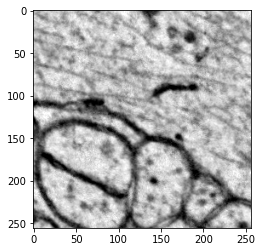

In [4]:
#pick indices/window
window = 256
x_off = 100
y_off = 100
z_off = 10
plt.imshow(data['raw'][z_off, y_off:y_off+window, x_off:x_off+window], cmap='gray')

# Setup Noising Pipeline

### Test pipeline before saving:

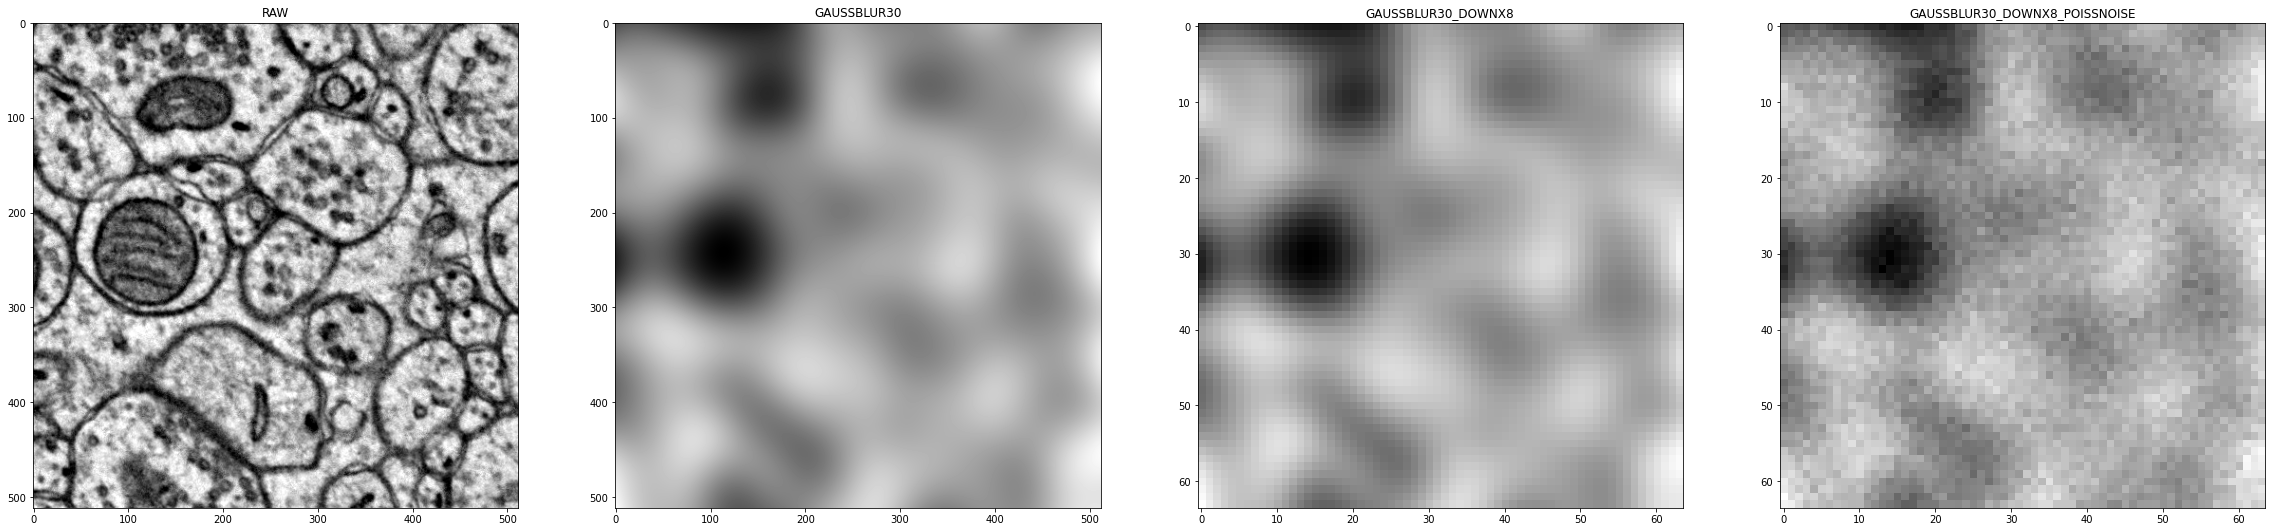

In [3]:
noise_batch([samples[0]],
    src_path,
    raw_name,
    noise_dict,
    noise_order,
    src_voxel_size=(40, 4, 4),
    check_every=250,
    scan_size=(40, 512, 512)
    )

In [4]:
sample = samples[0]
test_batch, arrays, noise_name = test_noise(sample,
                    src_path,
                    raw_name,
                    noise_dict,
                    noise_order,
                    src_voxel_size=(40, 4, 4),
                    test_size=(40, 2048, 2048)
                    )

ROI: [0:40, 0:2048, 0:2048] (40, 2048, 2048), voxel size: (40, 32, 32), interpolatable: True, non-spatial: False, dtype: <class 'numpy.float32'>, placeholder: False

### Run actual

In [3]:
#in case you want to check in on the batch outputs:
raw = arrays[0]
noisy = arrays[-1]
test_batch[noisy]

Starting gaussBlur30_downX8_poissNoise of /n/groups/htem/ESRF_id16a/tomo_ML/synapse/cb2/volumes/ml0/ml0.zarr/volumes...


  0%|          | 0/81000 [00:00<?, ?it/s]

  0%|          | 77/81000 [00:00<01:45, 767.38it/s]

  0%|          | 154/81000 [00:01<16:25, 82.01it/s]

  0%|          | 197/81000 [00:01<12:18, 109.37it/s]

  0%|          | 234/81000 [00:02<16:32, 81.37it/s] 

  0%|          | 258/81000 [00:03<21:19, 63.10it/s]

  0%|          | 295/81000 [00:03<23:06, 58.23it/s]

  0%|          | 308/81000 [00:04<21:35, 62.31it/s]

  0%|          | 343/81000 [00:04<23:34, 57.04it/s]

  0%|          | 362/81000 [00:04<20:06, 66.83it/s]

  0%|          | 391/81000 [00:05<23:06, 58.15it/s]

  0%|          | 402/81000 [00:05<21:37, 62.12it/s]

  1%|          | 439/81000 [00:05<18:06, 74.16it/s]

  1%|          | 450/81000 [00:06<22:21, 60.06it/s]

  1%|          | 467/81000 [00:06<19:10, 70.00it/s]

  1%|          | 486/81000 [00:07<25:50, 51.92it/s]

  1%|          | 534/81000 [00:07<24:22, 55.02it/s]

  1%|          | 576/81000 [00:08<16:10, 82.91it/s]

  1%|          | 594/81000 [00:08<24:07, 55.56it/s]

  1%|          | 634/81000 [00:09<25:02, 53.49it/s]

  1%|          | 682/81000 [00:10<23:13, 57.63it/s]

  1%|          | 697/81000 [00:10<21:07, 63.38it/s]

  1%|          | 730/81000 [00:11<23:00, 58.14it/s]

  1%|          | 748/81000 [00:11<19:54, 67.20it/s]

  1%|          | 778/81000 [00:11<19:37, 68.12it/s]

  1%|          | 789/81000 [00:11<22:10, 60.29it/s]

  1%|          | 827/81000 [00:12<14:27, 92.45it/s]

  1%|          | 844/81000 [00:12<23:36, 56.58it/s]

  1%|          | 875/81000 [00:13<20:28, 65.23it/s]

  1%|          | 887/81000 [00:13<24:36, 54.27it/s]

  1%|          | 899/81000 [00:13<22:07, 60.35it/s]

  1%|          | 923/81000 [00:13<16:25, 81.22it/s]

  1%|          | 937/81000 [00:14<27:50, 47.94it/s]

  1%|          | 969/81000 [00:14<17:57, 74.27it/s]

  1%|          | 985/81000 [00:15<28:55, 46.12it/s]

  1%|          | 997/81000 [00:15<29:12, 45.64it/s]

  1%|          | 1007/81000 [00:16<35:39, 37.39it/s]

  1%|▏         | 1018/81000 [00:16<30:28, 43.75it/s]

  1%|▏         | 1031/81000 [00:16<45:12, 29.48it/s]

  1%|▏         | 1050/81000 [00:17<37:38, 35.40it/s]

  1%|▏         | 1056/81000 [00:17<42:54, 31.06it/s]

  1%|▏         | 1077/81000 [00:17<28:16, 47.12it/s]

  1%|▏         | 1086/81000 [00:18<45:48, 29.08it/s]

  1%|▏         | 1103/81000 [00:19<54:28, 24.44it/s]

  1%|▏         | 1127/81000 [00:19<37:51, 35.16it/s]

  1%|▏         | 1139/81000 [00:20<38:42, 34.38it/s]

  1%|▏         | 1151/81000 [00:21<55:41, 23.89it/s]

  1%|▏         | 1187/81000 [00:21<40:40, 32.71it/s]

  1%|▏         | 1198/81000 [00:22<40:45, 32.64it/s]

  1%|▏         | 1203/81000 [00:22<46:11, 28.80it/s]

  2%|▏         | 1217/81000 [00:22<36:16, 36.65it/s]

  2%|▏         | 1235/81000 [00:23<43:42, 30.41it/s]

  2%|▏         | 1279/81000 [00:23<27:14, 48.76it/s]

  2%|▏         | 1285/81000 [00:24<31:39, 41.96it/s]

  2%|▏         | 1330/81000 [00:25<28:04, 47.29it/s]

  2%|▏         | 1378/81000 [00:25<17:32, 75.63it/s]

  2%|▏         | 1392/81000 [00:25<25:44, 51.54it/s]

  2%|▏         | 1431/81000 [00:26<24:45, 53.57it/s]

  2%|▏         | 1442/81000 [00:26<23:08, 57.28it/s]

  2%|▏         | 1481/81000 [00:27<23:42, 55.92it/s]

  2%|▏         | 1509/81000 [00:27<18:09, 72.96it/s]

  2%|▏         | 1529/81000 [00:28<24:33, 53.95it/s]

  2%|▏         | 1545/81000 [00:28<21:19, 62.12it/s]

  2%|▏         | 1577/81000 [00:28<23:03, 57.40it/s]

  2%|▏         | 1591/81000 [00:29<20:37, 64.15it/s]

  2%|▏         | 1625/81000 [00:29<22:39, 58.39it/s]

  2%|▏         | 1638/81000 [00:29<20:29, 64.54it/s]

  2%|▏         | 1673/81000 [00:30<23:00, 57.44it/s]

  2%|▏         | 1702/81000 [00:30<17:01, 77.61it/s]

  2%|▏         | 1721/81000 [00:31<24:43, 53.46it/s]

  2%|▏         | 1769/81000 [00:32<23:20, 56.57it/s]

  2%|▏         | 1817/81000 [00:32<21:41, 60.83it/s]

  2%|▏         | 1831/81000 [00:32<19:59, 66.00it/s]

  2%|▏         | 1865/81000 [00:33<22:18, 59.12it/s]

  2%|▏         | 1883/81000 [00:33<19:19, 68.23it/s]

  2%|▏         | 1913/81000 [00:34<23:18, 56.56it/s]

  2%|▏         | 1961/81000 [00:35<22:39, 58.13it/s]

  2%|▏         | 2001/81000 [00:35<22:51, 57.62it/s]

  2%|▏         | 2009/81000 [00:36<29:58, 43.91it/s]

  2%|▏         | 2015/81000 [00:36<31:01, 42.43it/s]

  3%|▎         | 2048/81000 [00:37<26:41, 49.30it/s]

  3%|▎         | 2054/81000 [00:38<40:02, 32.87it/s]

  3%|▎         | 2058/81000 [00:38<39:30, 33.30it/s]

  3%|▎         | 2090/81000 [00:38<24:17, 54.16it/s]

  3%|▎         | 2098/81000 [00:39<51:25, 25.57it/s]

  3%|▎         | 2136/81000 [00:39<27:51, 47.18it/s]

  3%|▎         | 2149/81000 [00:40<40:35, 32.37it/s]

  3%|▎         | 2159/81000 [00:41<50:23, 26.08it/s]

  3%|▎         | 2187/81000 [00:42<43:42, 30.05it/s]

  3%|▎         | 2197/81000 [00:42<38:28, 34.14it/s]

  3%|▎         | 2205/81000 [00:42<37:57, 34.59it/s]

  3%|▎         | 2212/81000 [00:43<50:49, 25.84it/s]

  3%|▎         | 2221/81000 [00:43<42:18, 31.04it/s]

  3%|▎         | 2240/81000 [00:43<43:54, 29.90it/s]

  3%|▎         | 2264/81000 [00:43<27:21, 47.98it/s]

  3%|▎         | 2288/81000 [00:44<31:22, 41.81it/s]

  3%|▎         | 2303/81000 [00:44<26:36, 49.28it/s]

  3%|▎         | 2336/81000 [00:45<25:32, 51.34it/s]

  3%|▎         | 2346/81000 [00:45<23:48, 55.06it/s]

  3%|▎         | 2377/81000 [00:45<18:03, 72.59it/s]

  3%|▎         | 2387/81000 [00:46<24:32, 53.40it/s]

  3%|▎         | 2397/81000 [00:46<23:58, 54.65it/s]

  3%|▎         | 2424/81000 [00:46<16:25, 79.75it/s]

  3%|▎         | 2436/81000 [00:46<23:53, 54.79it/s]

  3%|▎         | 2445/81000 [00:47<26:06, 50.14it/s]

  3%|▎         | 2481/81000 [00:47<15:05, 86.68it/s]

  3%|▎         | 2495/81000 [00:48<27:31, 47.54it/s]

  3%|▎         | 2525/81000 [00:48<18:38, 70.13it/s]

  3%|▎         | 2540/81000 [00:48<27:07, 48.20it/s]

  3%|▎         | 2551/81000 [00:48<24:24, 53.58it/s]

  3%|▎         | 2584/81000 [00:49<16:05, 81.21it/s]

  3%|▎         | 2598/81000 [00:49<19:07, 68.31it/s]

  3%|▎         | 2610/81000 [00:50<28:48, 45.36it/s]

  3%|▎         | 2647/81000 [00:50<19:00, 68.72it/s]

  3%|▎         | 2661/81000 [00:50<28:15, 46.21it/s]

  3%|▎         | 2684/81000 [00:51<21:41, 60.19it/s]

  3%|▎         | 2712/81000 [00:51<18:55, 68.93it/s]

  3%|▎         | 2723/81000 [00:51<25:06, 51.95it/s]

  3%|▎         | 2759/81000 [00:52<18:47, 69.37it/s]

  3%|▎         | 2769/81000 [00:52<24:07, 54.05it/s]

  3%|▎         | 2778/81000 [00:52<22:42, 57.41it/s]

  3%|▎         | 2806/81000 [00:52<16:18, 79.90it/s]

  3%|▎         | 2817/81000 [00:53<23:59, 54.32it/s]

  4%|▎         | 2853/81000 [00:53<15:10, 85.79it/s]

  4%|▎         | 2867/81000 [00:54<26:30, 49.11it/s]

  4%|▎         | 2909/81000 [00:54<20:45, 62.71it/s]

  4%|▎         | 2919/81000 [00:55<26:17, 49.51it/s]

  4%|▎         | 2961/81000 [00:55<23:10, 56.11it/s]

  4%|▎         | 2969/81000 [00:55<24:40, 52.69it/s]

  4%|▎         | 3001/81000 [00:56<22:20, 58.20it/s]

  4%|▎         | 3008/81000 [00:56<26:19, 49.39it/s]

  4%|▎         | 3014/81000 [00:57<42:53, 30.31it/s]

  4%|▍         | 3049/81000 [00:58<35:48, 36.29it/s]

  4%|▍         | 3058/81000 [00:59<48:49, 26.61it/s]

  4%|▍         | 3097/81000 [00:59<38:03, 34.12it/s]

  4%|▍         | 3107/81000 [01:00<34:46, 37.33it/s]

  4%|▍         | 3112/81000 [01:00<49:16, 26.35it/s]

  4%|▍         | 3132/81000 [01:00<33:58, 38.20it/s]

  4%|▍         | 3145/81000 [01:01<43:39, 29.72it/s]

  4%|▍         | 3157/81000 [01:01<35:40, 36.36it/s]

  4%|▍         | 3165/81000 [01:02<49:10, 26.38it/s]

  4%|▍         | 3171/81000 [01:02<49:17, 26.31it/s]

  4%|▍         | 3194/81000 [01:03<38:18, 33.85it/s]

  4%|▍         | 3204/81000 [01:03<38:33, 33.63it/s]

  4%|▍         | 3213/81000 [01:04<54:32, 23.77it/s]

  4%|▍         | 3233/81000 [01:04<34:20, 37.74it/s]

  4%|▍         | 3252/81000 [01:04<26:13, 49.40it/s]

  4%|▍         | 3262/81000 [01:04<34:09, 37.92it/s]

  4%|▍         | 3269/81000 [01:05<32:26, 39.93it/s]

  4%|▍         | 3300/81000 [01:05<18:42, 69.24it/s]

  4%|▍         | 3311/81000 [01:05<27:31, 47.05it/s]

  4%|▍         | 3320/81000 [01:05<25:49, 50.13it/s]

  4%|▍         | 3353/81000 [01:06<26:34, 48.69it/s]

  4%|▍         | 3365/81000 [01:06<23:45, 54.47it/s]

  4%|▍         | 3401/81000 [01:07<22:55, 56.42it/s]

  4%|▍         | 3410/81000 [01:07<21:48, 59.32it/s]

  4%|▍         | 3447/81000 [01:07<13:30, 95.68it/s]

  4%|▍         | 3463/81000 [01:07<19:28, 66.34it/s]

  4%|▍         | 3475/81000 [01:08<19:47, 65.31it/s]

  4%|▍         | 3486/81000 [01:08<27:22, 47.20it/s]

  4%|▍         | 3506/81000 [01:08<20:12, 63.90it/s]

  4%|▍         | 3530/81000 [01:09<27:13, 47.43it/s]

  4%|▍         | 3578/81000 [01:10<25:00, 51.61it/s]

  4%|▍         | 3626/81000 [01:10<16:59, 75.91it/s]

  4%|▍         | 3638/81000 [01:11<22:03, 58.44it/s]

  5%|▍         | 3648/81000 [01:11<20:53, 61.71it/s]

  5%|▍         | 3675/81000 [01:11<24:45, 52.05it/s]

  5%|▍         | 3686/81000 [01:11<22:43, 56.69it/s]

  5%|▍         | 3723/81000 [01:12<23:29, 54.82it/s]

  5%|▍         | 3763/81000 [01:12<15:14, 84.45it/s]

  5%|▍         | 3781/81000 [01:13<23:10, 55.54it/s]

  5%|▍         | 3819/81000 [01:13<18:54, 68.06it/s]

  5%|▍         | 3832/81000 [01:14<21:09, 60.79it/s]

  5%|▍         | 3863/81000 [01:14<15:44, 81.70it/s]

  5%|▍         | 3877/81000 [01:14<16:12, 79.27it/s]

  5%|▍         | 3889/81000 [01:15<26:59, 47.62it/s]

  5%|▍         | 3928/81000 [01:15<19:02, 67.46it/s]

  5%|▍         | 3938/81000 [01:16<24:35, 52.24it/s]

  5%|▍         | 3946/81000 [01:16<24:58, 51.44it/s]

  5%|▍         | 3975/81000 [01:16<17:41, 72.59it/s]

  5%|▍         | 3985/81000 [01:16<24:17, 52.83it/s]

  5%|▍         | 3993/81000 [01:16<24:32, 52.30it/s]

  5%|▍         | 4021/81000 [01:17<17:03, 75.24it/s]

  5%|▍         | 4033/81000 [01:17<22:06, 58.02it/s]

  5%|▍         | 4041/81000 [01:17<25:18, 50.70it/s]

  5%|▌         | 4066/81000 [01:17<17:08, 74.80it/s]

  5%|▌         | 4088/81000 [01:18<26:25, 48.52it/s]

  5%|▌         | 4136/81000 [01:19<22:35, 56.71it/s]

  5%|▌         | 4156/81000 [01:19<18:44, 68.31it/s]

  5%|▌         | 4183/81000 [01:19<14:25, 88.73it/s]

  5%|▌         | 4199/81000 [01:20<22:55, 55.83it/s]

  5%|▌         | 4233/81000 [01:20<15:54, 80.46it/s]

  5%|▌         | 4249/81000 [01:21<23:49, 53.69it/s]

  5%|▌         | 4282/81000 [01:21<18:55, 67.54it/s]

  5%|▌         | 4294/81000 [01:21<25:31, 50.08it/s]

  5%|▌         | 4335/81000 [01:22<22:53, 55.81it/s]

  5%|▌         | 4348/81000 [01:22<23:15, 54.94it/s]

  5%|▌         | 4382/81000 [01:22<16:14, 78.65it/s]

  5%|▌         | 4396/81000 [01:23<25:51, 49.38it/s]

  5%|▌         | 4444/81000 [01:24<23:22, 54.58it/s]

  6%|▌         | 4467/81000 [01:24<18:59, 67.15it/s]

  6%|▌         | 4493/81000 [01:25<22:02, 57.86it/s]

  6%|▌         | 4504/81000 [01:25<21:40, 58.80it/s]

  6%|▌         | 4541/81000 [01:25<22:22, 56.96it/s]

  6%|▌         | 4550/81000 [01:26<21:49, 58.37it/s]

  6%|▌         | 4591/81000 [01:26<21:58, 57.96it/s]

  6%|▌         | 4599/81000 [01:26<21:50, 58.29it/s]

  6%|▌         | 4640/81000 [01:27<13:28, 94.39it/s]

  6%|▌         | 4657/81000 [01:27<21:38, 58.77it/s]

  6%|▌         | 4692/81000 [01:28<16:56, 75.08it/s]

  6%|▌         | 4705/81000 [01:28<22:02, 57.68it/s]

  6%|▌         | 4715/81000 [01:28<20:42, 61.39it/s]

  6%|▌         | 4740/81000 [01:28<17:28, 72.74it/s]

  6%|▌         | 4750/81000 [01:28<17:26, 72.85it/s]

  6%|▌         | 4760/81000 [01:29<18:55, 67.16it/s]

  6%|▌         | 4768/81000 [01:29<18:53, 67.28it/s]

  6%|▌         | 4776/81000 [01:29<23:46, 53.43it/s]

  6%|▌         | 4784/81000 [01:29<23:58, 52.99it/s]

  6%|▌         | 4790/81000 [01:29<26:50, 47.31it/s]

  6%|▌         | 4800/81000 [01:30<24:25, 51.99it/s]

  6%|▌         | 4822/81000 [01:30<18:25, 68.89it/s]

  6%|▌         | 4833/81000 [01:30<26:50, 47.30it/s]

  6%|▌         | 4847/81000 [01:30<23:44, 53.44it/s]

  6%|▌         | 4870/81000 [01:31<18:32, 68.44it/s]

  6%|▌         | 4883/81000 [01:31<22:42, 55.87it/s]

  6%|▌         | 4894/81000 [01:31<23:01, 55.09it/s]

  6%|▌         | 4917/81000 [01:31<18:11, 69.68it/s]

  6%|▌         | 4930/81000 [01:32<17:53, 70.87it/s]

  6%|▌         | 4938/81000 [01:32<19:49, 63.92it/s]

  6%|▌         | 4945/81000 [01:32<24:36, 51.52it/s]

  6%|▌         | 4967/81000 [01:32<18:30, 68.49it/s]

  6%|▌         | 4979/81000 [01:32<22:32, 56.19it/s]

  6%|▌         | 4991/81000 [01:33<21:44, 58.27it/s]

  6%|▌         | 5014/81000 [01:33<18:45, 67.50it/s]

  6%|▌         | 5026/81000 [01:33<20:08, 62.87it/s]

  6%|▌         | 5038/81000 [01:33<22:54, 55.28it/s]

  6%|▌         | 5054/81000 [01:34<22:03, 57.38it/s]

  6%|▋         | 5071/81000 [01:34<21:52, 57.85it/s]

  6%|▋         | 5087/81000 [01:34<21:02, 60.13it/s]

  6%|▋         | 5101/81000 [01:35<21:54, 57.74it/s]

  6%|▋         | 5119/81000 [01:35<19:47, 63.91it/s]

  6%|▋         | 5135/81000 [01:35<20:04, 63.00it/s]

  6%|▋         | 5149/81000 [01:35<22:29, 56.20it/s]

  6%|▋         | 5167/81000 [01:36<19:44, 64.04it/s]

  6%|▋         | 5183/81000 [01:36<19:29, 64.82it/s]

  6%|▋         | 5196/81000 [01:36<23:18, 54.21it/s]

  6%|▋         | 5214/81000 [01:36<20:26, 61.78it/s]

  6%|▋         | 5232/81000 [01:37<20:27, 61.73it/s]

  6%|▋         | 5243/81000 [01:37<23:06, 54.65it/s]

  6%|▋         | 5262/81000 [01:37<19:23, 65.07it/s]

  7%|▋         | 5279/81000 [01:37<19:48, 63.70it/s]

  7%|▋         | 5290/81000 [01:38<21:46, 57.93it/s]

  7%|▋         | 5309/81000 [01:38<19:25, 64.94it/s]

  7%|▋         | 5326/81000 [01:38<20:33, 61.34it/s]

  7%|▋         | 5338/81000 [01:38<22:01, 57.24it/s]

  7%|▋         | 5357/81000 [01:39<19:23, 65.01it/s]

  7%|▋         | 5374/81000 [01:39<20:04, 62.81it/s]

  7%|▋         | 5385/81000 [01:39<22:46, 55.34it/s]

  7%|▋         | 5404/81000 [01:39<19:19, 65.21it/s]

  7%|▋         | 5421/81000 [01:40<19:55, 63.23it/s]

  7%|▋         | 5432/81000 [01:40<22:09, 56.84it/s]

  7%|▋         | 5452/81000 [01:40<19:00, 66.23it/s]

  7%|▋         | 5469/81000 [01:40<20:04, 62.70it/s]

  7%|▋         | 5480/81000 [01:41<22:07, 56.90it/s]

  7%|▋         | 5499/81000 [01:41<19:51, 63.35it/s]

  7%|▋         | 5506/81000 [01:42<39:41, 31.70it/s]

  7%|▋         | 5516/81000 [01:42<34:12, 36.78it/s]

  7%|▋         | 5527/81000 [01:42<30:46, 40.87it/s]

  7%|▋         | 5533/81000 [01:42<38:34, 32.60it/s]

  7%|▋         | 5538/81000 [01:43<42:24, 29.66it/s]

  7%|▋         | 5551/81000 [01:43<38:51, 32.36it/s]

  7%|▋         | 5555/81000 [01:44<53:30, 23.50it/s]

  7%|▋         | 5583/81000 [01:44<43:21, 28.99it/s]

  7%|▋         | 5600/81000 [01:45<46:19, 27.13it/s]

  7%|▋         | 5616/81000 [01:45<34:28, 36.45it/s]

  7%|▋         | 5631/81000 [01:46<41:20, 30.39it/s]

  7%|▋         | 5648/81000 [01:47<46:41, 26.90it/s]

  7%|▋         | 5653/81000 [01:47<44:52, 27.99it/s]

  7%|▋         | 5678/81000 [01:47<27:23, 45.84it/s]

  7%|▋         | 5687/81000 [01:48<39:21, 31.89it/s]

  7%|▋         | 5697/81000 [01:48<43:34, 28.80it/s]

  7%|▋         | 5703/81000 [01:48<49:17, 25.46it/s]

  7%|▋         | 5729/81000 [01:48<26:44, 46.91it/s]

  7%|▋         | 5740/81000 [01:49<36:47, 34.09it/s]

  7%|▋         | 5755/81000 [01:49<29:42, 42.21it/s]

  7%|▋         | 5764/81000 [01:50<33:52, 37.02it/s]

  7%|▋         | 5802/81000 [01:50<18:54, 66.29it/s]

  7%|▋         | 5812/81000 [01:50<27:35, 45.41it/s]

  7%|▋         | 5820/81000 [01:50<25:38, 48.86it/s]

  7%|▋         | 5850/81000 [01:51<15:43, 79.66it/s]

  7%|▋         | 5864/81000 [01:51<27:03, 46.28it/s]

  7%|▋         | 5893/81000 [01:51<18:05, 69.22it/s]

  7%|▋         | 5907/81000 [01:52<25:27, 49.16it/s]

  7%|▋         | 5938/81000 [01:52<18:39, 67.06it/s]

  7%|▋         | 5950/81000 [01:53<23:27, 53.31it/s]

  7%|▋         | 5960/81000 [01:53<22:00, 56.81it/s]

  7%|▋         | 5986/81000 [01:53<15:18, 81.65it/s]

  7%|▋         | 6000/81000 [01:53<24:26, 51.14it/s]

  7%|▋         | 6010/81000 [01:54<22:24, 55.76it/s]

  7%|▋         | 6038/81000 [01:54<18:08, 68.85it/s]

  7%|▋         | 6048/81000 [01:54<24:24, 51.18it/s]

  8%|▊         | 6079/81000 [01:54<15:17, 81.64it/s]

  8%|▊         | 6094/81000 [01:55<26:27, 47.18it/s]

  8%|▊         | 6135/81000 [01:55<15:13, 81.93it/s]

  8%|▊         | 6155/81000 [01:56<21:19, 58.50it/s]

  8%|▊         | 6170/81000 [01:56<18:51, 66.15it/s]

  8%|▊         | 6185/81000 [01:56<24:00, 51.94it/s]

  8%|▊         | 6196/81000 [01:57<21:54, 56.89it/s]

  8%|▊         | 6221/81000 [01:57<26:59, 46.18it/s]

  8%|▊         | 6269/81000 [01:58<22:53, 54.42it/s]

  8%|▊         | 6278/81000 [01:58<22:03, 56.45it/s]

  8%|▊         | 6317/81000 [01:58<14:49, 83.92it/s]

  8%|▊         | 6330/81000 [01:59<18:34, 66.98it/s]

  8%|▊         | 6340/81000 [01:59<23:44, 52.41it/s]

  8%|▊         | 6357/81000 [01:59<19:59, 62.22it/s]

  8%|▊         | 6377/81000 [02:00<19:18, 64.41it/s]

  8%|▊         | 6389/81000 [02:00<22:18, 55.72it/s]

  8%|▊         | 6408/81000 [02:00<17:27, 71.20it/s]

  8%|▊         | 6425/81000 [02:00<19:27, 63.90it/s]

  8%|▊         | 6434/81000 [02:01<24:57, 49.79it/s]

  8%|▊         | 6451/81000 [02:01<19:27, 63.85it/s]

  8%|▊         | 6473/81000 [02:01<18:30, 67.09it/s]

  8%|▊         | 6482/81000 [02:01<24:34, 50.54it/s]

  8%|▊         | 6498/81000 [02:02<19:35, 63.41it/s]

  8%|▊         | 6507/81000 [02:02<36:57, 33.59it/s]

  8%|▊         | 6525/81000 [02:03<43:24, 28.59it/s]

  8%|▊         | 6550/81000 [02:04<42:06, 29.46it/s]

  8%|▊         | 6573/81000 [02:04<36:55, 33.60it/s]

  8%|▊         | 6578/81000 [02:05<41:17, 30.04it/s]

  8%|▊         | 6598/81000 [02:05<28:43, 43.17it/s]

  8%|▊         | 6607/81000 [02:05<39:03, 31.74it/s]

  8%|▊         | 6614/81000 [02:06<36:01, 34.41it/s]

  8%|▊         | 6621/81000 [02:06<44:45, 27.69it/s]

  8%|▊         | 6626/81000 [02:06<46:47, 26.49it/s]

  8%|▊         | 6640/81000 [02:06<32:02, 38.68it/s]

  8%|▊         | 6647/81000 [02:07<52:21, 23.67it/s]

  8%|▊         | 6652/81000 [02:07<48:32, 25.53it/s]

  8%|▊         | 6669/81000 [02:08<48:19, 25.63it/s]

  8%|▊         | 6682/81000 [02:08<35:11, 35.20it/s]

  8%|▊         | 6695/81000 [02:09<44:16, 27.97it/s]

  8%|▊         | 6701/81000 [02:09<40:54, 30.27it/s]

  8%|▊         | 6717/81000 [02:09<47:15, 26.20it/s]

  8%|▊         | 6758/81000 [02:10<32:02, 38.61it/s]

  8%|▊         | 6769/81000 [02:10<28:27, 43.49it/s]

  8%|▊         | 6806/81000 [02:11<25:32, 48.40it/s]

  8%|▊         | 6818/81000 [02:11<23:01, 53.70it/s]

  8%|▊         | 6855/81000 [02:12<23:51, 51.81it/s]

  8%|▊         | 6872/81000 [02:12<20:14, 61.05it/s]

  9%|▊         | 6903/81000 [02:12<19:00, 64.95it/s]

  9%|▊         | 6912/81000 [02:13<21:45, 56.74it/s]

  9%|▊         | 6946/81000 [02:13<14:11, 86.97it/s]

  9%|▊         | 6962/81000 [02:13<22:54, 53.85it/s]

  9%|▊         | 6993/81000 [02:14<15:46, 78.21it/s]

  9%|▊         | 7011/81000 [02:14<22:30, 54.77it/s]

  9%|▊         | 7024/81000 [02:14<21:03, 58.53it/s]

  9%|▊         | 7052/81000 [02:15<25:24, 48.50it/s]

  9%|▉         | 7100/81000 [02:16<23:01, 53.49it/s]

  9%|▉         | 7148/81000 [02:17<20:18, 60.62it/s]

  9%|▉         | 7156/81000 [02:17<20:02, 61.39it/s]

  9%|▉         | 7164/81000 [02:17<19:36, 62.77it/s]

  9%|▉         | 7196/81000 [02:17<21:05, 58.30it/s]

  9%|▉         | 7206/81000 [02:17<19:49, 62.03it/s]

  9%|▉         | 7247/81000 [02:18<20:28, 60.05it/s]

  9%|▉         | 7259/81000 [02:18<18:54, 64.99it/s]

  9%|▉         | 7295/81000 [02:19<20:30, 59.89it/s]

  9%|▉         | 7309/81000 [02:19<18:36, 66.00it/s]

  9%|▉         | 7343/81000 [02:20<21:49, 56.25it/s]

  9%|▉         | 7384/81000 [02:20<14:13, 86.25it/s]

  9%|▉         | 7402/81000 [02:21<21:41, 56.54it/s]

  9%|▉         | 7439/81000 [02:21<22:29, 54.50it/s]

  9%|▉         | 7487/81000 [02:22<21:21, 57.38it/s]

  9%|▉         | 7501/81000 [02:22<20:14, 60.52it/s]

  9%|▉         | 7511/81000 [02:23<26:57, 45.44it/s]

  9%|▉         | 7518/81000 [02:23<26:50, 45.61it/s]

  9%|▉         | 7531/81000 [02:24<34:07, 35.89it/s]

  9%|▉         | 7537/81000 [02:24<35:14, 34.74it/s]

  9%|▉         | 7555/81000 [02:24<30:07, 40.63it/s]

  9%|▉         | 7560/81000 [02:25<38:08, 32.09it/s]

  9%|▉         | 7579/81000 [02:25<43:20, 28.23it/s]

  9%|▉         | 7600/81000 [02:25<28:52, 42.38it/s]

  9%|▉         | 7609/81000 [02:26<43:44, 27.97it/s]

  9%|▉         | 7626/81000 [02:27<35:23, 34.56it/s]

  9%|▉         | 7633/81000 [02:27<43:34, 28.07it/s]

  9%|▉         | 7653/81000 [02:28<43:39, 28.01it/s]

  9%|▉         | 7658/81000 [02:28<43:12, 28.29it/s]

  9%|▉         | 7676/81000 [02:29<44:47, 27.29it/s]

 10%|▉         | 7699/81000 [02:29<28:31, 42.83it/s]

 10%|▉         | 7708/81000 [02:30<43:36, 28.01it/s]

 10%|▉         | 7725/81000 [02:30<41:03, 29.75it/s]

 10%|▉         | 7731/81000 [02:30<42:46, 28.55it/s]

 10%|▉         | 7758/81000 [02:30<24:42, 49.40it/s]

 10%|▉         | 7770/81000 [02:31<22:19, 54.66it/s]

 10%|▉         | 7780/81000 [02:31<34:44, 35.13it/s]

 10%|▉         | 7822/81000 [02:31<18:23, 66.30it/s]

 10%|▉         | 7834/81000 [02:32<26:37, 45.81it/s]

 10%|▉         | 7871/81000 [02:33<25:10, 48.42it/s]

 10%|▉         | 7891/81000 [02:33<20:20, 59.90it/s]

 10%|▉         | 7919/81000 [02:33<17:32, 69.41it/s]

 10%|▉         | 7930/81000 [02:34<22:25, 54.30it/s]

 10%|▉         | 7939/81000 [02:34<21:14, 57.32it/s]

 10%|▉         | 7968/81000 [02:34<25:05, 48.53it/s]

 10%|▉         | 8016/81000 [02:35<22:02, 55.18it/s]

 10%|▉         | 8026/81000 [02:35<20:49, 58.40it/s]

 10%|▉         | 8064/81000 [02:36<21:10, 57.42it/s]

 10%|▉         | 8074/81000 [02:36<20:00, 60.75it/s]

 10%|█         | 8112/81000 [02:37<20:34, 59.06it/s]

 10%|█         | 8121/81000 [02:37<20:10, 60.20it/s]

 10%|█         | 8160/81000 [02:37<14:46, 82.18it/s]

 10%|█         | 8170/81000 [02:38<20:24, 59.49it/s]

 10%|█         | 8179/81000 [02:38<20:45, 58.47it/s]

 10%|█         | 8214/81000 [02:38<21:58, 55.20it/s]

 10%|█         | 8230/81000 [02:38<18:41, 64.89it/s]

 10%|█         | 8261/81000 [02:39<13:28, 89.94it/s]

 10%|█         | 8275/81000 [02:39<22:37, 53.58it/s]

 10%|█         | 8310/81000 [02:40<17:46, 68.15it/s]

 10%|█         | 8321/81000 [02:40<17:19, 69.93it/s]

 10%|█         | 8331/81000 [02:40<19:22, 62.52it/s]

 10%|█         | 8339/81000 [02:40<26:19, 46.01it/s]

 10%|█         | 8362/81000 [02:40<18:08, 66.74it/s]

 10%|█         | 8378/81000 [02:41<20:50, 58.07it/s]

 10%|█         | 8387/81000 [02:41<23:50, 50.78it/s]

 10%|█         | 8410/81000 [02:41<16:31, 73.21it/s]

 10%|█         | 8425/81000 [02:42<19:30, 61.99it/s]

 10%|█         | 8435/81000 [02:42<22:09, 54.59it/s]

 10%|█         | 8457/81000 [02:42<17:18, 69.83it/s]

 10%|█         | 8472/81000 [02:42<19:46, 61.13it/s]

 10%|█         | 8482/81000 [02:42<19:25, 62.23it/s]

 10%|█         | 8505/81000 [02:43<16:34, 72.91it/s]

 11%|█         | 8521/81000 [02:43<18:39, 64.75it/s]

 11%|█         | 8530/81000 [02:43<21:52, 55.21it/s]

 11%|█         | 8552/81000 [02:43<16:24, 73.55it/s]

 11%|█         | 8569/81000 [02:44<18:57, 63.69it/s]

 11%|█         | 8579/81000 [02:44<19:44, 61.12it/s]

 11%|█         | 8600/81000 [02:44<18:08, 66.52it/s]

 11%|█         | 8615/81000 [02:45<20:10, 59.81it/s]

 11%|█         | 8627/81000 [02:45<21:49, 55.25it/s]

 11%|█         | 8648/81000 [02:45<17:34, 68.60it/s]

 11%|█         | 8664/81000 [02:45<19:41, 61.21it/s]

 11%|█         | 8676/81000 [02:46<18:15, 65.99it/s]

 11%|█         | 8684/81000 [02:46<24:49, 48.56it/s]

 11%|█         | 8726/81000 [02:46<16:19, 73.79it/s]

 11%|█         | 8734/81000 [02:47<24:03, 50.05it/s]

 11%|█         | 8778/81000 [02:47<22:47, 52.81it/s]

 11%|█         | 8826/81000 [02:48<21:24, 56.17it/s]

 11%|█         | 8874/81000 [02:49<20:49, 57.73it/s]

 11%|█         | 8922/81000 [02:50<20:08, 59.63it/s]

 11%|█         | 8946/81000 [02:50<17:05, 70.25it/s]

 11%|█         | 8970/81000 [02:51<21:22, 56.16it/s]

 11%|█         | 9018/81000 [02:51<16:15, 73.81it/s]

 11%|█         | 9034/81000 [02:52<21:41, 55.28it/s]

 11%|█         | 9043/81000 [02:52<20:55, 57.29it/s]

 11%|█         | 9086/81000 [02:52<13:28, 88.97it/s]

 11%|█         | 9102/81000 [02:53<25:06, 47.73it/s]

 11%|█▏        | 9147/81000 [02:53<17:21, 69.01it/s]

 11%|█▏        | 9161/81000 [02:53<17:14, 69.46it/s]

 11%|█▏        | 9173/81000 [02:54<25:03, 47.78it/s]

 11%|█▏        | 9208/81000 [02:54<17:48, 67.16it/s]

 11%|█▏        | 9219/81000 [02:54<17:44, 67.45it/s]

 11%|█▏        | 9229/81000 [02:55<25:37, 46.68it/s]

 11%|█▏        | 9237/81000 [02:55<26:09, 45.73it/s]

 11%|█▏        | 9268/81000 [02:55<15:53, 75.23it/s]

 11%|█▏        | 9281/81000 [02:56<21:15, 56.25it/s]

 11%|█▏        | 9291/81000 [02:56<21:46, 54.90it/s]

 11%|█▏        | 9314/81000 [02:56<16:27, 72.58it/s]

 12%|█▏        | 9325/81000 [02:56<19:14, 62.11it/s]

 12%|█▏        | 9335/81000 [02:57<21:48, 54.76it/s]

 12%|█▏        | 9352/81000 [02:57<17:08, 69.66it/s]

 12%|█▏        | 9362/81000 [02:57<18:44, 63.69it/s]

 12%|█▏        | 9370/81000 [02:57<22:46, 52.43it/s]

 12%|█▏        | 9383/81000 [02:57<22:35, 52.82it/s]

 12%|█▏        | 9400/81000 [02:58<19:38, 60.76it/s]

 12%|█▏        | 9417/81000 [02:58<18:55, 63.02it/s]

 12%|█▏        | 9430/81000 [02:58<20:21, 58.60it/s]

 12%|█▏        | 9448/81000 [02:58<18:23, 64.83it/s]

 12%|█▏        | 9464/81000 [02:59<19:32, 60.99it/s]

 12%|█▏        | 9477/81000 [02:59<21:14, 56.13it/s]

 12%|█▏        | 9495/81000 [02:59<18:47, 63.39it/s]

 12%|█▏        | 9511/81000 [02:59<16:17, 73.10it/s]

 12%|█▏        | 9533/81000 [03:00<21:06, 56.45it/s]

 12%|█▏        | 9543/81000 [03:00<26:14, 45.38it/s]

 12%|█▏        | 9591/81000 [03:01<20:00, 59.48it/s]

 12%|█▏        | 9598/81000 [03:01<22:41, 52.44it/s]

 12%|█▏        | 9628/81000 [03:01<15:39, 75.93it/s]

 12%|█▏        | 9643/81000 [03:02<20:04, 59.26it/s]

 12%|█▏        | 9652/81000 [03:02<25:32, 46.55it/s]

 12%|█▏        | 9680/81000 [03:02<16:53, 70.35it/s]

 12%|█▏        | 9693/81000 [03:03<20:45, 57.23it/s]

 12%|█▏        | 9703/81000 [03:03<23:33, 50.45it/s]

 12%|█▏        | 9724/81000 [03:03<17:45, 66.88it/s]

 12%|█▏        | 9740/81000 [03:03<19:18, 61.50it/s]

 12%|█▏        | 9749/81000 [03:04<22:35, 52.55it/s]

 12%|█▏        | 9772/81000 [03:04<16:28, 72.07it/s]

 12%|█▏        | 9788/81000 [03:04<19:50, 59.82it/s]

 12%|█▏        | 9797/81000 [03:04<22:38, 52.43it/s]

 12%|█▏        | 9820/81000 [03:05<17:11, 69.02it/s]

 12%|█▏        | 9837/81000 [03:05<18:25, 64.35it/s]

 12%|█▏        | 9845/81000 [03:05<22:37, 52.41it/s]

 12%|█▏        | 9865/81000 [03:05<17:10, 69.02it/s]

 12%|█▏        | 9884/81000 [03:06<17:37, 67.22it/s]

 12%|█▏        | 9893/81000 [03:06<21:45, 54.47it/s]

 12%|█▏        | 9914/81000 [03:06<16:07, 73.50it/s]

 12%|█▏        | 9932/81000 [03:06<18:05, 65.47it/s]

 12%|█▏        | 9941/81000 [03:07<21:48, 54.29it/s]

 12%|█▏        | 9962/81000 [03:07<17:05, 69.28it/s]

 12%|█▏        | 9980/81000 [03:07<15:51, 74.64it/s]

 12%|█▏        | 9989/81000 [03:07<22:08, 53.45it/s]

 12%|█▏        | 10000/81000 [03:08<21:31, 54.99it/s]

 12%|█▏        | 10007/81000 [03:08<39:16, 30.13it/s]

 12%|█▏        | 10033/81000 [03:08<22:13, 53.21it/s]

 12%|█▏        | 10045/81000 [03:09<36:18, 32.57it/s]

 12%|█▏        | 10054/81000 [03:10<47:48, 24.73it/s]

 12%|█▏        | 10066/81000 [03:10<37:44, 31.33it/s]

 12%|█▏        | 10084/81000 [03:11<39:59, 29.55it/s]

 12%|█▏        | 10090/81000 [03:11<37:18, 31.68it/s]

 12%|█▏        | 10101/81000 [03:11<39:29, 29.92it/s]

 12%|█▏        | 10106/81000 [03:12<44:28, 26.56it/s]

 13%|█▎        | 10133/81000 [03:12<23:37, 49.99it/s]

 13%|█▎        | 10142/81000 [03:12<38:51, 30.39it/s]

 13%|█▎        | 10154/81000 [03:13<31:25, 37.57it/s]

 13%|█▎        | 10162/81000 [03:13<48:01, 24.59it/s]

 13%|█▎        | 10185/81000 [03:14<32:59, 35.77it/s]

 13%|█▎        | 10191/81000 [03:14<39:23, 29.96it/s]

 13%|█▎        | 10198/81000 [03:14<35:03, 33.65it/s]

 13%|█▎        | 10204/81000 [03:15<53:58, 21.86it/s]

 13%|█▎        | 10232/81000 [03:15<26:41, 44.20it/s]

 13%|█▎        | 10241/81000 [03:16<40:42, 28.97it/s]

 13%|█▎        | 10267/81000 [03:16<24:05, 48.93it/s]

 13%|█▎        | 10282/81000 [03:16<20:05, 58.64it/s]

 13%|█▎        | 10295/81000 [03:16<27:12, 43.31it/s]

 13%|█▎        | 10314/81000 [03:17<21:57, 53.64it/s]

 13%|█▎        | 10331/81000 [03:17<22:08, 53.21it/s]

 13%|█▎        | 10344/81000 [03:17<23:04, 51.05it/s]

 13%|█▎        | 10361/81000 [03:17<20:43, 56.81it/s]

 13%|█▎        | 10380/81000 [03:18<19:15, 61.11it/s]

 13%|█▎        | 10391/81000 [03:18<20:59, 56.08it/s]

 13%|█▎        | 10409/81000 [03:18<16:48, 70.03it/s]

 13%|█▎        | 10424/81000 [03:18<18:10, 64.70it/s]

 13%|█▎        | 10432/81000 [03:19<23:44, 49.53it/s]

 13%|█▎        | 10449/81000 [03:19<18:29, 63.56it/s]

 13%|█▎        | 10472/81000 [03:19<17:41, 66.44it/s]

 13%|█▎        | 10480/81000 [03:19<22:15, 52.79it/s]

 13%|█▎        | 10498/81000 [03:20<18:54, 62.15it/s]

 13%|█▎        | 10518/81000 [03:20<15:03, 78.00it/s]

 13%|█▎        | 10533/81000 [03:21<26:52, 43.71it/s]

 13%|█▎        | 10581/81000 [03:21<16:00, 73.32it/s]

 13%|█▎        | 10598/81000 [03:21<20:32, 57.13it/s]

 13%|█▎        | 10606/81000 [03:22<24:43, 47.47it/s]

 13%|█▎        | 10648/81000 [03:22<16:18, 71.89it/s]

 13%|█▎        | 10657/81000 [03:22<21:23, 54.79it/s]

 13%|█▎        | 10664/81000 [03:23<22:32, 52.01it/s]

 13%|█▎        | 10694/81000 [03:23<14:58, 78.24it/s]

 13%|█▎        | 10705/81000 [03:23<17:15, 67.90it/s]

 13%|█▎        | 10714/81000 [03:23<20:52, 56.10it/s]

 13%|█▎        | 10725/81000 [03:23<19:59, 58.60it/s]

 13%|█▎        | 10746/81000 [03:24<18:21, 63.80it/s]

 13%|█▎        | 10757/81000 [03:24<20:10, 58.05it/s]

 13%|█▎        | 10764/81000 [03:24<19:35, 59.77it/s]

 13%|█▎        | 10773/81000 [03:24<20:48, 56.26it/s]

 13%|█▎        | 10795/81000 [03:25<17:28, 66.96it/s]

 13%|█▎        | 10807/81000 [03:25<27:37, 42.35it/s]

 13%|█▎        | 10855/81000 [03:26<22:56, 50.97it/s]

 13%|█▎        | 10903/81000 [03:27<21:03, 55.49it/s]

 13%|█▎        | 10932/81000 [03:27<16:13, 71.94it/s]

 14%|█▎        | 10952/81000 [03:27<18:14, 64.02it/s]

 14%|█▎        | 10963/81000 [03:28<20:31, 56.88it/s]

 14%|█▎        | 10972/81000 [03:28<19:37, 59.46it/s]

 14%|█▎        | 11001/81000 [03:29<31:32, 36.99it/s]

 14%|█▎        | 11033/81000 [03:29<23:53, 48.81it/s]

 14%|█▎        | 11041/81000 [03:30<29:57, 38.91it/s]

 14%|█▎        | 11049/81000 [03:30<28:52, 40.38it/s]

 14%|█▎        | 11055/81000 [03:30<41:58, 27.78it/s]

 14%|█▎        | 11062/81000 [03:31<37:25, 31.15it/s]

 14%|█▎        | 11084/81000 [03:31<35:47, 32.56it/s]

 14%|█▎        | 11089/81000 [03:31<37:14, 31.28it/s]

 14%|█▎        | 11097/81000 [03:32<45:04, 25.85it/s]

 14%|█▎        | 11108/81000 [03:32<39:04, 29.81it/s]

 14%|█▎        | 11131/81000 [03:32<24:26, 47.63it/s]

 14%|█▍        | 11138/81000 [03:33<41:04, 28.35it/s]

 14%|█▍        | 11144/81000 [03:33<39:07, 29.75it/s]

 14%|█▍        | 11154/81000 [03:33<33:47, 34.46it/s]

 14%|█▍        | 11159/81000 [03:34<41:56, 27.75it/s]

 14%|█▍        | 11163/81000 [03:34<44:41, 26.05it/s]

 14%|█▍        | 11170/81000 [03:34<36:42, 31.70it/s]

 14%|█▍        | 11183/81000 [03:35<39:13, 29.67it/s]

 14%|█▍        | 11187/81000 [03:35<46:12, 25.18it/s]

 14%|█▍        | 11207/81000 [03:35<42:52, 27.13it/s]

 14%|█▍        | 11220/81000 [03:36<31:47, 36.58it/s]

 14%|█▍        | 11235/81000 [03:36<39:13, 29.64it/s]

 14%|█▍        | 11251/81000 [03:36<28:13, 41.19it/s]

 14%|█▍        | 11283/81000 [03:37<25:52, 44.89it/s]

 14%|█▍        | 11296/81000 [03:37<22:04, 52.61it/s]

 14%|█▍        | 11330/81000 [03:37<14:23, 80.70it/s]

 14%|█▍        | 11343/81000 [03:38<21:46, 53.30it/s]

 14%|█▍        | 11373/81000 [03:38<15:59, 72.57it/s]

 14%|█▍        | 11390/81000 [03:39<23:26, 49.50it/s]

 14%|█▍        | 11437/81000 [03:39<15:36, 74.25it/s]

 14%|█▍        | 11448/81000 [03:39<20:02, 57.86it/s]

 14%|█▍        | 11485/81000 [03:40<13:13, 87.57it/s]

 14%|█▍        | 11502/81000 [03:40<21:51, 52.98it/s]

 14%|█▍        | 11534/81000 [03:41<23:37, 48.99it/s]

 14%|█▍        | 11582/81000 [03:41<16:58, 68.16it/s]

 14%|█▍        | 11599/81000 [03:42<15:12, 76.04it/s]

 14%|█▍        | 11612/81000 [03:42<22:50, 50.62it/s]

 14%|█▍        | 11642/81000 [03:42<16:10, 71.46it/s]

 14%|█▍        | 11658/81000 [03:43<15:26, 74.85it/s]

 14%|█▍        | 11672/81000 [03:43<24:46, 46.64it/s]

 14%|█▍        | 11707/81000 [03:43<16:20, 70.70it/s]

 14%|█▍        | 11721/81000 [03:44<24:15, 47.59it/s]

 14%|█▍        | 11732/81000 [03:44<22:50, 50.55it/s]

 15%|█▍        | 11767/81000 [03:44<14:11, 81.29it/s]

 15%|█▍        | 11783/81000 [03:45<22:18, 51.71it/s]

 15%|█▍        | 11818/81000 [03:45<15:16, 75.45it/s]

 15%|█▍        | 11833/81000 [03:46<21:41, 53.12it/s]

 15%|█▍        | 11867/81000 [03:46<16:18, 70.66it/s]

 15%|█▍        | 11879/81000 [03:47<22:06, 52.09it/s]

 15%|█▍        | 11916/81000 [03:47<22:57, 50.16it/s]

 15%|█▍        | 11928/81000 [03:48<21:30, 53.50it/s]

 15%|█▍        | 11964/81000 [03:48<19:18, 59.58it/s]

 15%|█▍        | 11975/81000 [03:48<19:33, 58.80it/s]

 15%|█▍        | 12000/81000 [03:48<15:54, 72.32it/s]

 15%|█▍        | 12009/81000 [03:49<29:00, 39.63it/s]

 15%|█▍        | 12016/81000 [03:49<29:33, 38.90it/s]

 15%|█▍        | 12025/81000 [03:50<26:41, 43.07it/s]

 15%|█▍        | 12033/81000 [03:50<25:42, 44.70it/s]

 15%|█▍        | 12039/81000 [03:50<39:17, 29.26it/s]

 15%|█▍        | 12048/81000 [03:51<36:24, 31.56it/s]

 15%|█▍        | 12053/81000 [03:51<37:46, 30.42it/s]

 15%|█▍        | 12058/81000 [03:51<46:26, 24.74it/s]

 15%|█▍        | 12070/81000 [03:51<36:54, 31.13it/s]

 15%|█▍        | 12083/81000 [03:51<26:49, 42.82it/s]

 15%|█▍        | 12089/81000 [03:52<52:27, 21.90it/s]

 15%|█▍        | 12107/81000 [03:52<33:31, 34.25it/s]

 15%|█▍        | 12113/81000 [03:53<45:36, 25.17it/s]

 15%|█▍        | 12125/81000 [03:53<34:33, 33.22it/s]

 15%|█▍        | 12135/81000 [03:53<35:15, 32.55it/s]

 15%|█▍        | 12140/81000 [03:54<44:37, 25.72it/s]

 15%|█▌        | 12155/81000 [03:54<47:42, 24.05it/s]

 15%|█▌        | 12163/81000 [03:55<40:06, 28.60it/s]

 15%|█▌        | 12183/81000 [03:55<41:29, 27.64it/s]

 15%|█▌        | 12203/81000 [03:56<30:45, 37.28it/s]

 15%|█▌        | 12209/81000 [03:56<43:37, 26.28it/s]

 15%|█▌        | 12233/81000 [03:57<39:34, 28.96it/s]

 15%|█▌        | 12281/81000 [03:57<18:32, 61.75it/s]

 15%|█▌        | 12298/81000 [03:58<25:03, 45.70it/s]

 15%|█▌        | 12330/81000 [03:58<18:57, 60.39it/s]

 15%|█▌        | 12343/81000 [03:59<24:47, 46.17it/s]

 15%|█▌        | 12376/81000 [03:59<16:54, 67.65it/s]

 15%|█▌        | 12390/81000 [03:59<26:05, 43.82it/s]

 15%|█▌        | 12437/81000 [04:00<21:51, 52.27it/s]

 15%|█▌        | 12456/81000 [04:00<18:25, 62.01it/s]

 15%|█▌        | 12485/81000 [04:01<21:22, 53.42it/s]

 15%|█▌        | 12502/81000 [04:01<18:16, 62.46it/s]

 15%|█▌        | 12533/81000 [04:02<21:20, 53.46it/s]

 16%|█▌        | 12581/81000 [04:03<20:14, 56.35it/s]

 16%|█▌        | 12623/81000 [04:03<14:07, 80.65it/s]

 16%|█▌        | 12641/81000 [04:04<20:40, 55.11it/s]

 16%|█▌        | 12682/81000 [04:04<21:04, 54.03it/s]

 16%|█▌        | 12730/81000 [04:05<16:39, 68.29it/s]

 16%|█▌        | 12749/81000 [04:05<17:26, 65.23it/s]

 16%|█▌        | 12759/81000 [04:05<19:32, 58.20it/s]

 16%|█▌        | 12797/81000 [04:06<15:22, 73.89it/s]

 16%|█▌        | 12814/81000 [04:06<18:27, 61.56it/s]

 16%|█▌        | 12822/81000 [04:06<21:13, 53.53it/s]

 16%|█▌        | 12848/81000 [04:07<15:15, 74.45it/s]

 16%|█▌        | 12865/81000 [04:07<14:47, 76.75it/s]

 16%|█▌        | 12879/81000 [04:07<22:59, 49.39it/s]

 16%|█▌        | 12888/81000 [04:07<21:35, 52.58it/s]

 16%|█▌        | 12927/81000 [04:08<14:47, 76.73it/s]

 16%|█▌        | 12937/81000 [04:08<20:21, 55.72it/s]

 16%|█▌        | 12945/81000 [04:08<19:49, 57.23it/s]

 16%|█▌        | 12979/81000 [04:09<19:20, 58.62it/s]

 16%|█▌        | 12986/81000 [04:09<19:48, 57.24it/s]

 16%|█▌        | 13021/81000 [04:09<13:12, 85.75it/s]

 16%|█▌        | 13032/81000 [04:10<22:04, 51.32it/s]

 16%|█▌        | 13075/81000 [04:10<13:10, 85.92it/s]

 16%|█▌        | 13089/81000 [04:11<21:03, 53.77it/s]

 16%|█▌        | 13100/81000 [04:11<19:32, 57.91it/s]

 16%|█▌        | 13126/81000 [04:11<15:16, 74.10it/s]

 16%|█▌        | 13138/81000 [04:12<21:53, 51.66it/s]

 16%|█▌        | 13147/81000 [04:12<20:25, 55.37it/s]

 16%|█▋        | 13175/81000 [04:12<23:56, 47.23it/s]

 16%|█▋        | 13183/81000 [04:12<22:49, 49.52it/s]

 16%|█▋        | 13223/81000 [04:13<13:33, 83.34it/s]

 16%|█▋        | 13235/81000 [04:13<23:31, 48.00it/s]

 16%|█▋        | 13272/81000 [04:14<19:37, 57.54it/s]

 16%|█▋        | 13281/81000 [04:14<21:01, 53.68it/s]

 16%|█▋        | 13306/81000 [04:14<15:24, 73.24it/s]

 16%|█▋        | 13321/81000 [04:15<22:45, 49.58it/s]

 16%|█▋        | 13340/81000 [04:15<17:51, 63.14it/s]

 17%|█▋        | 13369/81000 [04:16<20:43, 54.37it/s]

 17%|█▋        | 13407/81000 [04:16<13:14, 85.10it/s]

 17%|█▋        | 13426/81000 [04:16<19:47, 56.92it/s]

 17%|█▋        | 13465/81000 [04:17<17:35, 64.00it/s]

 17%|█▋        | 13477/81000 [04:17<19:35, 57.45it/s]

 17%|█▋        | 13514/81000 [04:17<12:58, 86.66it/s]

 17%|█▋        | 13532/81000 [04:18<20:00, 56.19it/s]

 17%|█▋        | 13564/81000 [04:19<21:48, 51.53it/s]

 17%|█▋        | 13612/81000 [04:19<19:40, 57.08it/s]

 17%|█▋        | 13624/81000 [04:20<18:29, 60.72it/s]

 17%|█▋        | 13660/81000 [04:20<15:16, 73.49it/s]

 17%|█▋        | 13671/81000 [04:20<19:25, 57.78it/s]

 17%|█▋        | 13691/81000 [04:20<15:57, 70.29it/s]

 17%|█▋        | 13708/81000 [04:21<15:26, 72.61it/s]

 17%|█▋        | 13719/81000 [04:21<18:14, 61.45it/s]

 17%|█▋        | 13728/81000 [04:21<19:44, 56.77it/s]

 17%|█▋        | 13746/81000 [04:21<18:17, 61.27it/s]

 17%|█▋        | 13762/81000 [04:22<18:39, 60.06it/s]

 17%|█▋        | 13776/81000 [04:22<19:22, 57.82it/s]

 17%|█▋        | 13794/81000 [04:22<17:21, 64.52it/s]

 17%|█▋        | 13809/81000 [04:22<17:52, 62.66it/s]

 17%|█▋        | 13824/81000 [04:23<17:44, 63.12it/s]

 17%|█▋        | 13842/81000 [04:23<17:47, 62.89it/s]

 17%|█▋        | 13855/81000 [04:23<17:56, 62.40it/s]

 17%|█▋        | 13871/81000 [04:23<18:13, 61.39it/s]

 17%|█▋        | 13887/81000 [04:24<17:57, 62.26it/s]

 17%|█▋        | 13902/81000 [04:24<18:09, 61.56it/s]

 17%|█▋        | 13919/81000 [04:24<17:24, 64.25it/s]

 17%|█▋        | 13935/81000 [04:24<18:16, 61.18it/s]

 17%|█▋        | 13950/81000 [04:25<18:25, 60.63it/s]

 17%|█▋        | 13967/81000 [04:25<18:31, 60.31it/s]

 17%|█▋        | 13983/81000 [04:25<18:05, 61.75it/s]

 17%|█▋        | 13999/81000 [04:25<17:22, 64.25it/s]

 17%|█▋        | 14014/81000 [04:26<17:34, 63.54it/s]

 17%|█▋        | 14030/81000 [04:26<17:20, 64.36it/s]

 17%|█▋        | 14048/81000 [04:26<17:05, 65.27it/s]

 17%|█▋        | 14061/81000 [04:26<18:26, 60.51it/s]

 17%|█▋        | 14079/81000 [04:27<17:11, 64.88it/s]

 17%|█▋        | 14096/81000 [04:27<17:35, 63.38it/s]

 17%|█▋        | 14108/81000 [04:27<19:30, 57.16it/s]

 17%|█▋        | 14126/81000 [04:27<17:22, 64.14it/s]

 17%|█▋        | 14144/81000 [04:28<17:28, 63.73it/s]

 17%|█▋        | 14155/81000 [04:28<19:03, 58.44it/s]

 17%|█▋        | 14173/81000 [04:28<15:46, 70.58it/s]

 18%|█▊        | 14187/81000 [04:29<19:35, 56.83it/s]

 18%|█▊        | 14199/81000 [04:29<17:04, 65.23it/s]

 18%|█▊        | 14220/81000 [04:29<12:36, 88.32it/s]

 18%|█▊        | 14232/81000 [04:29<22:50, 48.71it/s]

 18%|█▊        | 14241/81000 [04:30<22:15, 49.99it/s]

 18%|█▊        | 14271/81000 [04:30<20:37, 53.94it/s]

 18%|█▊        | 14279/81000 [04:30<21:17, 52.24it/s]

 18%|█▊        | 14310/81000 [04:30<14:01, 79.22it/s]

 18%|█▊        | 14321/81000 [04:31<20:14, 54.89it/s]

 18%|█▊        | 14329/81000 [04:31<19:45, 56.26it/s]

 18%|█▊        | 14359/81000 [04:31<14:15, 77.89it/s]

 18%|█▊        | 14369/81000 [04:32<23:18, 47.66it/s]

 18%|█▊        | 14381/81000 [04:32<20:04, 55.30it/s]

 18%|█▊        | 14412/81000 [04:33<22:42, 48.86it/s]

 18%|█▊        | 14430/81000 [04:33<18:05, 61.35it/s]

 18%|█▊        | 14460/81000 [04:33<21:39, 51.22it/s]

 18%|█▊        | 14501/81000 [04:34<20:47, 53.30it/s]

 18%|█▊        | 14509/81000 [04:35<31:24, 35.29it/s]

 18%|█▊        | 14549/81000 [04:36<26:49, 41.30it/s]

 18%|█▊        | 14556/81000 [04:36<35:59, 30.77it/s]

 18%|█▊        | 14590/81000 [04:37<22:42, 48.73it/s]

 18%|█▊        | 14603/81000 [04:37<31:02, 35.66it/s]

 18%|█▊        | 14613/81000 [04:38<39:50, 27.78it/s]

 18%|█▊        | 14646/81000 [04:39<33:04, 33.43it/s]

 18%|█▊        | 14653/81000 [04:39<32:17, 34.24it/s]

 18%|█▊        | 14659/81000 [04:40<46:03, 24.01it/s]

 18%|█▊        | 14694/81000 [04:40<25:46, 42.88it/s]

 18%|█▊        | 14703/81000 [04:41<35:08, 31.44it/s]

 18%|█▊        | 14710/81000 [04:41<45:43, 24.17it/s]

 18%|█▊        | 14716/81000 [04:41<41:35, 26.57it/s]

 18%|█▊        | 14746/81000 [04:42<24:24, 45.25it/s]

 18%|█▊        | 14757/81000 [04:42<29:02, 38.02it/s]

 18%|█▊        | 14765/81000 [04:42<28:12, 39.13it/s]

 18%|█▊        | 14783/81000 [04:42<20:01, 55.10it/s]

 18%|█▊        | 14794/81000 [04:43<19:02, 57.94it/s]

 18%|█▊        | 14805/81000 [04:43<23:59, 45.98it/s]

 18%|█▊        | 14814/81000 [04:43<23:39, 46.64it/s]

 18%|█▊        | 14842/81000 [04:43<14:59, 73.56it/s]

 18%|█▊        | 14853/81000 [04:44<16:15, 67.81it/s]

 18%|█▊        | 14862/81000 [04:44<17:10, 64.19it/s]

 18%|█▊        | 14870/81000 [04:44<19:43, 55.88it/s]

 18%|█▊        | 14887/81000 [04:44<15:55, 69.21it/s]

 18%|█▊        | 14901/81000 [04:44<19:11, 57.38it/s]

 18%|█▊        | 14911/81000 [04:45<22:02, 49.99it/s]

 18%|█▊        | 14932/81000 [04:45<16:08, 68.19it/s]

 18%|█▊        | 14948/81000 [04:45<17:36, 62.54it/s]

 18%|█▊        | 14958/81000 [04:45<20:31, 53.62it/s]

 18%|█▊        | 14979/81000 [04:46<15:47, 69.66it/s]

 19%|█▊        | 14995/81000 [04:46<17:19, 63.50it/s]

 19%|█▊        | 15005/81000 [04:46<18:52, 58.28it/s]

 19%|█▊        | 15026/81000 [04:46<15:56, 68.99it/s]

 19%|█▊        | 15043/81000 [04:47<14:45, 74.48it/s]

 19%|█▊        | 15053/81000 [04:47<19:46, 55.59it/s]

 19%|█▊        | 15064/81000 [04:47<19:49, 55.44it/s]

 19%|█▊        | 15088/81000 [04:47<15:08, 72.51it/s]

 19%|█▊        | 15100/81000 [04:48<18:43, 58.64it/s]

 19%|█▊        | 15109/81000 [04:48<21:16, 51.63it/s]

 19%|█▊        | 15134/81000 [04:48<15:27, 70.99it/s]

 19%|█▊        | 15147/81000 [04:48<17:52, 61.40it/s]

 19%|█▊        | 15158/81000 [04:49<19:46, 55.49it/s]

 19%|█▊        | 15175/81000 [04:49<16:20, 67.14it/s]

 19%|█▉        | 15193/81000 [04:49<17:16, 63.52it/s]

 19%|█▉        | 15205/81000 [04:49<19:04, 57.48it/s]

 19%|█▉        | 15223/81000 [04:50<17:04, 64.20it/s]

 19%|█▉        | 15240/81000 [04:50<17:32, 62.50it/s]

 19%|█▉        | 15252/81000 [04:50<19:40, 55.69it/s]

 19%|█▉        | 15271/81000 [04:50<16:44, 65.46it/s]

 19%|█▉        | 15287/81000 [04:51<18:02, 60.70it/s]

 19%|█▉        | 15300/81000 [04:51<18:46, 58.30it/s]

 19%|█▉        | 15318/81000 [04:51<17:41, 61.88it/s]

 19%|█▉        | 15334/81000 [04:51<17:44, 61.66it/s]

 19%|█▉        | 15349/81000 [04:52<17:46, 61.57it/s]

 19%|█▉        | 15366/81000 [04:52<14:45, 74.11it/s]

 19%|█▉        | 15375/81000 [04:52<14:47, 73.92it/s]

 19%|█▉        | 15384/81000 [04:52<18:55, 57.78it/s]

 19%|█▉        | 15396/81000 [04:52<19:57, 54.78it/s]

 19%|█▉        | 15414/81000 [04:53<17:44, 61.61it/s]

 19%|█▉        | 15430/81000 [04:53<17:35, 62.10it/s]

 19%|█▉        | 15445/81000 [04:53<18:42, 58.42it/s]

 19%|█▉        | 15463/81000 [04:53<17:06, 63.86it/s]

 19%|█▉        | 15478/81000 [04:54<17:32, 62.26it/s]

 19%|█▉        | 15492/81000 [04:54<17:36, 62.01it/s]

 19%|█▉        | 15501/81000 [04:55<28:36, 38.16it/s]

 19%|█▉        | 15506/81000 [04:55<32:37, 33.46it/s]

 19%|█▉        | 15512/81000 [04:55<35:04, 31.11it/s]

 19%|█▉        | 15526/81000 [04:55<28:28, 38.32it/s]

 19%|█▉        | 15544/81000 [04:56<33:33, 32.51it/s]

 19%|█▉        | 15552/81000 [04:56<41:34, 26.23it/s]

 19%|█▉        | 15558/81000 [04:57<38:55, 28.02it/s]

 19%|█▉        | 15592/81000 [04:58<34:08, 31.93it/s]

 19%|█▉        | 15606/81000 [04:58<29:27, 36.99it/s]

 19%|█▉        | 15611/81000 [04:58<33:13, 32.80it/s]

 19%|█▉        | 15623/81000 [04:59<37:15, 29.24it/s]

 19%|█▉        | 15640/81000 [04:59<39:41, 27.44it/s]

 19%|█▉        | 15668/81000 [04:59<23:05, 47.15it/s]

 19%|█▉        | 15679/81000 [05:00<32:50, 33.15it/s]

 19%|█▉        | 15688/81000 [05:01<43:36, 24.96it/s]

 19%|█▉        | 15700/81000 [05:01<34:22, 31.66it/s]

 19%|█▉        | 15719/81000 [05:02<36:13, 30.03it/s]

 19%|█▉        | 15752/81000 [05:02<23:51, 45.57it/s]

 19%|█▉        | 15760/81000 [05:02<30:44, 35.36it/s]

 20%|█▉        | 15801/81000 [05:03<18:47, 57.84it/s]

 20%|█▉        | 15810/81000 [05:03<23:39, 45.92it/s]

 20%|█▉        | 15826/81000 [05:03<19:17, 56.30it/s]

 20%|█▉        | 15849/81000 [05:04<18:39, 58.18it/s]

 20%|█▉        | 15858/81000 [05:04<21:36, 50.25it/s]

 20%|█▉        | 15878/81000 [05:04<16:16, 66.66it/s]

 20%|█▉        | 15889/81000 [05:04<19:58, 54.32it/s]

 20%|█▉        | 15904/81000 [05:05<16:20, 66.41it/s]

 20%|█▉        | 15925/81000 [05:05<13:27, 80.60it/s]

 20%|█▉        | 15936/81000 [05:05<20:51, 51.98it/s]

 20%|█▉        | 15945/81000 [05:05<19:18, 56.13it/s]

 20%|█▉        | 15972/81000 [05:06<14:33, 74.45it/s]

 20%|█▉        | 15982/81000 [05:06<21:10, 51.20it/s]

 20%|█▉        | 15990/81000 [05:06<20:57, 51.70it/s]

 20%|█▉        | 16019/81000 [05:06<13:32, 80.02it/s]

 20%|█▉        | 16030/81000 [05:07<19:45, 54.79it/s]

 20%|█▉        | 16038/81000 [05:07<19:22, 55.87it/s]

 20%|█▉        | 16067/81000 [05:07<13:27, 80.44it/s]

 20%|█▉        | 16077/81000 [05:07<19:35, 55.21it/s]

 20%|█▉        | 16085/81000 [05:08<20:37, 52.44it/s]

 20%|█▉        | 16113/81000 [05:08<14:15, 75.88it/s]

 20%|█▉        | 16123/81000 [05:08<21:47, 49.61it/s]

 20%|█▉        | 16166/81000 [05:08<11:32, 93.66it/s]

 20%|█▉        | 16182/81000 [05:09<19:42, 54.80it/s]

 20%|██        | 16218/81000 [05:10<18:02, 59.86it/s]

 20%|██        | 16229/81000 [05:10<19:55, 54.17it/s]

 20%|██        | 16248/81000 [05:10<16:32, 65.27it/s]

 20%|██        | 16265/81000 [05:10<15:27, 69.76it/s]

 20%|██        | 16275/81000 [05:10<15:40, 68.82it/s]

 20%|██        | 16284/81000 [05:11<23:14, 46.41it/s]

 20%|██        | 16291/81000 [05:11<22:33, 47.81it/s]

 20%|██        | 16320/81000 [05:11<14:59, 71.93it/s]

 20%|██        | 16329/81000 [05:12<17:59, 59.93it/s]

 20%|██        | 16337/81000 [05:12<23:02, 46.77it/s]

 20%|██        | 16352/81000 [05:12<19:21, 55.68it/s]

 20%|██        | 16373/81000 [05:12<17:34, 61.29it/s]

 20%|██        | 16383/81000 [05:13<21:03, 51.16it/s]

 20%|██        | 16399/81000 [05:13<18:15, 58.94it/s]

 20%|██        | 16420/81000 [05:13<16:02, 67.12it/s]

 20%|██        | 16431/81000 [05:13<19:03, 56.49it/s]

 20%|██        | 16448/81000 [05:14<17:38, 60.96it/s]

 20%|██        | 16469/81000 [05:14<15:25, 69.76it/s]

 20%|██        | 16478/81000 [05:14<19:39, 54.70it/s]

 20%|██        | 16494/81000 [05:14<17:46, 60.51it/s]

 20%|██        | 16501/81000 [05:15<21:55, 49.04it/s]

 20%|██        | 16507/81000 [05:15<34:23, 31.26it/s]

 20%|██        | 16527/81000 [05:15<24:45, 43.39it/s]

 20%|██        | 16533/81000 [05:16<37:33, 28.61it/s]

 20%|██        | 16551/81000 [05:17<39:27, 27.22it/s]

 20%|██        | 16555/81000 [05:17<39:21, 27.29it/s]

 20%|██        | 16576/81000 [05:18<37:38, 28.53it/s]

 20%|██        | 16588/81000 [05:18<29:54, 35.90it/s]

 20%|██        | 16599/81000 [05:18<41:07, 26.09it/s]

 21%|██        | 16624/81000 [05:19<25:30, 42.06it/s]

 21%|██        | 16632/81000 [05:19<35:24, 30.29it/s]

 21%|██        | 16647/81000 [05:20<34:54, 30.73it/s]

 21%|██        | 16652/81000 [05:20<38:41, 27.72it/s]

 21%|██        | 16673/81000 [05:21<39:16, 27.29it/s]

 21%|██        | 16680/81000 [05:21<41:17, 25.96it/s]

 21%|██        | 16695/81000 [05:21<29:52, 35.87it/s]

 21%|██        | 16702/81000 [05:22<33:31, 31.97it/s]

 21%|██        | 16718/81000 [05:22<23:56, 44.74it/s]

 21%|██        | 16726/81000 [05:22<40:47, 26.26it/s]

 21%|██        | 16766/81000 [05:23<27:47, 38.53it/s]

 21%|██        | 16797/81000 [05:23<18:02, 59.32it/s]

 21%|██        | 16814/81000 [05:24<23:06, 46.29it/s]

 21%|██        | 16849/81000 [05:24<14:49, 72.10it/s]

 21%|██        | 16867/81000 [05:25<20:39, 51.74it/s]

 21%|██        | 16885/81000 [05:25<17:03, 62.65it/s]

 21%|██        | 16910/81000 [05:25<21:03, 50.71it/s]

 21%|██        | 16926/81000 [05:26<17:47, 60.01it/s]

 21%|██        | 16958/81000 [05:26<18:31, 57.63it/s]

 21%|██        | 16969/81000 [05:26<17:47, 59.99it/s]

 21%|██        | 16979/81000 [05:26<17:45, 60.11it/s]

 21%|██        | 17018/81000 [05:27<19:50, 53.77it/s]

 21%|██        | 17066/81000 [05:28<18:12, 58.51it/s]

 21%|██        | 17074/81000 [05:28<18:13, 58.49it/s]

 21%|██        | 17114/81000 [05:28<13:01, 81.71it/s]

 21%|██        | 17125/81000 [05:29<19:47, 53.81it/s]

 21%|██        | 17167/81000 [05:29<14:39, 72.54it/s]

 21%|██        | 17177/81000 [05:30<18:16, 58.21it/s]

 21%|██        | 17193/81000 [05:30<15:39, 67.90it/s]

 21%|██▏       | 17219/81000 [05:31<21:23, 49.68it/s]

 21%|██▏       | 17267/81000 [05:31<19:12, 55.31it/s]

 21%|██▏       | 17301/81000 [05:31<13:58, 75.99it/s]

 21%|██▏       | 17317/81000 [05:32<20:07, 52.74it/s]

 21%|██▏       | 17351/81000 [05:32<14:07, 75.11it/s]

 21%|██▏       | 17370/81000 [05:33<19:32, 54.27it/s]

 21%|██▏       | 17384/81000 [05:33<17:24, 60.93it/s]

 22%|██▏       | 17415/81000 [05:34<19:33, 54.17it/s]

 22%|██▏       | 17426/81000 [05:34<18:12, 58.21it/s]

 22%|██▏       | 17464/81000 [05:34<13:15, 79.84it/s]

 22%|██▏       | 17476/81000 [05:35<18:12, 58.16it/s]

 22%|██▏       | 17486/81000 [05:35<17:12, 61.49it/s]

 22%|██▏       | 17514/81000 [05:35<13:39, 77.51it/s]

 22%|██▏       | 17525/81000 [05:35<18:58, 55.77it/s]

 22%|██▏       | 17535/81000 [05:35<17:32, 60.30it/s]

 22%|██▏       | 17562/81000 [05:36<12:02, 87.84it/s]

 22%|██▏       | 17575/81000 [05:36<20:55, 50.50it/s]

 22%|██▏       | 17611/81000 [05:37<17:50, 59.24it/s]

 22%|██▏       | 17620/81000 [05:37<19:26, 54.34it/s]

 22%|██▏       | 17628/81000 [05:37<18:29, 57.12it/s]

 22%|██▏       | 17660/81000 [05:38<20:46, 50.82it/s]

 22%|██▏       | 17674/81000 [05:38<17:59, 58.66it/s]

 22%|██▏       | 17708/81000 [05:38<17:35, 59.95it/s]

 22%|██▏       | 17716/81000 [05:39<17:52, 58.99it/s]

 22%|██▏       | 17732/81000 [05:39<14:50, 71.05it/s]

 22%|██▏       | 17748/81000 [05:39<13:15, 79.52it/s]

 22%|██▏       | 17759/81000 [05:39<17:48, 59.21it/s]

 22%|██▏       | 17768/81000 [05:39<19:23, 54.35it/s]

 22%|██▏       | 17801/81000 [05:40<12:55, 81.55it/s]

 22%|██▏       | 17811/81000 [05:40<20:48, 50.61it/s]

 22%|██▏       | 17851/81000 [05:40<11:47, 89.31it/s]

 22%|██▏       | 17867/81000 [05:41<20:43, 50.77it/s]

 22%|██▏       | 17901/81000 [05:41<14:43, 71.40it/s]

 22%|██▏       | 17915/81000 [05:42<21:25, 49.09it/s]

 22%|██▏       | 17953/81000 [05:43<20:46, 50.59it/s]

 22%|██▏       | 17962/81000 [05:43<20:10, 52.06it/s]

 22%|██▏       | 18001/81000 [05:44<22:10, 47.36it/s]

 22%|██▏       | 18008/81000 [05:44<29:48, 35.22it/s]

 22%|██▏       | 18049/81000 [05:45<24:49, 42.26it/s]

 22%|██▏       | 18055/81000 [05:46<35:53, 29.23it/s]

 22%|██▏       | 18073/81000 [05:46<27:41, 37.87it/s]

 22%|██▏       | 18096/81000 [05:46<20:04, 52.24it/s]

 22%|██▏       | 18109/81000 [05:48<40:54, 25.62it/s]

 22%|██▏       | 18124/81000 [05:48<32:14, 32.51it/s]

 22%|██▏       | 18146/81000 [05:48<26:22, 39.71it/s]

 22%|██▏       | 18156/81000 [05:49<44:14, 23.68it/s]

 22%|██▏       | 18180/81000 [05:49<29:23, 35.63it/s]

 22%|██▏       | 18191/81000 [05:50<29:08, 35.92it/s]

 22%|██▏       | 18200/81000 [05:50<35:46, 29.25it/s]

 22%|██▏       | 18207/81000 [05:51<49:38, 21.08it/s]

 23%|██▎       | 18235/81000 [05:51<26:45, 39.08it/s]

 23%|██▎       | 18247/81000 [05:52<43:46, 23.89it/s]

 23%|██▎       | 18260/81000 [05:52<34:18, 30.48it/s]

 23%|██▎       | 18281/81000 [05:53<33:56, 30.80it/s]

 23%|██▎       | 18289/81000 [05:53<31:02, 33.67it/s]

 23%|██▎       | 18297/81000 [05:54<45:34, 22.93it/s]

 23%|██▎       | 18329/81000 [05:55<33:25, 31.25it/s]

 23%|██▎       | 18342/81000 [05:55<27:43, 37.68it/s]

 23%|██▎       | 18349/81000 [05:55<40:36, 25.71it/s]

 23%|██▎       | 18377/81000 [05:56<33:45, 30.91it/s]

 23%|██▎       | 18392/81000 [05:57<41:27, 25.17it/s]

 23%|██▎       | 18426/81000 [05:57<23:48, 43.80it/s]

 23%|██▎       | 18439/81000 [05:58<36:59, 28.19it/s]

 23%|██▎       | 18449/81000 [05:59<39:28, 26.41it/s]

 23%|██▎       | 18477/81000 [05:59<25:10, 41.41it/s]

 23%|██▎       | 18488/81000 [06:00<32:03, 32.50it/s]

 23%|██▎       | 18497/81000 [06:00<40:28, 25.74it/s]

 23%|██▎       | 18504/81000 [06:00<37:37, 27.68it/s]

 23%|██▎       | 18510/81000 [06:01<35:14, 29.55it/s]

 23%|██▎       | 18526/81000 [06:01<35:45, 29.12it/s]

 23%|██▎       | 18533/81000 [06:01<34:03, 30.57it/s]

 23%|██▎       | 18538/81000 [06:01<35:07, 29.63it/s]

 23%|██▎       | 18546/81000 [06:02<36:30, 28.51it/s]

 23%|██▎       | 18550/81000 [06:02<36:28, 28.54it/s]

 23%|██▎       | 18554/81000 [06:02<38:27, 27.06it/s]

 23%|██▎       | 18557/81000 [06:02<44:19, 23.48it/s]

 23%|██▎       | 18575/81000 [06:03<26:07, 39.81it/s]

 23%|██▎       | 18581/81000 [06:03<30:24, 34.21it/s]

 23%|██▎       | 18591/81000 [06:03<29:19, 35.47it/s]

 23%|██▎       | 18598/81000 [06:03<27:33, 37.74it/s]

 23%|██▎       | 18602/81000 [06:04<38:12, 27.22it/s]

 23%|██▎       | 18607/81000 [06:04<43:38, 23.83it/s]

 23%|██▎       | 18628/81000 [06:04<22:57, 45.27it/s]

 23%|██▎       | 18634/81000 [06:05<42:55, 24.21it/s]

 23%|██▎       | 18655/81000 [06:06<40:53, 25.41it/s]

 23%|██▎       | 18660/81000 [06:06<38:12, 27.19it/s]

 23%|██▎       | 18678/81000 [06:06<39:29, 26.30it/s]

 23%|██▎       | 18704/81000 [06:07<36:55, 28.12it/s]

 23%|██▎       | 18726/81000 [06:08<37:37, 27.58it/s]

 23%|██▎       | 18752/81000 [06:09<34:04, 30.44it/s]

 23%|██▎       | 18759/81000 [06:09<31:56, 32.48it/s]

 23%|██▎       | 18774/81000 [06:09<35:20, 29.34it/s]

 23%|██▎       | 18797/81000 [06:10<23:36, 43.90it/s]

 23%|██▎       | 18807/81000 [06:10<33:30, 30.94it/s]

 23%|██▎       | 18814/81000 [06:11<32:34, 31.82it/s]

 23%|██▎       | 18823/81000 [06:11<32:22, 32.01it/s]

 23%|██▎       | 18835/81000 [06:11<38:55, 26.62it/s]

 23%|██▎       | 18852/81000 [06:12<31:27, 32.93it/s]

 23%|██▎       | 18857/81000 [06:12<34:54, 29.66it/s]

 23%|██▎       | 18873/81000 [06:12<27:27, 37.71it/s]

 23%|██▎       | 18878/81000 [06:12<28:47, 35.97it/s]

 23%|██▎       | 18883/81000 [06:13<39:04, 26.50it/s]

 23%|██▎       | 18887/81000 [06:13<40:15, 25.72it/s]

 23%|██▎       | 18901/81000 [06:13<29:50, 34.68it/s]

 23%|██▎       | 18905/81000 [06:14<44:32, 23.23it/s]

 23%|██▎       | 18919/81000 [06:14<29:27, 35.13it/s]

 23%|██▎       | 18929/81000 [06:14<39:51, 25.96it/s]

 23%|██▎       | 18934/81000 [06:15<37:06, 27.87it/s]

 23%|██▎       | 18954/81000 [06:15<27:42, 37.31it/s]

 23%|██▎       | 18959/81000 [06:15<35:35, 29.05it/s]

 23%|██▎       | 18963/81000 [06:16<38:28, 26.87it/s]

 23%|██▎       | 18977/81000 [06:16<44:04, 23.46it/s]

 23%|██▎       | 18987/81000 [06:16<34:38, 29.84it/s]

 23%|██▎       | 19001/81000 [06:18<1:05:48, 15.70it/s]

 23%|██▎       | 19009/81000 [06:19<1:15:42, 13.65it/s]

 23%|██▎       | 19023/81000 [06:19<50:22, 20.51it/s]  

 23%|██▎       | 19029/81000 [06:20<1:04:52, 15.92it/s]

 24%|██▎       | 19047/81000 [06:20<43:39, 23.65it/s]  

 24%|██▎       | 19052/81000 [06:21<1:14:04, 13.94it/s]

 24%|██▎       | 19056/81000 [06:21<1:13:55, 13.97it/s]

 24%|██▎       | 19059/81000 [06:22<1:13:22, 14.07it/s]

 24%|██▎       | 19062/81000 [06:22<1:17:01, 13.40it/s]

 24%|██▎       | 19068/81000 [06:22<1:09:20, 14.89it/s]

 24%|██▎       | 19072/81000 [06:22<1:07:14, 15.35it/s]

 24%|██▎       | 19074/81000 [06:23<1:18:57, 13.07it/s]

 24%|██▎       | 19077/81000 [06:23<1:26:53, 11.88it/s]

 24%|██▎       | 19088/81000 [06:23<52:10, 19.78it/s]  

 24%|██▎       | 19097/81000 [06:24<1:05:56, 15.65it/s]

 24%|██▎       | 19100/81000 [06:24<1:12:34, 14.21it/s]

 24%|██▎       | 19105/81000 [06:25<1:09:31, 14.84it/s]

 24%|██▎       | 19107/81000 [06:25<1:10:15, 14.68it/s]

 24%|██▎       | 19111/81000 [06:26<1:38:10, 10.51it/s]

 24%|██▎       | 19120/81000 [06:26<1:01:24, 16.79it/s]

 24%|██▎       | 19123/81000 [06:26<1:06:29, 15.51it/s]

 24%|██▎       | 19126/81000 [06:26<1:16:37, 13.46it/s]

 24%|██▎       | 19136/81000 [06:26<44:17, 23.28it/s]  

 24%|██▎       | 19140/81000 [06:27<42:29, 24.26it/s]

 24%|██▎       | 19144/81000 [06:27<1:20:56, 12.74it/s]

 24%|██▎       | 19148/81000 [06:27<1:07:04, 15.37it/s]

 24%|██▎       | 19153/81000 [06:28<1:29:34, 11.51it/s]

 24%|██▎       | 19157/81000 [06:28<1:13:22, 14.05it/s]

 24%|██▎       | 19160/81000 [06:29<1:40:12, 10.29it/s]

 24%|██▎       | 19163/81000 [06:29<1:36:18, 10.70it/s]

 24%|██▎       | 19175/81000 [06:30<1:17:41, 13.26it/s]

 24%|██▎       | 19179/81000 [06:30<1:06:56, 15.39it/s]

 24%|██▎       | 19192/81000 [06:31<1:02:07, 16.58it/s]

 24%|██▎       | 19199/81000 [06:31<49:41, 20.73it/s]  

 24%|██▎       | 19203/81000 [06:32<1:18:25, 13.13it/s]

 24%|██▎       | 19208/81000 [06:32<1:04:32, 15.96it/s]

 24%|██▎       | 19212/81000 [06:32<1:35:38, 10.77it/s]

 24%|██▎       | 19223/81000 [06:33<1:18:12, 13.16it/s]

 24%|██▎       | 19234/81000 [06:33<53:35, 19.21it/s]  

 24%|██▍       | 19247/81000 [06:33<38:11, 26.94it/s]

 24%|██▍       | 19252/81000 [06:34<51:39, 19.92it/s]

 24%|██▍       | 19269/81000 [06:34<38:57, 26.41it/s]

 24%|██▍       | 19273/81000 [06:35<42:06, 24.43it/s]

 24%|██▍       | 19277/81000 [06:35<40:00, 25.72it/s]

 24%|██▍       | 19292/81000 [06:35<24:34, 41.85it/s]

 24%|██▍       | 19299/81000 [06:35<42:07, 24.41it/s]

 24%|██▍       | 19308/81000 [06:36<32:53, 31.27it/s]

 24%|██▍       | 19320/81000 [06:36<24:33, 41.85it/s]

 24%|██▍       | 19328/81000 [06:36<40:45, 25.22it/s]

 24%|██▍       | 19341/81000 [06:37<37:52, 27.13it/s]

 24%|██▍       | 19346/81000 [06:37<42:02, 24.44it/s]

 24%|██▍       | 19368/81000 [06:37<22:42, 45.24it/s]

 24%|██▍       | 19378/81000 [06:38<36:11, 28.38it/s]

 24%|██▍       | 19390/81000 [06:38<33:54, 30.29it/s]

 24%|██▍       | 19396/81000 [06:39<44:19, 23.16it/s]

 24%|██▍       | 19419/81000 [06:39<31:12, 32.89it/s]

 24%|██▍       | 19424/81000 [06:40<39:20, 26.08it/s]

 24%|██▍       | 19442/81000 [06:40<27:07, 37.83it/s]

 24%|██▍       | 19448/81000 [06:40<32:31, 31.55it/s]

 24%|██▍       | 19453/81000 [06:40<32:28, 31.59it/s]

 24%|██▍       | 19458/81000 [06:41<53:17, 19.25it/s]

 24%|██▍       | 19488/81000 [06:41<22:36, 45.33it/s]

 24%|██▍       | 19499/81000 [06:42<30:25, 33.69it/s]

 24%|██▍       | 19508/81000 [06:43<48:21, 21.19it/s]

 24%|██▍       | 19526/81000 [06:43<31:48, 32.20it/s]

 24%|██▍       | 19542/81000 [06:44<37:10, 27.55it/s]

 24%|██▍       | 19553/81000 [06:44<45:34, 22.47it/s]

 24%|██▍       | 19590/81000 [06:45<31:46, 32.21it/s]

 24%|██▍       | 19596/81000 [06:45<30:56, 33.07it/s]

 24%|██▍       | 19602/81000 [06:46<43:04, 23.75it/s]

 24%|██▍       | 19615/81000 [06:46<32:43, 31.26it/s]

 24%|██▍       | 19638/81000 [06:47<31:57, 32.00it/s]

 24%|██▍       | 19650/81000 [06:47<26:34, 38.47it/s]

 24%|██▍       | 19657/81000 [06:47<38:40, 26.43it/s]

 24%|██▍       | 19670/81000 [06:48<29:36, 34.53it/s]

 24%|██▍       | 19688/81000 [06:48<24:11, 42.25it/s]

 24%|██▍       | 19695/81000 [06:49<41:12, 24.79it/s]

 24%|██▍       | 19701/81000 [06:49<36:59, 27.62it/s]

 24%|██▍       | 19718/81000 [06:49<31:49, 32.09it/s]

 24%|██▍       | 19723/81000 [06:50<35:56, 28.42it/s]

 24%|██▍       | 19735/81000 [06:50<27:04, 37.72it/s]

 24%|██▍       | 19741/81000 [06:50<45:13, 22.58it/s]

 24%|██▍       | 19746/81000 [06:50<42:35, 23.97it/s]

 24%|██▍       | 19770/81000 [06:51<24:38, 41.40it/s]

 24%|██▍       | 19776/81000 [06:51<32:23, 31.51it/s]

 24%|██▍       | 19782/81000 [06:51<30:44, 33.18it/s]

 24%|██▍       | 19787/81000 [06:52<48:52, 20.87it/s]

 24%|██▍       | 19795/81000 [06:52<38:21, 26.59it/s]

 24%|██▍       | 19818/81000 [06:53<33:32, 30.40it/s]

 24%|██▍       | 19823/81000 [06:53<35:43, 28.54it/s]

 24%|██▍       | 19830/81000 [06:53<41:01, 24.85it/s]

 24%|██▍       | 19840/81000 [06:54<36:07, 28.21it/s]

 25%|██▍       | 19865/81000 [06:54<30:22, 33.55it/s]

 25%|██▍       | 19869/81000 [06:55<45:21, 22.46it/s]

 25%|██▍       | 19872/81000 [06:55<44:10, 23.06it/s]

 25%|██▍       | 19882/81000 [06:55<33:17, 30.59it/s]

 25%|██▍       | 19912/81000 [06:55<17:09, 59.32it/s]

 25%|██▍       | 19921/81000 [06:57<46:09, 22.05it/s]

 25%|██▍       | 19961/81000 [06:57<28:29, 35.71it/s]

 25%|██▍       | 19968/81000 [06:58<42:52, 23.72it/s]

 25%|██▍       | 20000/81000 [06:58<25:21, 40.09it/s]

 25%|██▍       | 20012/81000 [07:01<1:02:48, 16.18it/s]

 25%|██▍       | 20021/81000 [07:01<54:54, 18.51it/s]  

 25%|██▍       | 20034/81000 [07:02<56:28, 17.99it/s]

 25%|██▍       | 20049/81000 [07:03<1:10:49, 14.34it/s]

 25%|██▍       | 20059/81000 [07:04<1:03:38, 15.96it/s]

 25%|██▍       | 20063/81000 [07:04<1:08:40, 14.79it/s]

 25%|██▍       | 20081/81000 [07:04<42:22, 23.96it/s]  

 25%|██▍       | 20089/81000 [07:05<55:23, 18.33it/s]

 25%|██▍       | 20097/81000 [07:07<1:28:43, 11.44it/s]

 25%|██▍       | 20108/81000 [07:07<1:06:42, 15.21it/s]

 25%|██▍       | 20113/81000 [07:07<1:08:18, 14.86it/s]

 25%|██▍       | 20123/81000 [07:08<52:50, 19.20it/s]  

 25%|██▍       | 20130/81000 [07:08<59:21, 17.09it/s]

 25%|██▍       | 20134/81000 [07:08<1:02:52, 16.13it/s]

 25%|██▍       | 20145/81000 [07:09<1:09:23, 14.62it/s]

 25%|██▍       | 20148/81000 [07:10<1:29:58, 11.27it/s]

 25%|██▍       | 20158/81000 [07:10<59:01, 17.18it/s]  

 25%|██▍       | 20163/81000 [07:11<1:14:14, 13.66it/s]

 25%|██▍       | 20167/81000 [07:11<1:08:55, 14.71it/s]

 25%|██▍       | 20178/81000 [07:12<1:07:35, 15.00it/s]

 25%|██▍       | 20181/81000 [07:12<1:02:41, 16.17it/s]

 25%|██▍       | 20193/81000 [07:12<1:05:43, 15.42it/s]

 25%|██▍       | 20196/81000 [07:13<1:33:16, 10.86it/s]

 25%|██▍       | 20211/81000 [07:14<1:10:38, 14.34it/s]

 25%|██▍       | 20225/81000 [07:14<50:40, 19.99it/s]  

 25%|██▍       | 20228/81000 [07:15<1:02:51, 16.11it/s]

 25%|██▍       | 20231/81000 [07:15<1:00:13, 16.82it/s]

 25%|██▍       | 20249/81000 [07:16<48:47, 20.75it/s]  

 25%|██▌       | 20263/81000 [07:16<33:16, 30.42it/s]

 25%|██▌       | 20269/81000 [07:16<48:11, 21.00it/s]

 25%|██▌       | 20278/81000 [07:16<37:39, 26.87it/s]

 25%|██▌       | 20297/81000 [07:17<35:51, 28.22it/s]

 25%|██▌       | 20302/81000 [07:17<36:44, 27.53it/s]

 25%|██▌       | 20314/81000 [07:18<33:18, 30.36it/s]

 25%|██▌       | 20321/81000 [07:18<33:50, 29.89it/s]

 25%|██▌       | 20341/81000 [07:18<22:24, 45.12it/s]

 25%|██▌       | 20347/81000 [07:19<37:35, 26.89it/s]

 25%|██▌       | 20352/81000 [07:19<34:57, 28.92it/s]

 25%|██▌       | 20363/81000 [07:19<38:33, 26.22it/s]

 25%|██▌       | 20367/81000 [07:19<40:16, 25.09it/s]

 25%|██▌       | 20391/81000 [07:20<20:12, 49.99it/s]

 25%|██▌       | 20400/81000 [07:20<36:28, 27.69it/s]

 25%|██▌       | 20414/81000 [07:21<28:20, 35.62it/s]

 25%|██▌       | 20421/81000 [07:21<38:51, 25.98it/s]

 25%|██▌       | 20443/81000 [07:22<29:18, 34.44it/s]

 25%|██▌       | 20449/81000 [07:22<38:57, 25.91it/s]

 25%|██▌       | 20464/81000 [07:23<38:44, 26.04it/s]

 25%|██▌       | 20468/81000 [07:23<40:17, 25.03it/s]

 25%|██▌       | 20493/81000 [07:24<35:15, 28.60it/s]

 25%|██▌       | 20499/81000 [07:24<33:00, 30.55it/s]

 25%|██▌       | 20513/81000 [07:24<28:29, 35.37it/s]

 25%|██▌       | 20518/81000 [07:24<37:15, 27.06it/s]

 25%|██▌       | 20525/81000 [07:25<33:15, 30.31it/s]

 25%|██▌       | 20541/81000 [07:25<37:54, 26.59it/s]

 25%|██▌       | 20562/81000 [07:26<25:53, 38.89it/s]

 25%|██▌       | 20568/81000 [07:26<36:16, 27.77it/s]

 25%|██▌       | 20587/81000 [07:26<23:59, 41.96it/s]

 25%|██▌       | 20595/81000 [07:27<38:22, 26.23it/s]

 25%|██▌       | 20612/81000 [07:27<32:03, 31.40it/s]

 25%|██▌       | 20618/81000 [07:28<39:16, 25.62it/s]

 25%|██▌       | 20625/81000 [07:28<38:41, 26.01it/s]

 25%|██▌       | 20637/81000 [07:28<34:08, 29.46it/s]

 25%|██▌       | 20653/81000 [07:29<26:16, 38.28it/s]

 26%|██▌       | 20660/81000 [07:29<27:58, 35.94it/s]

 26%|██▌       | 20665/81000 [07:29<44:35, 22.55it/s]

 26%|██▌       | 20684/81000 [07:30<26:34, 37.83it/s]

 26%|██▌       | 20691/81000 [07:30<24:49, 40.50it/s]

 26%|██▌       | 20698/81000 [07:30<34:49, 28.86it/s]

 26%|██▌       | 20709/81000 [07:30<30:55, 32.49it/s]

 26%|██▌       | 20714/81000 [07:31<48:21, 20.78it/s]

 26%|██▌       | 20741/81000 [07:32<36:25, 27.58it/s]

 26%|██▌       | 20747/81000 [07:32<33:47, 29.72it/s]

 26%|██▌       | 20758/81000 [07:33<41:21, 24.27it/s]

 26%|██▌       | 20776/81000 [07:33<26:58, 37.21it/s]

 26%|██▌       | 20789/81000 [07:33<36:29, 27.50it/s]

 26%|██▌       | 20806/81000 [07:34<32:21, 31.00it/s]

 26%|██▌       | 20812/81000 [07:34<34:47, 28.83it/s]

 26%|██▌       | 20826/81000 [07:34<25:39, 39.09it/s]

 26%|██▌       | 20837/81000 [07:35<36:22, 27.57it/s]

 26%|██▌       | 20843/81000 [07:35<33:17, 30.11it/s]

 26%|██▌       | 20855/81000 [07:36<39:46, 25.20it/s]

 26%|██▌       | 20866/81000 [07:36<30:32, 32.82it/s]

 26%|██▌       | 20885/81000 [07:37<34:21, 29.16it/s]

 26%|██▌       | 20903/81000 [07:37<28:40, 34.93it/s]

 26%|██▌       | 20909/81000 [07:38<39:51, 25.13it/s]

 26%|██▌       | 20938/81000 [07:38<31:41, 31.59it/s]

 26%|██▌       | 20943/81000 [07:38<30:32, 32.78it/s]

 26%|██▌       | 20954/81000 [07:39<28:26, 35.19it/s]

 26%|██▌       | 20959/81000 [07:39<40:21, 24.80it/s]

 26%|██▌       | 20986/81000 [07:40<33:28, 29.88it/s]

 26%|██▌       | 21001/81000 [07:42<55:25, 18.04it/s]

 26%|██▌       | 21004/81000 [07:42<1:10:52, 14.11it/s]

 26%|██▌       | 21034/81000 [07:43<42:32, 23.50it/s]  

 26%|██▌       | 21038/81000 [07:43<45:37, 21.90it/s]

 26%|██▌       | 21047/81000 [07:43<39:09, 25.52it/s]

 26%|██▌       | 21051/81000 [07:44<1:08:05, 14.67it/s]

 26%|██▌       | 21054/81000 [07:45<1:20:56, 12.34it/s]

 26%|██▌       | 21056/81000 [07:46<1:48:09,  9.24it/s]

 26%|██▌       | 21084/81000 [07:46<53:12, 18.77it/s]  

 26%|██▌       | 21087/81000 [07:46<53:27, 18.68it/s]

 26%|██▌       | 21097/81000 [07:47<55:59, 17.83it/s]

 26%|██▌       | 21099/81000 [07:47<1:06:47, 14.95it/s]

 26%|██▌       | 21101/81000 [07:48<1:43:22,  9.66it/s]

 26%|██▌       | 21104/81000 [07:49<1:38:05, 10.18it/s]

 26%|██▌       | 21106/81000 [07:49<1:40:29,  9.93it/s]

 26%|██▌       | 21121/81000 [07:49<43:29, 22.95it/s]  

 26%|██▌       | 21129/81000 [07:49<41:20, 24.14it/s]

 26%|██▌       | 21134/81000 [07:50<49:50, 20.02it/s]

 26%|██▌       | 21142/81000 [07:50<39:32, 25.22it/s]

 26%|██▌       | 21146/81000 [07:51<1:11:58, 13.86it/s]

 26%|██▌       | 21149/81000 [07:51<1:40:12,  9.95it/s]

 26%|██▌       | 21152/81000 [07:51<1:28:33, 11.26it/s]

 26%|██▌       | 21155/81000 [07:52<2:01:30,  8.21it/s]

 26%|██▌       | 21179/81000 [07:53<57:01, 17.48it/s]  

 26%|██▌       | 21183/81000 [07:53<53:13, 18.73it/s]

 26%|██▌       | 21194/81000 [07:54<59:18, 16.80it/s]

 26%|██▌       | 21197/81000 [07:54<1:21:22, 12.25it/s]

 26%|██▌       | 21201/81000 [07:55<1:12:20, 13.78it/s]

 26%|██▌       | 21204/81000 [07:55<1:36:55, 10.28it/s]

 26%|██▌       | 21210/81000 [07:55<1:14:51, 13.31it/s]

 26%|██▌       | 21225/81000 [07:56<41:20, 24.10it/s]  

 26%|██▌       | 21229/81000 [07:56<56:23, 17.67it/s]

 26%|██▌       | 21232/81000 [07:56<54:59, 18.12it/s]

 26%|██▌       | 21242/81000 [07:56<39:32, 25.19it/s]

 26%|██▌       | 21246/81000 [07:57<58:20, 17.07it/s]

 26%|██▋       | 21267/81000 [07:58<45:44, 21.76it/s]

 26%|██▋       | 21278/81000 [07:58<34:29, 28.86it/s]

 26%|██▋       | 21291/81000 [07:59<40:30, 24.56it/s]

 26%|██▋       | 21301/81000 [07:59<32:25, 30.69it/s]

 26%|██▋       | 21315/81000 [07:59<25:21, 39.22it/s]

 26%|██▋       | 21322/81000 [07:59<37:09, 26.77it/s]

 26%|██▋       | 21340/81000 [08:00<33:14, 29.91it/s]

 26%|██▋       | 21345/81000 [08:00<35:28, 28.02it/s]

 26%|██▋       | 21363/81000 [08:01<32:14, 30.84it/s]

 26%|██▋       | 21367/81000 [08:01<37:09, 26.75it/s]

 26%|██▋       | 21370/81000 [08:01<37:21, 26.60it/s]

 26%|██▋       | 21378/81000 [08:01<31:03, 31.99it/s]

 26%|██▋       | 21391/81000 [08:02<31:33, 31.47it/s]

 26%|██▋       | 21395/81000 [08:02<39:19, 25.26it/s]

 26%|██▋       | 21415/81000 [08:03<40:01, 24.81it/s]

 26%|██▋       | 21425/81000 [08:03<33:23, 29.74it/s]

 26%|██▋       | 21439/81000 [08:04<36:29, 27.20it/s]

 26%|██▋       | 21452/81000 [08:04<27:39, 35.89it/s]

 26%|██▋       | 21463/81000 [08:04<29:23, 33.76it/s]

 27%|██▋       | 21468/81000 [08:05<37:43, 26.30it/s]

 27%|██▋       | 21487/81000 [08:05<38:32, 25.74it/s]

 27%|██▋       | 21495/81000 [08:05<33:19, 29.76it/s]

 27%|██▋       | 21513/81000 [08:06<33:05, 29.96it/s]

 27%|██▋       | 21534/81000 [08:06<24:34, 40.33it/s]

 27%|██▋       | 21540/81000 [08:07<30:36, 32.37it/s]

 27%|██▋       | 21545/81000 [08:07<34:29, 28.74it/s]

 27%|██▋       | 21549/81000 [08:07<48:48, 20.30it/s]

 27%|██▋       | 21567/81000 [08:08<28:17, 35.02it/s]

 27%|██▋       | 21583/81000 [08:08<36:19, 27.26it/s]

 27%|██▋       | 21597/81000 [08:09<30:24, 32.56it/s]

 27%|██▋       | 21603/81000 [08:09<36:59, 26.76it/s]

 27%|██▋       | 21630/81000 [08:10<32:50, 30.13it/s]

 27%|██▋       | 21642/81000 [08:10<26:58, 36.67it/s]

 27%|██▋       | 21649/81000 [08:11<39:33, 25.00it/s]

 27%|██▋       | 21678/81000 [08:11<32:57, 29.99it/s]

 27%|██▋       | 21694/81000 [08:12<37:30, 26.36it/s]

 27%|██▋       | 21726/81000 [08:12<24:07, 40.95it/s]

 27%|██▋       | 21733/81000 [08:13<33:04, 29.86it/s]

 27%|██▋       | 21741/81000 [08:13<30:11, 32.71it/s]

 27%|██▋       | 21747/81000 [08:14<41:04, 24.04it/s]

 27%|██▋       | 21776/81000 [08:15<34:36, 28.52it/s]

 27%|██▋       | 21791/81000 [08:16<38:40, 25.51it/s]

 27%|██▋       | 21824/81000 [08:16<26:15, 37.55it/s]

 27%|██▋       | 21829/81000 [08:16<27:48, 35.46it/s]

 27%|██▋       | 21839/81000 [08:17<42:09, 23.39it/s]

 27%|██▋       | 21849/81000 [08:17<34:51, 28.28it/s]

 27%|██▋       | 21855/81000 [08:17<33:41, 29.25it/s]

 27%|██▋       | 21871/81000 [08:18<25:58, 37.93it/s]

 27%|██▋       | 21881/81000 [08:18<25:05, 39.27it/s]

 27%|██▋       | 21887/81000 [08:18<36:24, 27.06it/s]

 27%|██▋       | 21891/81000 [08:19<42:14, 23.32it/s]

 27%|██▋       | 21896/81000 [08:19<41:47, 23.57it/s]

 27%|██▋       | 21912/81000 [08:19<25:37, 38.42it/s]

 27%|██▋       | 21918/81000 [08:19<24:25, 40.32it/s]

 27%|██▋       | 21924/81000 [08:19<30:49, 31.94it/s]

 27%|██▋       | 21932/81000 [08:20<27:53, 35.29it/s]

 27%|██▋       | 21937/81000 [08:20<43:06, 22.84it/s]

 27%|██▋       | 21943/81000 [08:20<43:16, 22.75it/s]

 27%|██▋       | 21959/81000 [08:21<26:18, 37.40it/s]

 27%|██▋       | 21965/81000 [08:21<32:22, 30.39it/s]

 27%|██▋       | 21970/81000 [08:21<42:06, 23.36it/s]

 27%|██▋       | 21974/81000 [08:21<41:05, 23.94it/s]

 27%|██▋       | 21990/81000 [08:22<26:13, 37.50it/s]

 27%|██▋       | 21995/81000 [08:22<37:30, 26.21it/s]

 27%|██▋       | 22004/81000 [08:22<29:29, 33.34it/s]

 27%|██▋       | 22015/81000 [08:23<43:54, 22.39it/s]

 27%|██▋       | 22041/81000 [08:24<35:08, 27.97it/s]

 27%|██▋       | 22052/81000 [08:24<34:43, 28.29it/s]

 27%|██▋       | 22063/81000 [08:24<29:53, 32.86it/s]

 27%|██▋       | 22069/81000 [08:24<27:35, 35.59it/s]

 27%|██▋       | 22084/81000 [08:25<22:26, 43.74it/s]

 27%|██▋       | 22090/81000 [08:25<40:37, 24.16it/s]

 27%|██▋       | 22095/81000 [08:26<38:45, 25.33it/s]

 27%|██▋       | 22110/81000 [08:26<26:40, 36.78it/s]

 27%|██▋       | 22116/81000 [08:26<37:37, 26.08it/s]

 27%|██▋       | 22126/81000 [08:26<29:03, 33.76it/s]

 27%|██▋       | 22137/81000 [08:27<28:19, 34.65it/s]

 27%|██▋       | 22143/81000 [08:27<36:16, 27.04it/s]

 27%|██▋       | 22158/81000 [08:27<25:50, 37.94it/s]

 27%|██▋       | 22164/81000 [08:28<45:40, 21.47it/s]

 27%|██▋       | 22185/81000 [08:28<27:44, 35.34it/s]

 27%|██▋       | 22191/81000 [08:29<35:07, 27.90it/s]

 27%|██▋       | 22203/81000 [08:29<27:45, 35.29it/s]

 27%|██▋       | 22209/81000 [08:30<46:49, 20.93it/s]

 27%|██▋       | 22236/81000 [08:30<36:00, 27.20it/s]

 27%|██▋       | 22240/81000 [08:30<36:06, 27.13it/s]

 27%|██▋       | 22257/81000 [08:31<24:52, 39.35it/s]

 27%|██▋       | 22264/81000 [08:31<36:50, 26.57it/s]

 28%|██▊       | 22284/81000 [08:32<38:36, 25.35it/s]

 28%|██▊       | 22291/81000 [08:32<34:18, 28.52it/s]

 28%|██▊       | 22306/81000 [08:33<37:28, 26.11it/s]

 28%|██▊       | 22332/81000 [08:34<32:41, 29.91it/s]

 28%|██▊       | 22336/81000 [08:34<33:10, 29.47it/s]

 28%|██▊       | 22354/81000 [08:34<35:22, 27.63it/s]

 28%|██▊       | 22380/81000 [08:35<32:45, 29.83it/s]

 28%|██▊       | 22384/81000 [08:35<32:03, 30.47it/s]

 28%|██▊       | 22402/81000 [08:36<33:49, 28.88it/s]

 28%|██▊       | 22428/81000 [08:37<31:56, 30.57it/s]

 28%|██▊       | 22439/81000 [08:37<27:29, 35.51it/s]

 28%|██▊       | 22450/81000 [08:38<34:46, 28.06it/s]

 28%|██▊       | 22461/81000 [08:38<29:39, 32.89it/s]

 28%|██▊       | 22476/81000 [08:38<34:43, 28.10it/s]

 28%|██▊       | 22490/81000 [08:39<26:35, 36.66it/s]

 28%|██▊       | 22522/81000 [08:39<15:00, 64.96it/s]

 28%|██▊       | 22536/81000 [08:39<22:11, 43.91it/s]

 28%|██▊       | 22571/81000 [08:40<16:07, 60.41it/s]

 28%|██▊       | 22582/81000 [08:40<20:35, 47.28it/s]

 28%|██▊       | 22620/81000 [08:40<13:25, 72.51it/s]

 28%|██▊       | 22632/81000 [08:41<19:39, 49.48it/s]

 28%|██▊       | 22670/81000 [08:42<19:18, 50.37it/s]

 28%|██▊       | 22688/81000 [08:42<16:08, 60.24it/s]

 28%|██▊       | 22718/81000 [08:42<18:27, 52.65it/s]

 28%|██▊       | 22766/81000 [08:43<17:36, 55.13it/s]

 28%|██▊       | 22812/81000 [08:43<11:46, 82.34it/s]

 28%|██▊       | 22831/81000 [08:44<17:18, 56.02it/s]

 28%|██▊       | 22865/81000 [08:45<15:57, 60.71it/s]

 28%|██▊       | 22877/81000 [08:45<18:11, 53.27it/s]

 28%|██▊       | 22914/81000 [08:45<14:23, 67.26it/s]

 28%|██▊       | 22924/81000 [08:46<18:43, 51.67it/s]

 28%|██▊       | 22964/81000 [08:47<18:16, 52.93it/s]

 28%|██▊       | 22992/81000 [08:47<13:53, 69.62it/s]

 28%|██▊       | 23014/81000 [08:47<18:15, 52.93it/s]

 28%|██▊       | 23027/81000 [08:47<16:23, 58.97it/s]

 28%|██▊       | 23062/81000 [08:48<17:04, 56.55it/s]

 28%|██▊       | 23075/81000 [08:48<15:27, 62.43it/s]

 29%|██▊       | 23110/81000 [08:49<16:59, 56.77it/s]

 29%|██▊       | 23124/81000 [08:49<15:10, 63.54it/s]

 29%|██▊       | 23158/81000 [08:50<16:59, 56.74it/s]

 29%|██▊       | 23176/81000 [08:50<14:21, 67.13it/s]

 29%|██▊       | 23206/81000 [08:51<16:34, 58.12it/s]

 29%|██▊       | 23220/81000 [08:51<14:49, 64.93it/s]

 29%|██▊       | 23254/81000 [08:51<16:15, 59.18it/s]

 29%|██▊       | 23269/81000 [08:51<14:22, 66.91it/s]

 29%|██▉       | 23304/81000 [08:52<16:40, 57.64it/s]

 29%|██▉       | 23315/81000 [08:52<15:28, 62.11it/s]

 29%|██▉       | 23352/81000 [08:53<16:42, 57.53it/s]

 29%|██▉       | 23378/81000 [08:53<12:49, 74.85it/s]

 29%|██▉       | 23400/81000 [08:54<17:40, 54.31it/s]

 29%|██▉       | 23448/81000 [08:55<16:58, 56.49it/s]

 29%|██▉       | 23496/81000 [08:55<16:55, 56.62it/s]

 29%|██▉       | 23505/81000 [08:56<23:07, 41.44it/s]

 29%|██▉       | 23538/81000 [08:56<16:28, 58.12it/s]

 29%|██▉       | 23552/81000 [08:57<27:17, 35.08it/s]

 29%|██▉       | 23562/81000 [08:58<27:58, 34.22it/s]

 29%|██▉       | 23583/81000 [08:58<21:53, 43.71it/s]

 29%|██▉       | 23592/81000 [08:59<30:48, 31.05it/s]

 29%|██▉       | 23605/81000 [08:59<25:21, 37.72it/s]

 29%|██▉       | 23613/81000 [08:59<34:59, 27.33it/s]

 29%|██▉       | 23640/81000 [09:00<27:01, 35.38it/s]

 29%|██▉       | 23646/81000 [09:01<34:13, 27.93it/s]

 29%|██▉       | 23666/81000 [09:01<33:52, 28.20it/s]

 29%|██▉       | 23681/81000 [09:01<26:04, 36.63it/s]

 29%|██▉       | 23689/81000 [09:02<28:33, 33.44it/s]

 29%|██▉       | 23695/81000 [09:02<38:31, 24.79it/s]

 29%|██▉       | 23714/81000 [09:03<29:57, 31.88it/s]

 29%|██▉       | 23719/81000 [09:03<35:14, 27.09it/s]

 29%|██▉       | 23750/81000 [09:03<21:49, 43.73it/s]

 29%|██▉       | 23756/81000 [09:04<28:24, 33.59it/s]

 29%|██▉       | 23774/81000 [09:04<20:06, 47.43it/s]

 29%|██▉       | 23799/81000 [09:05<22:33, 42.25it/s]

 29%|██▉       | 23847/81000 [09:05<18:56, 50.27it/s]

 30%|██▉       | 23895/81000 [09:06<17:19, 54.94it/s]

 30%|██▉       | 23907/81000 [09:06<16:07, 59.04it/s]

 30%|██▉       | 23943/81000 [09:07<16:19, 58.28it/s]

 30%|██▉       | 23957/81000 [09:07<14:48, 64.21it/s]

 30%|██▉       | 23991/81000 [09:08<16:49, 56.46it/s]

 30%|██▉       | 24039/81000 [09:08<13:21, 71.06it/s]

 30%|██▉       | 24048/81000 [09:08<16:03, 59.13it/s]

 30%|██▉       | 24089/81000 [09:09<15:25, 61.47it/s]

 30%|██▉       | 24096/81000 [09:09<16:08, 58.78it/s]

 30%|██▉       | 24137/81000 [09:10<12:57, 73.10it/s]

 30%|██▉       | 24145/81000 [09:10<16:39, 56.88it/s]

 30%|██▉       | 24159/81000 [09:10<14:38, 64.68it/s]

 30%|██▉       | 24184/81000 [09:10<12:07, 78.09it/s]

 30%|██▉       | 24194/81000 [09:11<16:52, 56.11it/s]

 30%|██▉       | 24202/81000 [09:11<16:47, 56.40it/s]

 30%|██▉       | 24235/81000 [09:12<16:47, 56.32it/s]

 30%|██▉       | 24242/81000 [09:12<17:07, 55.22it/s]

 30%|██▉       | 24275/81000 [09:12<11:11, 84.43it/s]

 30%|██▉       | 24286/81000 [09:12<14:59, 63.05it/s]

 30%|██▉       | 24295/81000 [09:12<18:04, 52.26it/s]

 30%|███       | 24318/81000 [09:13<12:42, 74.34it/s]

 30%|███       | 24335/81000 [09:13<15:52, 59.47it/s]

 30%|███       | 24345/81000 [09:13<21:25, 44.08it/s]

 30%|███       | 24389/81000 [09:14<18:36, 50.72it/s]

 30%|███       | 24437/81000 [09:14<11:05, 84.98it/s]

 30%|███       | 24454/81000 [09:15<16:39, 56.58it/s]

 30%|███       | 24488/81000 [09:16<17:45, 53.02it/s]

 30%|███       | 24498/81000 [09:16<16:51, 55.85it/s]

 30%|███       | 24508/81000 [09:17<23:29, 40.08it/s]

 30%|███       | 24516/81000 [09:17<22:11, 42.43it/s]

 30%|███       | 24535/81000 [09:17<16:56, 55.54it/s]

 30%|███       | 24545/81000 [09:17<25:58, 36.22it/s]

 30%|███       | 24552/81000 [09:18<38:52, 24.20it/s]

 30%|███       | 24584/81000 [09:19<29:02, 32.38it/s]

 30%|███       | 24589/81000 [09:19<28:56, 32.49it/s]

 30%|███       | 24600/81000 [09:19<24:36, 38.20it/s]

 30%|███       | 24606/81000 [09:20<35:41, 26.34it/s]

 30%|███       | 24615/81000 [09:20<29:50, 31.49it/s]

 30%|███       | 24633/81000 [09:21<32:39, 28.76it/s]

 30%|███       | 24638/81000 [09:21<31:03, 30.25it/s]

 30%|███       | 24649/81000 [09:21<38:46, 24.22it/s]

 30%|███       | 24658/81000 [09:22<31:37, 29.69it/s]

 30%|███       | 24681/81000 [09:22<31:03, 30.23it/s]

 30%|███       | 24698/81000 [09:23<34:33, 27.15it/s]

 31%|███       | 24707/81000 [09:23<29:45, 31.53it/s]

 31%|███       | 24729/81000 [09:24<29:25, 31.87it/s]

 31%|███       | 24768/81000 [09:24<15:31, 60.39it/s]

 31%|███       | 24783/81000 [09:25<22:45, 41.18it/s]

 31%|███       | 24820/81000 [09:25<20:39, 45.33it/s]

 31%|███       | 24868/81000 [09:26<17:51, 52.38it/s]

 31%|███       | 24888/81000 [09:26<15:05, 61.97it/s]

 31%|███       | 24916/81000 [09:27<13:32, 69.06it/s]

 31%|███       | 24928/81000 [09:27<16:44, 55.79it/s]

 31%|███       | 24965/81000 [09:28<18:04, 51.66it/s]

 31%|███       | 25013/81000 [09:29<17:18, 53.93it/s]

 31%|███       | 25061/81000 [09:29<16:01, 58.18it/s]

 31%|███       | 25068/81000 [09:29<15:57, 58.42it/s]

 31%|███       | 25109/81000 [09:30<16:05, 57.89it/s]

 31%|███       | 25128/81000 [09:30<13:59, 66.59it/s]

 31%|███       | 25157/81000 [09:31<17:07, 54.36it/s]

 31%|███       | 25205/81000 [09:32<16:06, 57.70it/s]

 31%|███       | 25233/81000 [09:32<12:48, 72.61it/s]

 31%|███       | 25253/81000 [09:33<16:36, 55.94it/s]

 31%|███       | 25276/81000 [09:33<13:24, 69.28it/s]

 31%|███       | 25301/81000 [09:33<13:01, 71.26it/s]

 31%|███▏      | 25314/81000 [09:33<15:32, 59.71it/s]

 31%|███▏      | 25328/81000 [09:33<14:12, 65.30it/s]

 31%|███▏      | 25348/81000 [09:34<14:01, 66.13it/s]

 31%|███▏      | 25357/81000 [09:34<17:02, 54.40it/s]

 31%|███▏      | 25374/81000 [09:34<14:42, 63.03it/s]

 31%|███▏      | 25402/81000 [09:34<09:57, 93.07it/s]

 31%|███▏      | 25416/81000 [09:35<16:45, 55.28it/s]

 31%|███▏      | 25428/81000 [09:35<14:49, 62.51it/s]

 31%|███▏      | 25452/81000 [09:35<12:36, 73.39it/s]

 31%|███▏      | 25463/81000 [09:36<16:54, 54.75it/s]

 31%|███▏      | 25472/81000 [09:36<18:38, 49.63it/s]

 31%|███▏      | 25493/81000 [09:36<13:29, 68.60it/s]

 31%|███▏      | 25503/81000 [09:37<25:53, 35.73it/s]

 31%|███▏      | 25511/81000 [09:37<23:20, 39.61it/s]

 32%|███▏      | 25519/81000 [09:38<35:13, 26.25it/s]

 32%|███▏      | 25547/81000 [09:38<18:43, 49.37it/s]

 32%|███▏      | 25559/81000 [09:39<29:32, 31.28it/s]

 32%|███▏      | 25568/81000 [09:39<31:21, 29.46it/s]

 32%|███▏      | 25575/81000 [09:39<31:11, 29.62it/s]

 32%|███▏      | 25594/81000 [09:39<21:30, 42.94it/s]

 32%|███▏      | 25602/81000 [09:41<43:47, 21.08it/s]

 32%|███▏      | 25616/81000 [09:41<31:24, 29.38it/s]

 32%|███▏      | 25637/81000 [09:41<29:52, 30.89it/s]

 32%|███▏      | 25644/81000 [09:41<27:45, 33.24it/s]

 32%|███▏      | 25651/81000 [09:42<41:28, 22.25it/s]

 32%|███▏      | 25685/81000 [09:43<29:21, 31.40it/s]

 32%|███▏      | 25692/81000 [09:43<27:32, 33.47it/s]

 32%|███▏      | 25698/81000 [09:44<39:19, 23.43it/s]

 32%|███▏      | 25702/81000 [09:44<37:21, 24.67it/s]

 32%|███▏      | 25729/81000 [09:44<18:50, 48.88it/s]

 32%|███▏      | 25740/81000 [09:45<28:09, 32.72it/s]

 32%|███▏      | 25777/81000 [09:45<22:57, 40.09it/s]

 32%|███▏      | 25796/81000 [09:45<17:54, 51.38it/s]

 32%|███▏      | 25824/81000 [09:46<13:43, 67.01it/s]

 32%|███▏      | 25836/81000 [09:46<17:25, 52.78it/s]

 32%|███▏      | 25845/81000 [09:46<16:28, 55.81it/s]

 32%|███▏      | 25871/81000 [09:46<12:00, 76.54it/s]

 32%|███▏      | 25882/81000 [09:47<17:12, 53.36it/s]

 32%|███▏      | 25891/81000 [09:47<17:00, 53.98it/s]

 32%|███▏      | 25919/81000 [09:47<11:51, 77.43it/s]

 32%|███▏      | 25930/81000 [09:48<17:30, 52.44it/s]

 32%|███▏      | 25938/81000 [09:48<17:23, 52.76it/s]

 32%|███▏      | 25971/81000 [09:48<18:43, 48.98it/s]

 32%|███▏      | 25992/81000 [09:49<14:13, 64.47it/s]

 32%|███▏      | 26019/81000 [09:49<16:57, 54.02it/s]

 32%|███▏      | 26028/81000 [09:49<16:59, 53.91it/s]

 32%|███▏      | 26069/81000 [09:49<09:44, 93.90it/s]

 32%|███▏      | 26087/81000 [09:50<17:23, 52.64it/s]

 32%|███▏      | 26121/81000 [09:50<11:42, 78.14it/s]

 32%|███▏      | 26140/81000 [09:51<17:51, 51.19it/s]

 32%|███▏      | 26178/81000 [09:51<12:19, 74.09it/s]

 32%|███▏      | 26195/81000 [09:52<16:23, 55.74it/s]

 32%|███▏      | 26227/81000 [09:53<17:40, 51.63it/s]

 32%|███▏      | 26241/81000 [09:53<15:41, 58.18it/s]

 32%|███▏      | 26275/81000 [09:53<16:35, 54.95it/s]

 32%|███▏      | 26288/81000 [09:54<14:57, 60.98it/s]

 32%|███▏      | 26322/81000 [09:54<10:43, 85.02it/s]

 33%|███▎      | 26336/81000 [09:54<15:49, 57.58it/s]

 33%|███▎      | 26370/81000 [09:54<11:35, 78.56it/s]

 33%|███▎      | 26383/81000 [09:55<15:24, 59.10it/s]

 33%|███▎      | 26393/81000 [09:55<14:37, 62.22it/s]

 33%|███▎      | 26421/81000 [09:56<18:20, 49.62it/s]

 33%|███▎      | 26448/81000 [09:56<13:06, 69.36it/s]

 33%|███▎      | 26469/81000 [09:57<17:51, 50.87it/s]

 33%|███▎      | 26517/81000 [09:57<16:11, 56.09it/s]

 33%|███▎      | 26550/81000 [09:58<12:15, 74.02it/s]

 33%|███▎      | 26565/81000 [09:58<17:18, 52.40it/s]

 33%|███▎      | 26612/81000 [09:58<11:00, 82.39it/s]

 33%|███▎      | 26629/81000 [09:59<15:37, 57.99it/s]

 33%|███▎      | 26660/81000 [09:59<12:04, 75.05it/s]

 33%|███▎      | 26675/81000 [10:00<15:47, 57.31it/s]

 33%|███▎      | 26707/81000 [10:00<11:43, 77.17it/s]

 33%|███▎      | 26721/81000 [10:01<16:46, 53.94it/s]

 33%|███▎      | 26737/81000 [10:01<14:13, 63.61it/s]

 33%|███▎      | 26755/81000 [10:01<12:45, 70.82it/s]

 33%|███▎      | 26767/81000 [10:01<16:58, 53.27it/s]

 33%|███▎      | 26776/81000 [10:01<15:47, 57.25it/s]

 33%|███▎      | 26807/81000 [10:02<10:48, 83.59it/s]

 33%|███▎      | 26819/81000 [10:02<18:31, 48.72it/s]

 33%|███▎      | 26856/81000 [10:02<13:09, 68.62it/s]

 33%|███▎      | 26866/81000 [10:03<16:34, 54.45it/s]

 33%|███▎      | 26874/81000 [10:03<15:46, 57.16it/s]

 33%|███▎      | 26906/81000 [10:04<17:49, 50.57it/s]

 33%|███▎      | 26923/81000 [10:04<14:40, 61.45it/s]

 33%|███▎      | 26954/81000 [10:04<16:31, 54.51it/s]

 33%|███▎      | 26968/81000 [10:05<14:27, 62.31it/s]

 33%|███▎      | 27001/81000 [10:05<10:39, 84.49it/s]

 33%|███▎      | 27014/81000 [10:05<12:13, 73.61it/s]

 33%|███▎      | 27033/81000 [10:05<15:20, 58.61it/s]

 33%|███▎      | 27048/81000 [10:06<15:32, 57.88it/s]

 33%|███▎      | 27066/81000 [10:06<13:24, 67.05it/s]

 33%|███▎      | 27075/81000 [10:06<13:42, 65.54it/s]

 33%|███▎      | 27097/81000 [10:06<14:56, 60.11it/s]

 33%|███▎      | 27106/81000 [10:07<17:04, 52.59it/s]

 33%|███▎      | 27112/81000 [10:07<18:34, 48.34it/s]

 34%|███▎      | 27154/81000 [10:07<09:31, 94.18it/s]

 34%|███▎      | 27166/81000 [10:08<15:19, 58.57it/s]

 34%|███▎      | 27175/81000 [10:08<17:07, 52.38it/s]

 34%|███▎      | 27193/81000 [10:08<14:29, 61.92it/s]

 34%|███▎      | 27211/81000 [10:08<11:38, 77.01it/s]

 34%|███▎      | 27222/81000 [10:08<11:56, 75.06it/s]

 34%|███▎      | 27232/81000 [10:09<20:18, 44.13it/s]

 34%|███▎      | 27273/81000 [10:10<18:22, 48.75it/s]

 34%|███▎      | 27320/81000 [10:10<12:49, 69.71it/s]

 34%|███▎      | 27329/81000 [10:10<16:17, 54.89it/s]

 34%|███▍      | 27355/81000 [10:11<12:07, 73.72it/s]

 34%|███▍      | 27368/81000 [10:11<12:33, 71.22it/s]

 34%|███▍      | 27379/81000 [10:11<16:46, 53.30it/s]

 34%|███▍      | 27390/81000 [10:11<15:09, 58.93it/s]

 34%|███▍      | 27416/81000 [10:11<11:13, 79.52it/s]

 34%|███▍      | 27427/81000 [10:12<16:31, 54.03it/s]

 34%|███▍      | 27436/81000 [10:12<15:25, 57.90it/s]

 34%|███▍      | 27467/81000 [10:13<14:47, 60.35it/s]

 34%|███▍      | 27475/81000 [10:13<17:27, 51.08it/s]

 34%|███▍      | 27517/81000 [10:14<16:34, 53.80it/s]

 34%|███▍      | 27535/81000 [10:14<13:43, 64.93it/s]

 34%|███▍      | 27565/81000 [10:14<16:28, 54.06it/s]

 34%|███▍      | 27582/81000 [10:15<14:21, 62.02it/s]

 34%|███▍      | 27615/81000 [10:15<11:30, 77.29it/s]

 34%|███▍      | 27626/81000 [10:15<15:44, 56.50it/s]

 34%|███▍      | 27634/81000 [10:15<15:30, 57.35it/s]

 34%|███▍      | 27664/81000 [10:16<14:35, 60.92it/s]

 34%|███▍      | 27677/81000 [10:16<15:40, 56.72it/s]

 34%|███▍      | 27695/81000 [10:16<14:03, 63.17it/s]

 34%|███▍      | 27725/81000 [10:17<16:56, 52.42it/s]

 34%|███▍      | 27744/81000 [10:17<13:48, 64.28it/s]

 34%|███▍      | 27772/81000 [10:17<11:45, 75.41it/s]

 34%|███▍      | 27782/81000 [10:18<16:05, 55.12it/s]

 34%|███▍      | 27818/81000 [10:18<10:00, 88.51it/s]

 34%|███▍      | 27835/81000 [10:19<16:40, 53.16it/s]

 34%|███▍      | 27870/81000 [10:19<11:58, 73.91it/s]

 34%|███▍      | 27884/81000 [10:20<17:34, 50.38it/s]

 34%|███▍      | 27921/81000 [10:20<11:37, 76.05it/s]

 34%|███▍      | 27937/81000 [10:20<16:39, 53.08it/s]

 35%|███▍      | 27970/81000 [10:21<11:59, 73.73it/s]

 35%|███▍      | 27985/81000 [10:21<16:43, 52.82it/s]

 35%|███▍      | 27996/81000 [10:21<16:21, 53.98it/s]

 35%|███▍      | 28006/81000 [10:22<24:30, 36.03it/s]

 35%|███▍      | 28028/81000 [10:23<24:07, 36.59it/s]

 35%|███▍      | 28034/81000 [10:23<26:35, 33.20it/s]

 35%|███▍      | 28048/81000 [10:23<20:51, 42.31it/s]

 35%|███▍      | 28056/81000 [10:24<31:25, 28.08it/s]

 35%|███▍      | 28076/81000 [10:24<22:03, 39.99it/s]

 35%|███▍      | 28083/81000 [10:25<32:37, 27.03it/s]

 35%|███▍      | 28098/81000 [10:25<33:25, 26.38it/s]

 35%|███▍      | 28107/81000 [10:25<29:14, 30.15it/s]

 35%|███▍      | 28124/81000 [10:26<24:46, 35.58it/s]

 35%|███▍      | 28129/81000 [10:26<31:42, 27.79it/s]

 35%|███▍      | 28146/81000 [10:26<23:25, 37.61it/s]

 35%|███▍      | 28152/81000 [10:27<25:48, 34.12it/s]

 35%|███▍      | 28157/81000 [10:27<40:58, 21.50it/s]

 35%|███▍      | 28173/81000 [10:27<26:14, 33.55it/s]

 35%|███▍      | 28193/81000 [10:28<23:58, 36.71it/s]

 35%|███▍      | 28199/81000 [10:28<24:12, 36.36it/s]

 35%|███▍      | 28204/81000 [10:29<36:49, 23.89it/s]

 35%|███▍      | 28221/81000 [10:29<23:06, 38.07it/s]

 35%|███▍      | 28229/81000 [10:29<35:01, 25.12it/s]

 35%|███▍      | 28235/81000 [10:29<31:17, 28.10it/s]

 35%|███▍      | 28278/81000 [10:30<21:21, 41.14it/s]

 35%|███▍      | 28326/81000 [10:31<17:54, 49.02it/s]

 35%|███▌      | 28356/81000 [10:31<13:10, 66.56it/s]

 35%|███▌      | 28374/81000 [10:31<12:14, 71.69it/s]

 35%|███▌      | 28387/81000 [10:32<16:51, 52.00it/s]

 35%|███▌      | 28424/81000 [10:33<16:36, 52.74it/s]

 35%|███▌      | 28437/81000 [10:33<15:00, 58.40it/s]

 35%|███▌      | 28472/81000 [10:33<13:01, 67.24it/s]

 35%|███▌      | 28482/81000 [10:33<14:47, 59.15it/s]

 35%|███▌      | 28501/81000 [10:34<12:54, 67.78it/s]

 35%|███▌      | 28528/81000 [10:34<09:35, 91.16it/s]

 35%|███▌      | 28541/81000 [10:35<18:47, 46.55it/s]

 35%|███▌      | 28585/81000 [10:35<12:21, 70.69it/s]

 35%|███▌      | 28601/81000 [10:35<14:24, 60.62it/s]

 35%|███▌      | 28611/81000 [10:36<16:36, 52.57it/s]

 35%|███▌      | 28641/81000 [10:36<11:10, 78.05it/s]

 35%|███▌      | 28656/81000 [10:36<18:38, 46.82it/s]

 35%|███▌      | 28701/81000 [10:37<16:11, 53.82it/s]

 35%|███▌      | 28738/81000 [10:37<11:09, 78.04it/s]

 36%|███▌      | 28756/81000 [10:38<16:03, 54.20it/s]

 36%|███▌      | 28797/81000 [10:38<11:28, 75.81it/s]

 36%|███▌      | 28812/81000 [10:39<15:12, 57.18it/s]

 36%|███▌      | 28847/81000 [10:39<14:08, 61.49it/s]

 36%|███▌      | 28857/81000 [10:40<15:47, 55.02it/s]

 36%|███▌      | 28896/81000 [10:40<15:56, 54.50it/s]

 36%|███▌      | 28908/81000 [10:40<14:46, 58.79it/s]

 36%|███▌      | 28944/81000 [10:41<15:45, 55.04it/s]

 36%|███▌      | 28955/81000 [10:41<14:37, 59.34it/s]

 36%|███▌      | 28992/81000 [10:42<13:56, 62.15it/s]

 36%|███▌      | 29000/81000 [10:42<15:01, 57.65it/s]

 36%|███▌      | 29007/81000 [10:43<24:44, 35.02it/s]

 36%|███▌      | 29040/81000 [10:44<24:31, 35.32it/s]

 36%|███▌      | 29050/81000 [10:44<27:03, 32.00it/s]

 36%|███▌      | 29064/81000 [10:44<22:37, 38.27it/s]

 36%|███▌      | 29088/81000 [10:45<25:26, 34.01it/s]

 36%|███▌      | 29093/81000 [10:45<25:07, 34.44it/s]

 36%|███▌      | 29098/81000 [10:46<33:38, 25.71it/s]

 36%|███▌      | 29114/81000 [10:46<23:21, 37.01it/s]

 36%|███▌      | 29135/81000 [10:47<25:44, 33.57it/s]

 36%|███▌      | 29143/81000 [10:47<23:11, 37.26it/s]

 36%|███▌      | 29150/81000 [10:47<33:09, 26.06it/s]

 36%|███▌      | 29162/81000 [10:47<25:15, 34.21it/s]

 36%|███▌      | 29183/81000 [10:48<26:13, 32.93it/s]

 36%|███▌      | 29190/81000 [10:48<25:14, 34.20it/s]

 36%|███▌      | 29196/81000 [10:49<35:24, 24.38it/s]

 36%|███▌      | 29210/81000 [10:49<24:52, 34.70it/s]

 36%|███▌      | 29231/81000 [10:49<17:40, 48.82it/s]

 36%|███▌      | 29239/81000 [10:50<25:38, 33.65it/s]

 36%|███▌      | 29245/81000 [10:50<24:38, 35.00it/s]

 36%|███▌      | 29270/81000 [10:50<14:34, 59.16it/s]

 36%|███▌      | 29281/81000 [10:50<18:31, 46.52it/s]

 36%|███▌      | 29291/81000 [10:51<17:34, 49.03it/s]

 36%|███▌      | 29298/81000 [10:51<20:45, 41.50it/s]

 36%|███▌      | 29329/81000 [10:51<10:59, 78.36it/s]

 36%|███▌      | 29342/81000 [10:51<10:23, 82.81it/s]

 36%|███▌      | 29354/81000 [10:52<17:46, 48.42it/s]

 36%|███▋      | 29363/81000 [10:52<16:11, 53.15it/s]

 36%|███▋      | 29388/81000 [10:52<11:24, 75.42it/s]

 36%|███▋      | 29399/81000 [10:52<16:14, 52.94it/s]

 36%|███▋      | 29408/81000 [10:52<16:00, 53.72it/s]

 36%|███▋      | 29436/81000 [10:53<11:26, 75.06it/s]

 36%|███▋      | 29446/81000 [10:53<16:31, 51.99it/s]

 36%|███▋      | 29456/81000 [10:53<15:31, 55.34it/s]

 36%|███▋      | 29484/81000 [10:53<10:34, 81.24it/s]

 36%|███▋      | 29501/81000 [10:54<19:29, 44.04it/s]

 36%|███▋      | 29549/81000 [10:55<16:33, 51.80it/s]

 37%|███▋      | 29581/81000 [10:55<11:51, 72.29it/s]

 37%|███▋      | 29597/81000 [10:56<20:57, 40.89it/s]

 37%|███▋      | 29645/81000 [10:57<13:40, 62.62it/s]

 37%|███▋      | 29661/81000 [10:57<18:27, 46.36it/s]

 37%|███▋      | 29709/81000 [10:58<16:53, 50.60it/s]

 37%|███▋      | 29757/81000 [10:58<11:36, 73.59it/s]

 37%|███▋      | 29772/81000 [10:59<15:31, 55.01it/s]

 37%|███▋      | 29806/81000 [10:59<11:32, 73.87it/s]

 37%|███▋      | 29822/81000 [11:00<16:00, 53.29it/s]

 37%|███▋      | 29857/81000 [11:00<16:14, 52.46it/s]

 37%|███▋      | 29905/81000 [11:01<15:14, 55.86it/s]

 37%|███▋      | 29934/81000 [11:01<12:00, 70.83it/s]

 37%|███▋      | 29952/81000 [11:01<10:48, 78.66it/s]

 37%|███▋      | 29967/81000 [11:02<16:58, 50.11it/s]

 37%|███▋      | 30001/81000 [11:03<15:22, 55.28it/s]

 37%|███▋      | 30011/81000 [11:03<16:55, 50.21it/s]

 37%|███▋      | 30019/81000 [11:03<20:43, 41.01it/s]

 37%|███▋      | 30031/81000 [11:04<21:51, 38.86it/s]

 37%|███▋      | 30037/81000 [11:04<25:35, 33.20it/s]

 37%|███▋      | 30050/81000 [11:04<20:22, 41.69it/s]

 37%|███▋      | 30057/81000 [11:05<33:34, 25.29it/s]

 37%|███▋      | 30081/81000 [11:06<29:02, 29.22it/s]

 37%|███▋      | 30086/81000 [11:06<29:01, 29.24it/s]

 37%|███▋      | 30103/81000 [11:06<24:37, 34.44it/s]

 37%|███▋      | 30108/81000 [11:07<29:23, 28.86it/s]

 37%|███▋      | 30126/81000 [11:07<19:52, 42.67it/s]

 37%|███▋      | 30133/81000 [11:08<32:49, 25.83it/s]

 37%|███▋      | 30150/81000 [11:08<22:17, 38.01it/s]

 37%|███▋      | 30158/81000 [11:08<32:07, 26.38it/s]

 37%|███▋      | 30164/81000 [11:08<30:18, 27.95it/s]

 37%|███▋      | 30175/81000 [11:09<23:03, 36.75it/s]

 37%|███▋      | 30182/81000 [11:09<36:02, 23.50it/s]

 37%|███▋      | 30197/81000 [11:09<24:42, 34.27it/s]

 37%|███▋      | 30205/81000 [11:10<35:43, 23.69it/s]

 37%|███▋      | 30210/81000 [11:10<33:39, 25.15it/s]

 37%|███▋      | 30225/81000 [11:10<25:23, 33.32it/s]

 37%|███▋      | 30232/81000 [11:11<29:49, 28.37it/s]

 37%|███▋      | 30251/81000 [11:11<19:16, 43.89it/s]

 37%|███▋      | 30279/81000 [11:11<13:53, 60.83it/s]

 37%|███▋      | 30287/81000 [11:12<19:17, 43.80it/s]

 37%|███▋      | 30326/81000 [11:12<10:04, 83.85it/s]

 37%|███▋      | 30342/81000 [11:12<16:08, 52.30it/s]

 37%|███▋      | 30354/81000 [11:13<14:38, 57.64it/s]

 38%|███▊      | 30378/81000 [11:13<11:35, 72.75it/s]

 38%|███▊      | 30390/81000 [11:13<15:45, 53.55it/s]

 38%|███▊      | 30399/81000 [11:13<15:02, 56.06it/s]

 38%|███▊      | 30429/81000 [11:14<16:57, 49.69it/s]

 38%|███▊      | 30443/81000 [11:14<14:22, 58.62it/s]

 38%|███▊      | 30477/81000 [11:15<15:24, 54.64it/s]

 38%|███▊      | 30489/81000 [11:15<14:06, 59.69it/s]

 38%|███▊      | 30525/81000 [11:15<09:51, 85.32it/s]

 38%|███▊      | 30537/81000 [11:16<15:40, 53.68it/s]

 38%|███▊      | 30551/81000 [11:16<14:00, 60.01it/s]

 38%|███▊      | 30577/81000 [11:16<11:42, 71.78it/s]

 38%|███▊      | 30587/81000 [11:17<15:36, 53.86it/s]

 38%|███▊      | 30599/81000 [11:17<13:40, 61.40it/s]

 38%|███▊      | 30624/81000 [11:17<10:59, 76.41it/s]

 38%|███▊      | 30634/81000 [11:17<15:08, 55.43it/s]

 38%|███▊      | 30643/81000 [11:17<14:28, 57.98it/s]

 38%|███▊      | 30677/81000 [11:18<15:44, 53.30it/s]

 38%|███▊      | 30687/81000 [11:18<14:30, 57.81it/s]

 38%|███▊      | 30725/81000 [11:19<11:33, 72.48it/s]

 38%|███▊      | 30734/81000 [11:19<14:21, 58.33it/s]

 38%|███▊      | 30751/81000 [11:19<12:49, 65.28it/s]

 38%|███▊      | 30783/81000 [11:19<12:06, 69.09it/s]

 38%|███▊      | 30791/81000 [11:20<16:53, 49.54it/s]

 38%|███▊      | 30800/81000 [11:20<15:36, 53.58it/s]

 38%|███▊      | 30831/81000 [11:20<11:18, 73.93it/s]

 38%|███▊      | 30846/81000 [11:20<11:17, 74.01it/s]

 38%|███▊      | 30855/81000 [11:21<17:20, 48.19it/s]

 38%|███▊      | 30862/81000 [11:21<16:40, 50.10it/s]

 38%|███▊      | 30891/81000 [11:21<10:47, 77.37it/s]

 38%|███▊      | 30901/81000 [11:21<10:24, 80.23it/s]

 38%|███▊      | 30911/81000 [11:22<21:25, 38.98it/s]

 38%|███▊      | 30945/81000 [11:22<11:41, 71.36it/s]

 38%|███▊      | 30961/81000 [11:23<13:29, 61.83it/s]

 38%|███▊      | 30975/81000 [11:23<18:30, 45.03it/s]

 38%|███▊      | 30992/81000 [11:23<14:35, 57.09it/s]

 38%|███▊      | 31022/81000 [11:23<10:47, 77.19it/s]

 38%|███▊      | 31035/81000 [11:24<15:00, 55.49it/s]

 38%|███▊      | 31045/81000 [11:24<14:25, 57.74it/s]

 38%|███▊      | 31070/81000 [11:24<10:53, 76.46it/s]

 38%|███▊      | 31081/81000 [11:25<15:46, 52.73it/s]

 38%|███▊      | 31090/81000 [11:25<15:11, 54.74it/s]

 38%|███▊      | 31118/81000 [11:25<09:50, 84.49it/s]

 38%|███▊      | 31131/81000 [11:26<16:30, 50.33it/s]

 38%|███▊      | 31171/81000 [11:26<15:53, 52.23it/s]

 39%|███▊      | 31190/81000 [11:26<12:57, 64.06it/s]

 39%|███▊      | 31219/81000 [11:27<14:49, 55.95it/s]

 39%|███▊      | 31231/81000 [11:27<13:27, 61.63it/s]

 39%|███▊      | 31267/81000 [11:27<08:43, 94.92it/s]

 39%|███▊      | 31285/81000 [11:28<13:51, 59.76it/s]

 39%|███▊      | 31316/81000 [11:28<09:58, 82.97it/s]

 39%|███▊      | 31333/81000 [11:29<15:19, 54.01it/s]

 39%|███▊      | 31364/81000 [11:29<10:40, 77.49it/s]

 39%|███▊      | 31382/81000 [11:29<15:07, 54.68it/s]

 39%|███▉      | 31396/81000 [11:30<13:55, 59.35it/s]

 39%|███▉      | 31421/81000 [11:30<16:50, 49.04it/s]

 39%|███▉      | 31450/81000 [11:30<11:45, 70.25it/s]

 39%|███▉      | 31469/81000 [11:31<16:36, 49.71it/s]

 39%|███▉      | 31513/81000 [11:31<09:54, 83.22it/s]

 39%|███▉      | 31534/81000 [11:32<14:56, 55.17it/s]

 39%|███▉      | 31569/81000 [11:32<10:36, 77.66it/s]

 39%|███▉      | 31589/81000 [11:33<15:45, 52.25it/s]

 39%|███▉      | 31618/81000 [11:33<12:14, 67.23it/s]

 39%|███▉      | 31634/81000 [11:34<16:20, 50.36it/s]

 39%|███▉      | 31666/81000 [11:34<11:54, 69.00it/s]

 39%|███▉      | 31680/81000 [11:34<14:58, 54.87it/s]

 39%|███▉      | 31691/81000 [11:35<14:21, 57.26it/s]

 39%|███▉      | 31716/81000 [11:35<10:54, 75.33it/s]

 39%|███▉      | 31728/81000 [11:35<16:32, 49.64it/s]

 39%|███▉      | 31762/81000 [11:35<10:54, 75.25it/s]

 39%|███▉      | 31775/81000 [11:36<16:45, 48.93it/s]

 39%|███▉      | 31809/81000 [11:36<10:51, 75.45it/s]

 39%|███▉      | 31825/81000 [11:37<15:36, 52.50it/s]

 39%|███▉      | 31858/81000 [11:37<11:40, 70.12it/s]

 39%|███▉      | 31871/81000 [11:37<14:16, 57.36it/s]

 39%|███▉      | 31881/81000 [11:38<14:20, 57.10it/s]

 39%|███▉      | 31908/81000 [11:38<10:32, 77.64it/s]

 39%|███▉      | 31920/81000 [11:38<15:30, 52.75it/s]

 39%|███▉      | 31929/81000 [11:38<14:31, 56.33it/s]

 39%|███▉      | 31958/81000 [11:39<17:15, 47.38it/s]

 40%|███▉      | 32006/81000 [11:39<09:22, 87.11it/s]

 40%|███▉      | 32024/81000 [11:40<15:04, 54.15it/s]

 40%|███▉      | 32055/81000 [11:41<16:22, 49.82it/s]

 40%|███▉      | 32087/81000 [11:41<11:44, 69.39it/s]

 40%|███▉      | 32104/81000 [11:42<15:57, 51.08it/s]

 40%|███▉      | 32117/81000 [11:42<14:26, 56.41it/s]

 40%|███▉      | 32151/81000 [11:42<13:43, 59.28it/s]

 40%|███▉      | 32162/81000 [11:42<13:56, 58.36it/s]

 40%|███▉      | 32190/81000 [11:43<10:07, 80.38it/s]

 40%|███▉      | 32204/81000 [11:43<09:36, 84.70it/s]

 40%|███▉      | 32217/81000 [11:43<15:57, 50.93it/s]

 40%|███▉      | 32242/81000 [11:43<11:14, 72.24it/s]

 40%|███▉      | 32256/81000 [11:44<11:45, 69.09it/s]

 40%|███▉      | 32268/81000 [11:44<15:37, 51.95it/s]

 40%|███▉      | 32280/81000 [11:44<13:31, 60.05it/s]

 40%|███▉      | 32303/81000 [11:44<09:48, 82.68it/s]

 40%|███▉      | 32316/81000 [11:45<16:16, 49.87it/s]

 40%|███▉      | 32355/81000 [11:46<15:57, 50.80it/s]

 40%|███▉      | 32390/81000 [11:46<10:34, 76.66it/s]

 40%|████      | 32407/81000 [11:46<16:07, 50.23it/s]

 40%|████      | 32451/81000 [11:47<14:17, 56.62it/s]

 40%|████      | 32462/81000 [11:47<13:48, 58.59it/s]

 40%|████      | 32499/81000 [11:47<09:58, 81.05it/s]

 40%|████      | 32512/81000 [11:48<18:22, 43.99it/s]

 40%|████      | 32522/81000 [11:49<18:40, 43.28it/s]

 40%|████      | 32530/81000 [11:49<24:03, 33.58it/s]

 40%|████      | 32549/81000 [11:50<26:44, 30.19it/s]

 40%|████      | 32572/81000 [11:51<25:55, 31.13it/s]

 40%|████      | 32578/81000 [11:51<24:34, 32.85it/s]

 40%|████      | 32597/81000 [11:51<26:29, 30.45it/s]

 40%|████      | 32620/81000 [11:52<25:38, 31.45it/s]

 40%|████      | 32624/81000 [11:52<25:10, 32.03it/s]

 40%|████      | 32645/81000 [11:53<24:59, 32.25it/s]

 40%|████      | 32649/81000 [11:53<24:53, 32.38it/s]

 40%|████      | 32668/81000 [11:54<26:56, 29.89it/s]

 40%|████      | 32688/81000 [11:54<18:32, 43.41it/s]

 40%|████      | 32696/81000 [11:54<21:03, 38.22it/s]

 40%|████      | 32703/81000 [11:55<23:58, 33.58it/s]

 40%|████      | 32715/81000 [11:55<20:13, 39.80it/s]

 40%|████      | 32721/81000 [11:55<35:24, 22.72it/s]

 40%|████      | 32759/81000 [11:56<17:35, 45.69it/s]

 40%|████      | 32766/81000 [11:56<21:29, 37.42it/s]

 40%|████      | 32780/81000 [11:56<17:33, 45.76it/s]

 41%|████      | 32806/81000 [11:57<12:41, 63.32it/s]

 41%|████      | 32815/81000 [11:57<17:20, 46.30it/s]

 41%|████      | 32831/81000 [11:57<13:36, 58.97it/s]

 41%|████      | 32855/81000 [11:57<10:44, 74.76it/s]

 41%|████      | 32866/81000 [11:58<17:05, 46.96it/s]

 41%|████      | 32890/81000 [11:58<12:20, 64.95it/s]

 41%|████      | 32905/81000 [11:58<10:39, 75.17it/s]

 41%|████      | 32917/81000 [11:59<17:47, 45.04it/s]

 41%|████      | 32962/81000 [12:00<15:54, 50.32it/s]

 41%|████      | 33010/81000 [12:00<14:16, 56.01it/s]

 41%|████      | 33022/81000 [12:00<13:15, 60.34it/s]

 41%|████      | 33060/81000 [12:01<09:21, 85.42it/s]

 41%|████      | 33074/81000 [12:01<13:58, 57.16it/s]

 41%|████      | 33109/81000 [12:02<14:53, 53.57it/s]

 41%|████      | 33119/81000 [12:02<14:03, 56.75it/s]

 41%|████      | 33158/81000 [12:03<14:10, 56.28it/s]

 41%|████      | 33171/81000 [12:03<12:50, 62.05it/s]

 41%|████      | 33206/81000 [12:03<09:11, 86.72it/s]

 41%|████      | 33220/81000 [12:03<12:51, 61.94it/s]

 41%|████      | 33231/81000 [12:04<12:14, 65.04it/s]

 41%|████      | 33253/81000 [12:04<10:20, 76.94it/s]

 41%|████      | 33264/81000 [12:04<14:26, 55.11it/s]

 41%|████      | 33273/81000 [12:04<14:50, 53.57it/s]

 41%|████      | 33302/81000 [12:05<10:19, 77.04it/s]

 41%|████      | 33312/81000 [12:05<16:33, 48.00it/s]

 41%|████      | 33354/81000 [12:05<08:58, 88.49it/s]

 41%|████      | 33371/81000 [12:06<14:32, 54.57it/s]

 41%|████      | 33404/81000 [12:07<16:32, 47.98it/s]

 41%|████▏     | 33435/81000 [12:07<11:42, 67.67it/s]

 41%|████▏     | 33452/81000 [12:08<15:48, 50.13it/s]

 41%|████▏     | 33465/81000 [12:08<14:10, 55.87it/s]

 41%|████▏     | 33500/81000 [12:08<14:44, 53.72it/s]

 41%|████▏     | 33510/81000 [12:09<24:12, 32.71it/s]

 41%|████▏     | 33548/81000 [12:10<21:54, 36.11it/s]

 41%|████▏     | 33558/81000 [12:11<26:50, 29.46it/s]

 41%|████▏     | 33596/81000 [12:12<22:25, 35.24it/s]

 41%|████▏     | 33606/81000 [12:13<28:25, 27.79it/s]

 42%|████▏     | 33644/81000 [12:13<23:00, 34.30it/s]

 42%|████▏     | 33654/81000 [12:14<25:04, 31.47it/s]

 42%|████▏     | 33658/81000 [12:14<28:19, 27.85it/s]

 42%|████▏     | 33689/81000 [12:14<17:15, 45.71it/s]

 42%|████▏     | 33698/81000 [12:15<22:23, 35.20it/s]

 42%|████▏     | 33705/81000 [12:16<33:26, 23.57it/s]

 42%|████▏     | 33714/81000 [12:16<28:22, 27.77it/s]

 42%|████▏     | 33743/81000 [12:16<17:32, 44.92it/s]

 42%|████▏     | 33751/81000 [12:17<21:57, 35.88it/s]

 42%|████▏     | 33759/81000 [12:17<19:40, 40.01it/s]

 42%|████▏     | 33792/81000 [12:17<12:45, 61.67it/s]

 42%|████▏     | 33801/81000 [12:17<17:56, 43.86it/s]

 42%|████▏     | 33812/81000 [12:18<15:35, 50.46it/s]

 42%|████▏     | 33842/81000 [12:18<13:42, 57.31it/s]

 42%|████▏     | 33850/81000 [12:18<16:22, 48.01it/s]

 42%|████▏     | 33891/81000 [12:18<09:13, 85.11it/s]

 42%|████▏     | 33904/81000 [12:19<16:26, 47.74it/s]

 42%|████▏     | 33944/81000 [12:20<15:39, 50.08it/s]

 42%|████▏     | 33992/81000 [12:21<14:15, 54.95it/s]

 42%|████▏     | 34040/81000 [12:22<13:37, 57.46it/s]

 42%|████▏     | 34066/81000 [12:22<11:11, 69.94it/s]

 42%|████▏     | 34088/81000 [12:22<14:20, 54.55it/s]

 42%|████▏     | 34136/81000 [12:23<13:26, 58.12it/s]

 42%|████▏     | 34181/81000 [12:23<09:19, 83.71it/s]

 42%|████▏     | 34201/81000 [12:24<13:14, 58.89it/s]

 42%|████▏     | 34236/81000 [12:25<14:01, 55.59it/s]

 42%|████▏     | 34248/81000 [12:25<13:18, 58.51it/s]

 42%|████▏     | 34282/81000 [12:25<09:32, 81.55it/s]

 42%|████▏     | 34299/81000 [12:26<13:40, 56.94it/s]

 42%|████▏     | 34330/81000 [12:26<09:51, 78.86it/s]

 42%|████▏     | 34348/81000 [12:26<14:18, 54.32it/s]

 42%|████▏     | 34379/81000 [12:27<10:11, 76.24it/s]

 42%|████▏     | 34398/81000 [12:27<14:53, 52.17it/s]

 43%|████▎     | 34437/81000 [12:28<12:40, 61.22it/s]

 43%|████▎     | 34449/81000 [12:28<12:06, 64.08it/s]

 43%|████▎     | 34466/81000 [12:28<11:40, 66.44it/s]

 43%|████▎     | 34476/81000 [12:28<14:50, 52.26it/s]

 43%|████▎     | 34491/81000 [12:29<12:46, 60.71it/s]

 43%|████▎     | 34500/81000 [12:29<12:12, 63.49it/s]

 43%|████▎     | 34509/81000 [12:29<22:21, 34.65it/s]

 43%|████▎     | 34521/81000 [12:30<33:00, 23.46it/s]

 43%|████▎     | 34550/81000 [12:31<19:18, 40.10it/s]

 43%|████▎     | 34560/81000 [12:31<21:45, 35.57it/s]

 43%|████▎     | 34569/81000 [12:32<26:28, 29.23it/s]

 43%|████▎     | 34574/81000 [12:32<33:13, 23.28it/s]

 43%|████▎     | 34608/81000 [12:33<23:49, 32.44it/s]

 43%|████▎     | 34612/81000 [12:33<23:45, 32.55it/s]

 43%|████▎     | 34618/81000 [12:34<33:42, 22.94it/s]

 43%|████▎     | 34656/81000 [12:34<23:44, 32.54it/s]

 43%|████▎     | 34666/81000 [12:34<21:04, 36.64it/s]

 43%|████▎     | 34671/81000 [12:35<29:29, 26.18it/s]

 43%|████▎     | 34675/81000 [12:35<29:26, 26.23it/s]

 43%|████▎     | 34704/81000 [12:36<17:55, 43.05it/s]

 43%|████▎     | 34710/81000 [12:36<24:57, 30.92it/s]

 43%|████▎     | 34722/81000 [12:36<22:53, 33.69it/s]

 43%|████▎     | 34727/81000 [12:37<32:30, 23.72it/s]

 43%|████▎     | 34775/81000 [12:38<18:32, 41.55it/s]

 43%|████▎     | 34819/81000 [12:38<10:43, 71.82it/s]

 43%|████▎     | 34836/81000 [12:38<14:33, 52.83it/s]

 43%|████▎     | 34849/81000 [12:39<13:10, 58.37it/s]

 43%|████▎     | 34872/81000 [12:39<15:38, 49.16it/s]

 43%|████▎     | 34882/81000 [12:39<14:29, 53.01it/s]

 43%|████▎     | 34920/81000 [12:40<14:35, 52.62it/s]

 43%|████▎     | 34952/81000 [12:40<10:10, 75.38it/s]

 43%|████▎     | 34968/81000 [12:41<14:46, 51.93it/s]

 43%|████▎     | 35004/81000 [12:41<09:44, 78.67it/s]

 43%|████▎     | 35023/81000 [12:42<14:05, 54.40it/s]

 43%|████▎     | 35064/81000 [12:42<12:09, 62.96it/s]

 43%|████▎     | 35077/81000 [12:42<12:58, 58.99it/s]

 43%|████▎     | 35113/81000 [12:43<09:36, 79.66it/s]

 43%|████▎     | 35126/81000 [12:43<12:50, 59.57it/s]

 43%|████▎     | 35136/81000 [12:43<12:45, 59.92it/s]

 43%|████▎     | 35160/81000 [12:43<09:49, 77.74it/s]

 43%|████▎     | 35172/81000 [12:44<12:41, 60.17it/s]

 43%|████▎     | 35181/81000 [12:44<15:05, 50.59it/s]

 43%|████▎     | 35214/81000 [12:44<09:11, 82.95it/s]

 43%|████▎     | 35228/81000 [12:45<14:26, 52.82it/s]

 44%|████▎     | 35240/81000 [12:45<13:01, 58.52it/s]

 44%|████▎     | 35262/81000 [12:45<11:28, 66.43it/s]

 44%|████▎     | 35272/81000 [12:45<11:41, 65.21it/s]

 44%|████▎     | 35291/81000 [12:46<11:19, 67.23it/s]

 44%|████▎     | 35300/81000 [12:46<16:26, 46.31it/s]

 44%|████▎     | 35321/81000 [12:46<11:33, 65.82it/s]

 44%|████▎     | 35341/81000 [12:46<09:40, 78.66it/s]

 44%|████▎     | 35353/81000 [12:47<16:16, 46.76it/s]

 44%|████▎     | 35386/81000 [12:47<10:45, 70.62it/s]

 44%|████▎     | 35397/81000 [12:48<14:50, 51.21it/s]

 44%|████▎     | 35406/81000 [12:48<14:13, 53.40it/s]

 44%|████▎     | 35434/81000 [12:48<09:20, 81.34it/s]

 44%|████▍     | 35447/81000 [12:48<14:57, 50.78it/s]

 44%|████▍     | 35482/81000 [12:49<14:44, 51.45it/s]

 44%|████▍     | 35502/81000 [12:49<11:44, 64.55it/s]

 44%|████▍     | 35530/81000 [12:50<14:05, 53.75it/s]

 44%|████▍     | 35562/81000 [12:50<10:10, 74.48it/s]

 44%|████▍     | 35581/81000 [12:51<14:51, 50.94it/s]

 44%|████▍     | 35629/81000 [12:51<12:31, 60.38it/s]

 44%|████▍     | 35639/81000 [12:52<12:37, 59.92it/s]

 44%|████▍     | 35677/81000 [12:52<13:14, 57.02it/s]

 44%|████▍     | 35685/81000 [12:52<12:54, 58.49it/s]

 44%|████▍     | 35725/81000 [12:53<08:22, 90.18it/s]

 44%|████▍     | 35740/81000 [12:53<13:29, 55.88it/s]

 44%|████▍     | 35777/81000 [12:54<14:21, 52.49it/s]

 44%|████▍     | 35825/81000 [12:54<09:54, 75.94it/s]

 44%|████▍     | 35838/81000 [12:55<13:22, 56.30it/s]

 44%|████▍     | 35873/81000 [12:55<09:26, 79.68it/s]

 44%|████▍     | 35890/81000 [12:56<12:58, 57.92it/s]

 44%|████▍     | 35922/81000 [12:56<12:29, 60.16it/s]

 44%|████▍     | 35933/81000 [12:56<11:46, 63.80it/s]

 44%|████▍     | 35955/81000 [12:57<14:19, 52.43it/s]

 44%|████▍     | 35971/81000 [12:57<12:36, 59.54it/s]

 44%|████▍     | 36000/81000 [12:57<10:15, 73.11it/s]

 44%|████▍     | 36010/81000 [12:58<20:02, 37.41it/s]

 44%|████▍     | 36018/81000 [12:58<20:00, 37.47it/s]

 44%|████▍     | 36032/81000 [12:59<18:00, 41.63it/s]

 44%|████▍     | 36043/81000 [12:59<18:01, 41.58it/s]

 45%|████▍     | 36049/81000 [12:59<25:25, 29.47it/s]

 45%|████▍     | 36054/81000 [13:00<27:15, 27.48it/s]

 45%|████▍     | 36063/81000 [13:00<22:54, 32.69it/s]

 45%|████▍     | 36068/81000 [13:00<23:14, 32.23it/s]

 45%|████▍     | 36080/81000 [13:00<19:17, 38.81it/s]

 45%|████▍     | 36090/81000 [13:00<19:19, 38.72it/s]

 45%|████▍     | 36095/81000 [13:01<37:29, 19.96it/s]

 45%|████▍     | 36129/81000 [13:02<18:28, 40.47it/s]

 45%|████▍     | 36135/81000 [13:02<23:11, 32.24it/s]

 45%|████▍     | 36139/81000 [13:02<29:52, 25.02it/s]

 45%|████▍     | 36143/81000 [13:03<38:55, 19.21it/s]

 45%|████▍     | 36181/81000 [13:03<16:04, 46.45it/s]

 45%|████▍     | 36188/81000 [13:04<23:26, 31.86it/s]

 45%|████▍     | 36194/81000 [13:04<31:57, 23.36it/s]

 45%|████▍     | 36199/81000 [13:05<29:25, 25.37it/s]

 45%|████▍     | 36223/81000 [13:05<15:53, 46.94it/s]

 45%|████▍     | 36234/81000 [13:05<23:51, 31.27it/s]

 45%|████▍     | 36242/81000 [13:06<32:05, 23.25it/s]

 45%|████▍     | 36273/81000 [13:07<24:39, 30.23it/s]

 45%|████▍     | 36282/81000 [13:07<22:06, 33.71it/s]

 45%|████▍     | 36288/81000 [13:08<31:36, 23.58it/s]

 45%|████▍     | 36321/81000 [13:08<23:28, 31.73it/s]

 45%|████▍     | 36331/81000 [13:08<20:41, 35.99it/s]

 45%|████▍     | 36337/81000 [13:09<29:54, 24.89it/s]

 45%|████▍     | 36356/81000 [13:09<19:52, 37.43it/s]

 45%|████▍     | 36369/81000 [13:10<24:32, 30.30it/s]

 45%|████▍     | 36376/81000 [13:10<23:31, 31.62it/s]

 45%|████▍     | 36383/81000 [13:10<28:07, 26.43it/s]

 45%|████▍     | 36388/81000 [13:11<30:29, 24.39it/s]

 45%|████▍     | 36408/81000 [13:11<17:32, 42.35it/s]

 45%|████▍     | 36416/81000 [13:11<18:39, 39.84it/s]

 45%|████▍     | 36423/81000 [13:12<26:37, 27.91it/s]

 45%|████▍     | 36428/81000 [13:12<30:55, 24.02it/s]

 45%|████▍     | 36436/81000 [13:12<29:53, 24.85it/s]

 45%|████▌     | 36458/81000 [13:12<17:00, 43.65it/s]

 45%|████▌     | 36465/81000 [13:13<28:54, 25.68it/s]

 45%|████▌     | 36478/81000 [13:13<23:55, 31.01it/s]

 45%|████▌     | 36483/81000 [13:14<23:21, 31.77it/s]

 45%|████▌     | 36488/81000 [13:14<24:54, 29.79it/s]

 45%|████▌     | 36500/81000 [13:14<19:54, 37.24it/s]

 45%|████▌     | 36512/81000 [13:14<16:36, 44.64it/s]

 45%|████▌     | 36518/81000 [13:15<32:27, 22.84it/s]

 45%|████▌     | 36533/81000 [13:15<27:38, 26.81it/s]

 45%|████▌     | 36547/81000 [13:16<22:26, 33.02it/s]

 45%|████▌     | 36562/81000 [13:16<21:07, 35.07it/s]

 45%|████▌     | 36567/81000 [13:17<32:11, 23.01it/s]

 45%|████▌     | 36579/81000 [13:17<23:40, 31.27it/s]

 45%|████▌     | 36595/81000 [13:17<18:00, 41.08it/s]

 45%|████▌     | 36602/81000 [13:18<26:39, 27.77it/s]

 45%|████▌     | 36614/81000 [13:18<28:50, 25.65it/s]

 45%|████▌     | 36619/81000 [13:18<32:35, 22.70it/s]

 45%|████▌     | 36643/81000 [13:19<17:06, 43.20it/s]

 45%|████▌     | 36653/81000 [13:19<23:57, 30.84it/s]

 45%|████▌     | 36661/81000 [13:19<21:20, 34.62it/s]

 45%|████▌     | 36668/81000 [13:20<36:59, 19.97it/s]

 45%|████▌     | 36704/81000 [13:21<23:56, 30.83it/s]

 45%|████▌     | 36711/81000 [13:21<22:13, 33.22it/s]

 45%|████▌     | 36717/81000 [13:22<31:01, 23.79it/s]

 45%|████▌     | 36721/81000 [13:22<31:06, 23.73it/s]

 45%|████▌     | 36752/81000 [13:22<15:00, 49.14it/s]

 45%|████▌     | 36761/81000 [13:23<24:51, 29.67it/s]

 45%|████▌     | 36768/81000 [13:23<28:37, 25.75it/s]

 45%|████▌     | 36774/81000 [13:23<27:42, 26.60it/s]

 45%|████▌     | 36799/81000 [13:24<15:18, 48.10it/s]

 45%|████▌     | 36809/81000 [13:24<23:24, 31.47it/s]

 45%|████▌     | 36816/81000 [13:25<32:03, 22.97it/s]

 45%|████▌     | 36829/81000 [13:25<23:53, 30.82it/s]

 45%|████▌     | 36853/81000 [13:26<23:47, 30.94it/s]

 46%|████▌     | 36863/81000 [13:26<20:13, 36.37it/s]

 46%|████▌     | 36870/81000 [13:27<30:11, 24.36it/s]

 46%|████▌     | 36901/81000 [13:27<21:21, 34.41it/s]

 46%|████▌     | 36907/81000 [13:27<21:56, 33.50it/s]

 46%|████▌     | 36915/81000 [13:28<22:28, 32.68it/s]

 46%|████▌     | 36920/81000 [13:28<29:58, 24.51it/s]

 46%|████▌     | 36949/81000 [13:29<24:40, 29.75it/s]

 46%|████▌     | 36964/81000 [13:30<28:38, 25.62it/s]

 46%|████▌     | 36997/81000 [13:31<23:42, 30.94it/s]

 46%|████▌     | 37001/81000 [13:32<41:00, 17.88it/s]

 46%|████▌     | 37004/81000 [13:32<41:19, 17.74it/s]

 46%|████▌     | 37012/81000 [13:33<42:13, 17.36it/s]

 46%|████▌     | 37014/81000 [13:33<43:53, 16.70it/s]

 46%|████▌     | 37018/81000 [13:33<41:12, 17.79it/s]

 46%|████▌     | 37041/81000 [13:33<18:54, 38.76it/s]

 46%|████▌     | 37049/81000 [13:35<47:21, 15.46it/s]

 46%|████▌     | 37055/81000 [13:35<51:48, 14.14it/s]

 46%|████▌     | 37060/81000 [13:36<1:02:01, 11.81it/s]

 46%|████▌     | 37064/81000 [13:36<54:37, 13.40it/s]  

 46%|████▌     | 37093/81000 [13:37<31:12, 23.45it/s]

 46%|████▌     | 37097/81000 [13:38<50:02, 14.62it/s]

 46%|████▌     | 37100/81000 [13:39<1:01:16, 11.94it/s]

 46%|████▌     | 37107/81000 [13:39<50:46, 14.41it/s]  

 46%|████▌     | 37110/81000 [13:39<1:01:25, 11.91it/s]

 46%|████▌     | 37141/81000 [13:40<30:47, 23.75it/s]  

 46%|████▌     | 37145/81000 [13:41<46:25, 15.75it/s]

 46%|████▌     | 37147/81000 [13:41<54:22, 13.44it/s]

 46%|████▌     | 37152/81000 [13:41<47:29, 15.39it/s]

 46%|████▌     | 37158/81000 [13:42<57:57, 12.61it/s]

 46%|████▌     | 37162/81000 [13:43<1:03:02, 11.59it/s]

 46%|████▌     | 37187/81000 [13:43<29:52, 24.44it/s]  

 46%|████▌     | 37190/81000 [13:43<33:35, 21.74it/s]

 46%|████▌     | 37193/81000 [13:44<42:22, 17.23it/s]

 46%|████▌     | 37195/81000 [13:44<52:25, 13.93it/s]

 46%|████▌     | 37200/81000 [13:45<1:01:21, 11.90it/s]

 46%|████▌     | 37202/81000 [13:45<1:09:53, 10.44it/s]

 46%|████▌     | 37204/81000 [13:45<1:17:52,  9.37it/s]

 46%|████▌     | 37213/81000 [13:46<47:05, 15.50it/s]  

 46%|████▌     | 37218/81000 [13:46<50:04, 14.57it/s]

 46%|████▌     | 37220/81000 [13:46<53:14, 13.70it/s]

 46%|████▌     | 37231/81000 [13:46<31:05, 23.46it/s]

 46%|████▌     | 37239/81000 [13:47<28:20, 25.73it/s]

 46%|████▌     | 37243/81000 [13:47<27:43, 26.31it/s]

 46%|████▌     | 37246/81000 [13:47<33:48, 21.57it/s]

 46%|████▌     | 37249/81000 [13:47<37:16, 19.56it/s]

 46%|████▌     | 37264/81000 [13:47<19:09, 38.03it/s]

 46%|████▌     | 37269/81000 [13:48<36:41, 19.87it/s]

 46%|████▌     | 37284/81000 [13:48<21:15, 34.28it/s]

 46%|████▌     | 37295/81000 [13:49<29:28, 24.72it/s]

 46%|████▌     | 37316/81000 [13:49<23:01, 31.61it/s]

 46%|████▌     | 37322/81000 [13:50<28:22, 25.65it/s]

 46%|████▌     | 37343/81000 [13:50<24:22, 29.86it/s]

 46%|████▌     | 37358/81000 [13:50<18:20, 39.66it/s]

 46%|████▌     | 37365/81000 [13:51<27:06, 26.83it/s]

 46%|████▌     | 37371/81000 [13:51<24:29, 29.69it/s]

 46%|████▌     | 37391/81000 [13:51<19:03, 38.13it/s]

 46%|████▌     | 37397/81000 [13:52<23:11, 31.33it/s]

 46%|████▌     | 37407/81000 [13:52<19:22, 37.50it/s]

 46%|████▌     | 37413/81000 [13:53<29:41, 24.47it/s]

 46%|████▌     | 37419/81000 [13:53<32:00, 22.69it/s]

 46%|████▌     | 37436/81000 [13:53<20:19, 35.73it/s]

 46%|████▌     | 37454/81000 [13:53<16:03, 45.18it/s]

 46%|████▌     | 37460/81000 [13:54<29:43, 24.41it/s]

 46%|████▋     | 37466/81000 [13:54<28:39, 25.32it/s]

 46%|████▋     | 37482/81000 [13:55<22:45, 31.86it/s]

 46%|████▋     | 37494/81000 [13:55<19:36, 36.97it/s]

 46%|████▋     | 37499/81000 [13:55<21:15, 34.11it/s]

 46%|████▋     | 37504/81000 [13:55<26:04, 27.80it/s]

 46%|████▋     | 37508/81000 [13:56<35:18, 20.53it/s]

 46%|████▋     | 37532/81000 [13:56<16:03, 45.13it/s]

 46%|████▋     | 37541/81000 [13:57<28:05, 25.78it/s]

 46%|████▋     | 37556/81000 [13:57<25:37, 28.26it/s]

 46%|████▋     | 37562/81000 [13:58<28:34, 25.34it/s]

 46%|████▋     | 37580/81000 [13:58<18:48, 38.49it/s]

 46%|████▋     | 37587/81000 [13:58<28:53, 25.04it/s]

 46%|████▋     | 37602/81000 [13:59<21:19, 33.90it/s]

 46%|████▋     | 37609/81000 [13:59<26:34, 27.21it/s]

 46%|████▋     | 37614/81000 [13:59<27:22, 26.42it/s]

 46%|████▋     | 37629/81000 [13:59<19:39, 36.76it/s]

 46%|████▋     | 37635/81000 [14:00<26:24, 27.36it/s]

 46%|████▋     | 37640/81000 [14:00<25:19, 28.54it/s]

 46%|████▋     | 37653/81000 [14:01<29:42, 24.32it/s]

 46%|████▋     | 37657/81000 [14:01<30:54, 23.38it/s]

 47%|████▋     | 37683/81000 [14:01<16:38, 43.39it/s]

 47%|████▋     | 37690/81000 [14:02<20:59, 34.39it/s]

 47%|████▋     | 37695/81000 [14:02<23:42, 30.44it/s]

 47%|████▋     | 37699/81000 [14:02<24:09, 29.87it/s]

 47%|████▋     | 37704/81000 [14:03<41:51, 17.24it/s]

 47%|████▋     | 37736/81000 [14:03<15:36, 46.17it/s]

 47%|████▋     | 37748/81000 [14:04<24:20, 29.61it/s]

 47%|████▋     | 37757/81000 [14:04<30:07, 23.93it/s]

 47%|████▋     | 37786/81000 [14:05<24:59, 28.81it/s]

 47%|████▋     | 37801/81000 [14:06<27:48, 25.90it/s]

 47%|████▋     | 37817/81000 [14:06<21:05, 34.13it/s]

 47%|████▋     | 37834/81000 [14:07<23:03, 31.20it/s]

 47%|████▋     | 37849/81000 [14:07<24:23, 29.48it/s]

 47%|████▋     | 37855/81000 [14:07<25:10, 28.56it/s]

 47%|████▋     | 37880/81000 [14:08<15:40, 45.83it/s]

 47%|████▋     | 37889/81000 [14:08<23:09, 31.03it/s]

 47%|████▋     | 37896/81000 [14:08<22:13, 32.32it/s]

 47%|████▋     | 37902/81000 [14:09<26:17, 27.33it/s]

 47%|████▋     | 37907/81000 [14:09<25:42, 27.94it/s]

 47%|████▋     | 37927/81000 [14:09<22:55, 31.31it/s]

 47%|████▋     | 37931/81000 [14:10<24:47, 28.96it/s]

 47%|████▋     | 37937/81000 [14:10<31:04, 23.10it/s]

 47%|████▋     | 37951/81000 [14:10<21:00, 34.14it/s]

 47%|████▋     | 37974/81000 [14:11<14:35, 49.17it/s]

 47%|████▋     | 37981/81000 [14:11<27:13, 26.34it/s]

 47%|████▋     | 37986/81000 [14:12<30:44, 23.32it/s]

 47%|████▋     | 37995/81000 [14:12<26:02, 27.53it/s]

 47%|████▋     | 38000/81000 [14:12<24:32, 29.20it/s]

 47%|████▋     | 38005/81000 [14:13<54:06, 13.24it/s]

 47%|████▋     | 38008/81000 [14:13<55:22, 12.94it/s]

 47%|████▋     | 38022/81000 [14:14<30:59, 23.12it/s]

 47%|████▋     | 38027/81000 [14:14<47:13, 15.16it/s]

 47%|████▋     | 38032/81000 [14:15<48:32, 14.75it/s]

 47%|████▋     | 38035/81000 [14:15<51:42, 13.85it/s]

 47%|████▋     | 38038/81000 [14:15<46:40, 15.34it/s]

 47%|████▋     | 38048/81000 [14:16<46:31, 15.39it/s]

 47%|████▋     | 38051/81000 [14:16<52:42, 13.58it/s]

 47%|████▋     | 38053/81000 [14:16<1:01:49, 11.58it/s]

 47%|████▋     | 38060/81000 [14:17<47:28, 15.07it/s]  

 47%|████▋     | 38065/81000 [14:17<40:14, 17.78it/s]

 47%|████▋     | 38072/81000 [14:17<42:14, 16.94it/s]

 47%|████▋     | 38075/81000 [14:18<43:26, 16.47it/s]

 47%|████▋     | 38079/81000 [14:18<41:02, 17.43it/s]

 47%|████▋     | 38081/81000 [14:18<57:10, 12.51it/s]

 47%|████▋     | 38083/81000 [14:18<58:42, 12.18it/s]

 47%|████▋     | 38096/81000 [14:19<47:37, 15.02it/s]

 47%|████▋     | 38103/81000 [14:19<40:09, 17.80it/s]

 47%|████▋     | 38105/81000 [14:20<59:26, 12.03it/s]

 47%|████▋     | 38112/81000 [14:20<41:32, 17.20it/s]

 47%|████▋     | 38116/81000 [14:21<59:15, 12.06it/s]

 47%|████▋     | 38119/81000 [14:21<54:16, 13.17it/s]

 47%|████▋     | 38128/81000 [14:21<42:58, 16.62it/s]

 47%|████▋     | 38131/81000 [14:21<46:01, 15.52it/s]

 47%|████▋     | 38139/81000 [14:22<32:53, 21.71it/s]

 47%|████▋     | 38144/81000 [14:22<49:24, 14.46it/s]

 47%|████▋     | 38147/81000 [14:22<47:39, 14.98it/s]

 47%|████▋     | 38153/81000 [14:23<1:01:46, 11.56it/s]

 47%|████▋     | 38161/81000 [14:23<40:58, 17.42it/s]  

 47%|████▋     | 38165/81000 [14:24<58:27, 12.21it/s]

 47%|████▋     | 38168/81000 [14:24<53:09, 13.43it/s]

 47%|████▋     | 38178/81000 [14:25<45:59, 15.52it/s]

 47%|████▋     | 38185/81000 [14:25<36:50, 19.37it/s]

 47%|████▋     | 38191/81000 [14:25<36:45, 19.41it/s]

 47%|████▋     | 38194/81000 [14:26<58:46, 12.14it/s]

 47%|████▋     | 38201/81000 [14:26<48:42, 14.64it/s]

 47%|████▋     | 38207/81000 [14:26<42:56, 16.61it/s]

 47%|████▋     | 38210/81000 [14:27<45:21, 15.72it/s]

 47%|████▋     | 38212/81000 [14:27<49:00, 14.55it/s]

 47%|████▋     | 38216/81000 [14:27<49:44, 14.34it/s]

 47%|████▋     | 38221/81000 [14:27<45:39, 15.62it/s]

 47%|████▋     | 38223/81000 [14:28<51:51, 13.75it/s]

 47%|████▋     | 38229/81000 [14:28<52:12, 13.65it/s]

 47%|████▋     | 38231/81000 [14:28<51:21, 13.88it/s]

 47%|████▋     | 38247/81000 [14:28<21:02, 33.86it/s]

 47%|████▋     | 38254/81000 [14:29<34:58, 20.37it/s]

 47%|████▋     | 38260/81000 [14:29<29:09, 24.43it/s]

 47%|████▋     | 38277/81000 [14:30<28:43, 24.79it/s]

 47%|████▋     | 38302/81000 [14:31<25:53, 27.48it/s]

 47%|████▋     | 38325/81000 [14:31<21:40, 32.81it/s]

 47%|████▋     | 38329/81000 [14:31<23:11, 30.67it/s]

 47%|████▋     | 38348/81000 [14:31<16:46, 42.39it/s]

 47%|████▋     | 38354/81000 [14:32<24:17, 29.26it/s]

 47%|████▋     | 38359/81000 [14:32<23:24, 30.35it/s]

 47%|████▋     | 38364/81000 [14:32<28:42, 24.75it/s]

 47%|████▋     | 38370/81000 [14:33<29:56, 23.73it/s]

 47%|████▋     | 38395/81000 [14:33<14:45, 48.13it/s]

 47%|████▋     | 38403/81000 [14:34<26:14, 27.06it/s]

 47%|████▋     | 38419/81000 [14:34<27:58, 25.37it/s]

 47%|████▋     | 38446/81000 [14:35<26:02, 27.24it/s]

 47%|████▋     | 38468/81000 [14:35<17:57, 39.46it/s]

 48%|████▊     | 38478/81000 [14:36<24:56, 28.41it/s]

 48%|████▊     | 38494/81000 [14:36<18:47, 37.71it/s]

 48%|████▊     | 38504/81000 [14:37<24:48, 28.55it/s]

 48%|████▊     | 38523/81000 [14:38<24:24, 29.00it/s]

 48%|████▊     | 38540/81000 [14:38<18:43, 37.79it/s]

 48%|████▊     | 38548/81000 [14:38<27:04, 26.13it/s]

 48%|████▊     | 38566/81000 [14:39<23:25, 30.20it/s]

 48%|████▊     | 38584/81000 [14:39<18:31, 38.16it/s]

 48%|████▊     | 38591/81000 [14:40<24:56, 28.34it/s]

 48%|████▊     | 38596/81000 [14:40<26:19, 26.85it/s]

 48%|████▊     | 38603/81000 [14:40<26:05, 27.09it/s]

 48%|████▊     | 38614/81000 [14:41<23:34, 29.97it/s]

 48%|████▊     | 38629/81000 [14:41<18:16, 38.63it/s]

 48%|████▊     | 38638/81000 [14:41<18:44, 37.68it/s]

 48%|████▊     | 38643/81000 [14:42<33:08, 21.30it/s]

 48%|████▊     | 38661/81000 [14:42<20:59, 33.62it/s]

 48%|████▊     | 38685/81000 [14:42<12:33, 56.17it/s]

 48%|████▊     | 38696/81000 [14:44<32:20, 21.81it/s]

 48%|████▊     | 38734/81000 [14:44<20:48, 33.86it/s]

 48%|████▊     | 38742/81000 [14:45<28:16, 24.90it/s]

 48%|████▊     | 38750/81000 [14:45<25:43, 27.37it/s]

 48%|████▊     | 38781/81000 [14:45<15:06, 46.57it/s]

 48%|████▊     | 38791/81000 [14:46<23:35, 29.82it/s]

 48%|████▊     | 38799/81000 [14:46<23:52, 29.47it/s]

 48%|████▊     | 38805/81000 [14:47<26:59, 26.05it/s]

 48%|████▊     | 38821/81000 [14:47<18:55, 37.13it/s]

 48%|████▊     | 38832/81000 [14:47<19:57, 35.21it/s]

 48%|████▊     | 38838/81000 [14:48<22:17, 31.53it/s]

 48%|████▊     | 38843/81000 [14:48<38:02, 18.47it/s]

 48%|████▊     | 38881/81000 [14:49<22:42, 30.92it/s]

 48%|████▊     | 38885/81000 [14:49<22:20, 31.42it/s]

 48%|████▊     | 38890/81000 [14:50<25:58, 27.02it/s]

 48%|████▊     | 38894/81000 [14:50<29:35, 23.72it/s]

 48%|████▊     | 38902/81000 [14:50<24:23, 28.77it/s]

 48%|████▊     | 38929/81000 [14:51<21:52, 32.06it/s]

 48%|████▊     | 38938/81000 [14:51<25:41, 27.28it/s]

 48%|████▊     | 38942/81000 [14:51<26:08, 26.82it/s]

 48%|████▊     | 38976/81000 [14:52<12:05, 57.91it/s]

 48%|████▊     | 38987/81000 [14:52<15:18, 45.73it/s]

 48%|████▊     | 38996/81000 [14:53<24:50, 28.19it/s]

 48%|████▊     | 39003/81000 [14:55<57:31, 12.17it/s]

 48%|████▊     | 39008/81000 [14:55<54:22, 12.87it/s]

 48%|████▊     | 39032/81000 [14:55<27:43, 25.23it/s]

 48%|████▊     | 39042/81000 [14:56<32:51, 21.28it/s]

 48%|████▊     | 39050/81000 [14:58<57:23, 12.18it/s]

 48%|████▊     | 39056/81000 [14:58<50:07, 13.95it/s]

 48%|████▊     | 39061/81000 [14:58<49:01, 14.26it/s]

 48%|████▊     | 39065/81000 [14:58<48:41, 14.36it/s]

 48%|████▊     | 39088/81000 [14:59<33:04, 21.12it/s]

 48%|████▊     | 39092/81000 [14:59<32:32, 21.46it/s]

 48%|████▊     | 39097/81000 [15:00<46:50, 14.91it/s]

 48%|████▊     | 39100/81000 [15:01<1:04:25, 10.84it/s]

 48%|████▊     | 39110/81000 [15:01<51:54, 13.45it/s]  

 48%|████▊     | 39113/81000 [15:02<52:15, 13.36it/s]

 48%|████▊     | 39130/81000 [15:02<27:57, 24.96it/s]

 48%|████▊     | 39136/81000 [15:02<29:15, 23.85it/s]

 48%|████▊     | 39140/81000 [15:02<34:01, 20.51it/s]

 48%|████▊     | 39145/81000 [15:03<57:49, 12.06it/s]

 48%|████▊     | 39148/81000 [15:04<57:08, 12.21it/s]

 48%|████▊     | 39153/81000 [15:04<55:26, 12.58it/s]

 48%|████▊     | 39155/81000 [15:04<1:02:43, 11.12it/s]

 48%|████▊     | 39158/81000 [15:04<57:16, 12.17it/s]  

 48%|████▊     | 39161/81000 [15:05<1:03:04, 11.05it/s]

 48%|████▊     | 39167/81000 [15:05<44:42, 15.59it/s]  

 48%|████▊     | 39183/81000 [15:06<37:17, 18.69it/s]

 48%|████▊     | 39189/81000 [15:06<37:21, 18.65it/s]

 48%|████▊     | 39193/81000 [15:06<41:56, 16.61it/s]

 48%|████▊     | 39195/81000 [15:07<47:50, 14.57it/s]

 48%|████▊     | 39200/81000 [15:07<44:55, 15.51it/s]

 48%|████▊     | 39202/81000 [15:07<47:01, 14.81it/s]

 48%|████▊     | 39205/81000 [15:07<46:26, 15.00it/s]

 48%|████▊     | 39207/81000 [15:08<1:05:11, 10.68it/s]

 48%|████▊     | 39209/81000 [15:08<1:03:30, 10.97it/s]

 48%|████▊     | 39218/81000 [15:08<56:03, 12.42it/s]  

 48%|████▊     | 39226/81000 [15:09<36:46, 18.93it/s]

 48%|████▊     | 39233/81000 [15:09<33:14, 20.94it/s]

 48%|████▊     | 39236/81000 [15:09<37:57, 18.34it/s]

 48%|████▊     | 39239/81000 [15:09<42:56, 16.21it/s]

 48%|████▊     | 39257/81000 [15:09<18:33, 37.48it/s]

 48%|████▊     | 39264/81000 [15:10<29:12, 23.82it/s]

 48%|████▊     | 39270/81000 [15:10<27:59, 24.84it/s]

 48%|████▊     | 39284/81000 [15:10<17:49, 39.00it/s]

 49%|████▊     | 39291/81000 [15:11<28:53, 24.06it/s]

 49%|████▊     | 39310/81000 [15:11<16:43, 41.56it/s]

 49%|████▊     | 39320/81000 [15:12<26:10, 26.53it/s]

 49%|████▊     | 39333/81000 [15:13<29:22, 23.64it/s]

 49%|████▊     | 39352/81000 [15:13<18:55, 36.68it/s]

 49%|████▊     | 39362/81000 [15:13<27:27, 25.28it/s]

 49%|████▊     | 39380/81000 [15:14<19:55, 34.83it/s]

 49%|████▊     | 39388/81000 [15:14<24:21, 28.46it/s]

 49%|████▊     | 39397/81000 [15:14<20:37, 33.61it/s]

 49%|████▊     | 39410/81000 [15:15<25:23, 27.30it/s]

 49%|████▊     | 39416/81000 [15:15<23:50, 29.06it/s]

 49%|████▊     | 39429/81000 [15:15<22:45, 30.45it/s]

 49%|████▊     | 39437/81000 [15:16<23:08, 29.93it/s]

 49%|████▊     | 39456/81000 [15:16<16:17, 42.49it/s]

 49%|████▊     | 39462/81000 [15:17<25:52, 26.76it/s]

 49%|████▊     | 39473/81000 [15:17<19:53, 34.78it/s]

 49%|████▊     | 39480/81000 [15:17<29:30, 23.45it/s]

 49%|████▉     | 39500/81000 [15:17<17:50, 38.76it/s]

 49%|████▉     | 39508/81000 [15:18<26:55, 25.68it/s]

 49%|████▉     | 39514/81000 [15:18<26:04, 26.52it/s]

 49%|████▉     | 39529/81000 [15:19<24:40, 28.01it/s]

 49%|████▉     | 39534/81000 [15:19<25:55, 26.66it/s]

 49%|████▉     | 39554/81000 [15:20<25:50, 26.74it/s]

 49%|████▉     | 39558/81000 [15:20<24:59, 27.64it/s]

 49%|████▉     | 39577/81000 [15:21<24:31, 28.16it/s]

 49%|████▉     | 39588/81000 [15:21<20:34, 33.54it/s]

 49%|████▉     | 39601/81000 [15:22<26:26, 26.10it/s]

 49%|████▉     | 39625/81000 [15:22<23:55, 28.83it/s]

 49%|████▉     | 39649/81000 [15:23<21:31, 32.01it/s]

 49%|████▉     | 39654/81000 [15:23<22:27, 30.67it/s]

 49%|████▉     | 39673/81000 [15:24<24:28, 28.15it/s]

 49%|████▉     | 39691/81000 [15:24<17:42, 38.86it/s]

 49%|████▉     | 39699/81000 [15:25<24:13, 28.42it/s]

 49%|████▉     | 39705/81000 [15:25<23:18, 29.52it/s]

 49%|████▉     | 39722/81000 [15:25<21:46, 31.60it/s]

 49%|████▉     | 39727/81000 [15:26<24:23, 28.20it/s]

 49%|████▉     | 39746/81000 [15:26<19:32, 35.19it/s]

 49%|████▉     | 39751/81000 [15:26<26:47, 25.66it/s]

 49%|████▉     | 39770/81000 [15:27<19:08, 35.90it/s]

 49%|████▉     | 39775/81000 [15:27<20:37, 33.32it/s]

 49%|████▉     | 39784/81000 [15:27<21:41, 31.67it/s]

 49%|████▉     | 39788/81000 [15:27<25:12, 27.25it/s]

 49%|████▉     | 39796/81000 [15:28<21:54, 31.35it/s]

 49%|████▉     | 39800/81000 [15:28<24:22, 28.16it/s]

 49%|████▉     | 39804/81000 [15:28<33:04, 20.76it/s]

 49%|████▉     | 39817/81000 [15:28<19:47, 34.68it/s]

 49%|████▉     | 39833/81000 [15:29<24:08, 28.42it/s]

 49%|████▉     | 39838/81000 [15:29<22:48, 30.07it/s]

 49%|████▉     | 39848/81000 [15:30<30:43, 22.32it/s]

 49%|████▉     | 39866/81000 [15:30<18:33, 36.93it/s]

 49%|████▉     | 39881/81000 [15:31<22:53, 29.93it/s]

 49%|████▉     | 39887/81000 [15:31<21:21, 32.08it/s]

 49%|████▉     | 39896/81000 [15:31<24:50, 27.57it/s]

 49%|████▉     | 39901/81000 [15:31<27:14, 25.15it/s]

 49%|████▉     | 39929/81000 [15:32<20:48, 32.91it/s]

 49%|████▉     | 39933/81000 [15:32<21:42, 31.54it/s]

 49%|████▉     | 39945/81000 [15:33<26:58, 25.37it/s]

 49%|████▉     | 39962/81000 [15:33<18:06, 37.78it/s]

 49%|████▉     | 39977/81000 [15:34<22:31, 30.35it/s]

 49%|████▉     | 39983/81000 [15:34<21:33, 31.72it/s]

 49%|████▉     | 39993/81000 [15:35<27:18, 25.02it/s]

 49%|████▉     | 40004/81000 [15:35<21:26, 31.87it/s]

 49%|████▉     | 40025/81000 [15:35<14:54, 45.80it/s]

 49%|████▉     | 40032/81000 [15:36<23:36, 28.92it/s]

 49%|████▉     | 40041/81000 [15:36<31:47, 21.47it/s]

 49%|████▉     | 40068/81000 [15:36<16:57, 40.22it/s]

 49%|████▉     | 40078/81000 [15:37<23:56, 28.49it/s]

 49%|████▉     | 40089/81000 [15:38<28:57, 23.55it/s]

 50%|████▉     | 40103/81000 [15:38<22:34, 30.20it/s]

 50%|████▉     | 40124/81000 [15:39<21:58, 30.99it/s]

 50%|████▉     | 40130/81000 [15:39<21:13, 32.09it/s]

 50%|████▉     | 40138/81000 [15:40<29:49, 22.84it/s]

 50%|████▉     | 40173/81000 [15:40<21:57, 31.00it/s]

 50%|████▉     | 40186/81000 [15:41<24:59, 27.21it/s]

 50%|████▉     | 40210/81000 [15:41<17:19, 39.24it/s]

 50%|████▉     | 40221/81000 [15:42<24:16, 28.00it/s]

 50%|████▉     | 40233/81000 [15:42<20:02, 33.91it/s]

 50%|████▉     | 40240/81000 [15:42<21:40, 31.34it/s]

 50%|████▉     | 40246/81000 [15:43<22:54, 29.65it/s]

 50%|████▉     | 40266/81000 [15:43<15:36, 43.48it/s]

 50%|████▉     | 40273/81000 [15:44<26:20, 25.77it/s]

 50%|████▉     | 40294/81000 [15:44<23:17, 29.13it/s]

 50%|████▉     | 40299/81000 [15:44<22:17, 30.42it/s]

 50%|████▉     | 40317/81000 [15:45<22:05, 30.68it/s]

 50%|████▉     | 40321/81000 [15:45<22:10, 30.58it/s]

 50%|████▉     | 40331/81000 [15:45<19:44, 34.33it/s]

 50%|████▉     | 40336/81000 [15:46<24:00, 28.23it/s]

 50%|████▉     | 40340/81000 [15:46<26:43, 25.35it/s]

 50%|████▉     | 40365/81000 [15:47<23:26, 28.88it/s]

 50%|████▉     | 40369/81000 [15:47<22:57, 29.49it/s]

 50%|████▉     | 40384/81000 [15:47<25:13, 26.84it/s]

 50%|████▉     | 40413/81000 [15:48<21:00, 32.19it/s]

 50%|████▉     | 40417/81000 [15:48<22:03, 30.66it/s]

 50%|████▉     | 40432/81000 [15:49<19:19, 34.97it/s]

 50%|████▉     | 40436/81000 [15:49<23:59, 28.18it/s]

 50%|████▉     | 40444/81000 [15:49<20:17, 33.32it/s]

 50%|████▉     | 40461/81000 [15:50<22:53, 29.52it/s]

 50%|████▉     | 40470/81000 [15:50<19:16, 35.06it/s]

 50%|████▉     | 40489/81000 [15:50<16:45, 40.30it/s]

 50%|████▉     | 40495/81000 [15:51<21:07, 31.96it/s]

 50%|█████     | 40521/81000 [15:51<11:54, 56.64it/s]

 50%|█████     | 40542/81000 [15:51<13:05, 51.48it/s]

 50%|█████     | 40551/81000 [15:52<14:25, 46.74it/s]

 50%|█████     | 40590/81000 [15:52<13:18, 50.63it/s]

 50%|█████     | 40601/81000 [15:52<12:05, 55.69it/s]

 50%|█████     | 40635/81000 [15:52<07:44, 86.96it/s]

 50%|█████     | 40650/81000 [15:53<12:13, 55.04it/s]

 50%|█████     | 40687/81000 [15:54<12:18, 54.61it/s]

 50%|█████     | 40710/81000 [15:54<09:41, 69.25it/s]

 50%|█████     | 40735/81000 [15:55<12:11, 55.05it/s]

 50%|█████     | 40746/81000 [15:55<11:20, 59.14it/s]

 50%|█████     | 40783/81000 [15:55<11:30, 58.28it/s]

 50%|█████     | 40793/81000 [15:55<10:55, 61.38it/s]

 50%|█████     | 40830/81000 [15:56<07:16, 92.10it/s]

 50%|█████     | 40845/81000 [15:56<11:54, 56.20it/s]

 50%|█████     | 40878/81000 [15:56<08:11, 81.69it/s]

 50%|█████     | 40895/81000 [15:57<12:50, 52.06it/s]

 51%|█████     | 40929/81000 [15:58<12:52, 51.87it/s]

 51%|█████     | 40956/81000 [15:58<09:41, 68.83it/s]

 51%|█████     | 40977/81000 [15:59<12:41, 52.55it/s]

 51%|█████     | 40990/81000 [15:59<11:23, 58.58it/s]

 51%|█████     | 41025/81000 [15:59<12:02, 55.36it/s]

 51%|█████     | 41059/81000 [15:59<08:21, 79.64it/s]

 51%|█████     | 41076/81000 [16:00<12:06, 54.97it/s]

 51%|█████     | 41120/81000 [16:00<07:51, 84.66it/s]

 51%|█████     | 41138/81000 [16:01<11:37, 57.12it/s]

 51%|█████     | 41171/81000 [16:01<09:39, 68.74it/s]

 51%|█████     | 41184/81000 [16:02<11:55, 55.62it/s]

 51%|█████     | 41194/81000 [16:02<11:26, 58.02it/s]

 51%|█████     | 41224/81000 [16:02<11:10, 59.37it/s]

 51%|█████     | 41233/81000 [16:03<12:28, 53.11it/s]

 51%|█████     | 41271/81000 [16:03<07:45, 85.33it/s]

 51%|█████     | 41285/81000 [16:03<12:24, 53.36it/s]

 51%|█████     | 41304/81000 [16:04<09:56, 66.52it/s]

 51%|█████     | 41322/81000 [16:04<08:25, 78.48it/s]

 51%|█████     | 41336/81000 [16:04<13:20, 49.54it/s]

 51%|█████     | 41371/81000 [16:05<12:21, 53.46it/s]

 51%|█████     | 41380/81000 [16:05<12:00, 54.97it/s]

 51%|█████     | 41419/81000 [16:06<12:00, 54.95it/s]

 51%|█████     | 41438/81000 [16:06<10:07, 65.11it/s]

 51%|█████     | 41467/81000 [16:07<12:39, 52.07it/s]

 51%|█████     | 41501/81000 [16:07<13:06, 50.22it/s]

 51%|█████▏    | 41515/81000 [16:08<17:20, 37.95it/s]

 51%|█████▏    | 41540/81000 [16:08<12:48, 51.35it/s]

 51%|█████▏    | 41551/81000 [16:09<18:10, 36.19it/s]

 51%|█████▏    | 41563/81000 [16:10<22:52, 28.73it/s]

 51%|█████▏    | 41597/81000 [16:10<18:57, 34.64it/s]

 51%|█████▏    | 41611/81000 [16:11<22:31, 29.13it/s]

 51%|█████▏    | 41629/81000 [16:11<17:16, 37.98it/s]

 51%|█████▏    | 41645/81000 [16:12<19:48, 33.13it/s]

 51%|█████▏    | 41652/81000 [16:12<18:56, 34.61it/s]

 51%|█████▏    | 41659/81000 [16:12<17:30, 37.45it/s]

 51%|█████▏    | 41666/81000 [16:13<24:33, 26.70it/s]

 51%|█████▏    | 41694/81000 [16:14<22:01, 29.74it/s]

 51%|█████▏    | 41708/81000 [16:14<23:45, 27.56it/s]

 52%|█████▏    | 41715/81000 [16:14<22:09, 29.54it/s]

 52%|█████▏    | 41742/81000 [16:15<12:52, 50.83it/s]

 52%|█████▏    | 41753/81000 [16:15<15:44, 41.53it/s]

 52%|█████▏    | 41767/81000 [16:15<15:15, 42.84it/s]

 52%|█████▏    | 41775/81000 [16:15<16:06, 40.58it/s]

 52%|█████▏    | 41796/81000 [16:16<10:59, 59.44it/s]

 52%|█████▏    | 41815/81000 [16:16<10:39, 61.27it/s]

 52%|█████▏    | 41824/81000 [16:16<13:57, 46.79it/s]

 52%|█████▏    | 41844/81000 [16:16<10:02, 64.95it/s]

 52%|█████▏    | 41863/81000 [16:17<10:25, 62.59it/s]

 52%|█████▏    | 41872/81000 [16:17<12:53, 50.56it/s]

 52%|█████▏    | 41891/81000 [16:17<10:43, 60.75it/s]

 52%|█████▏    | 41911/81000 [16:18<10:11, 63.94it/s]

 52%|█████▏    | 41921/81000 [16:18<11:19, 57.49it/s]

 52%|█████▏    | 41939/81000 [16:18<09:53, 65.80it/s]

 52%|█████▏    | 41947/81000 [16:18<09:35, 67.90it/s]

 52%|█████▏    | 41962/81000 [16:18<09:10, 70.87it/s]

 52%|█████▏    | 41971/81000 [16:19<12:58, 50.16it/s]

 52%|█████▏    | 41985/81000 [16:19<10:57, 59.30it/s]

 52%|█████▏    | 42008/81000 [16:19<09:41, 67.04it/s]

 52%|█████▏    | 42020/81000 [16:19<11:56, 54.37it/s]

 52%|█████▏    | 42034/81000 [16:20<11:01, 58.88it/s]

 52%|█████▏    | 42055/81000 [16:20<09:44, 66.60it/s]

 52%|█████▏    | 42067/81000 [16:20<11:09, 58.13it/s]

 52%|█████▏    | 42083/81000 [16:20<10:29, 61.80it/s]

 52%|█████▏    | 42103/81000 [16:21<08:47, 73.75it/s]

 52%|█████▏    | 42114/81000 [16:21<11:20, 57.18it/s]

 52%|█████▏    | 42131/81000 [16:21<09:51, 65.73it/s]

 52%|█████▏    | 42150/81000 [16:21<07:44, 83.68it/s]

 52%|█████▏    | 42162/81000 [16:21<08:57, 72.23it/s]

 52%|█████▏    | 42171/81000 [16:22<14:16, 45.33it/s]

 52%|█████▏    | 42187/81000 [16:22<10:49, 59.77it/s]

 52%|█████▏    | 42211/81000 [16:23<14:00, 46.18it/s]

 52%|█████▏    | 42242/81000 [16:23<08:47, 73.51it/s]

 52%|█████▏    | 42258/81000 [16:23<08:01, 80.47it/s]

 52%|█████▏    | 42272/81000 [16:24<12:58, 49.74it/s]

 52%|█████▏    | 42307/81000 [16:24<12:37, 51.08it/s]

 52%|█████▏    | 42324/81000 [16:24<10:32, 61.15it/s]

 52%|█████▏    | 42355/81000 [16:25<12:35, 51.17it/s]

 52%|█████▏    | 42372/81000 [16:25<10:54, 59.00it/s]

 52%|█████▏    | 42404/81000 [16:26<12:08, 53.01it/s]

 52%|█████▏    | 42415/81000 [16:26<11:14, 57.21it/s]

 52%|█████▏    | 42452/81000 [16:26<07:33, 85.08it/s]

 52%|█████▏    | 42466/81000 [16:27<11:37, 55.28it/s]

 52%|█████▏    | 42500/81000 [16:27<08:13, 77.96it/s]

 52%|█████▏    | 42514/81000 [16:28<18:25, 34.83it/s]

 53%|█████▎    | 42548/81000 [16:29<16:24, 39.07it/s]

 53%|█████▎    | 42557/81000 [16:30<21:20, 30.03it/s]

 53%|█████▎    | 42595/81000 [16:30<12:40, 50.47it/s]

 53%|█████▎    | 42611/81000 [16:31<22:37, 28.29it/s]

 53%|█████▎    | 42644/81000 [16:32<20:37, 31.00it/s]

 53%|█████▎    | 42653/81000 [16:33<23:07, 27.64it/s]

 53%|█████▎    | 42660/81000 [16:33<21:35, 29.59it/s]

 53%|█████▎    | 42689/81000 [16:33<13:49, 46.19it/s]

 53%|█████▎    | 42700/81000 [16:35<26:18, 24.27it/s]

 53%|█████▎    | 42739/81000 [16:35<19:23, 32.88it/s]

 53%|█████▎    | 42779/81000 [16:35<12:08, 52.43it/s]

 53%|█████▎    | 42794/81000 [16:36<15:00, 42.45it/s]

 53%|█████▎    | 42828/81000 [16:37<14:42, 43.25it/s]

 53%|█████▎    | 42837/81000 [16:37<13:50, 45.94it/s]

 53%|█████▎    | 42876/81000 [16:38<12:32, 50.63it/s]

 53%|█████▎    | 42890/81000 [16:38<11:09, 56.93it/s]

 53%|█████▎    | 42924/81000 [16:38<08:21, 75.90it/s]

 53%|█████▎    | 42936/81000 [16:38<10:58, 57.81it/s]

 53%|█████▎    | 42945/81000 [16:39<10:30, 60.36it/s]

 53%|█████▎    | 42974/81000 [16:39<12:27, 50.87it/s]

 53%|█████▎    | 43021/81000 [16:39<07:03, 89.60it/s]

 53%|█████▎    | 43041/81000 [16:40<10:54, 57.95it/s]

 53%|█████▎    | 43071/81000 [16:41<12:09, 52.01it/s]

 53%|█████▎    | 43083/81000 [16:41<11:33, 54.64it/s]

 53%|█████▎    | 43119/81000 [16:42<11:34, 54.55it/s]

 53%|█████▎    | 43128/81000 [16:42<11:22, 55.51it/s]

 53%|█████▎    | 43167/81000 [16:42<07:21, 85.74it/s]

 53%|█████▎    | 43182/81000 [16:43<11:30, 54.74it/s]

 53%|█████▎    | 43215/81000 [16:43<07:52, 79.91it/s]

 53%|█████▎    | 43233/81000 [16:43<11:30, 54.73it/s]

 53%|█████▎    | 43247/81000 [16:44<10:41, 58.83it/s]

 53%|█████▎    | 43270/81000 [16:44<09:16, 67.77it/s]

 53%|█████▎    | 43282/81000 [16:44<10:55, 57.57it/s]

 53%|█████▎    | 43294/81000 [16:44<10:16, 61.12it/s]

 53%|█████▎    | 43317/81000 [16:44<08:00, 78.43it/s]

 53%|█████▎    | 43328/81000 [16:45<11:22, 55.21it/s]

 54%|█████▎    | 43341/81000 [16:45<11:05, 56.57it/s]

 54%|█████▎    | 43364/81000 [16:45<08:47, 71.32it/s]

 54%|█████▎    | 43376/81000 [16:46<11:09, 56.21it/s]

 54%|█████▎    | 43389/81000 [16:46<10:23, 60.36it/s]

 54%|█████▎    | 43412/81000 [16:46<09:29, 65.99it/s]

 54%|█████▎    | 43423/81000 [16:46<11:11, 55.92it/s]

 54%|█████▎    | 43437/81000 [16:47<10:29, 59.66it/s]

 54%|█████▎    | 43457/81000 [16:47<09:49, 63.69it/s]

 54%|█████▎    | 43476/81000 [16:47<07:40, 81.52it/s]

 54%|█████▎    | 43487/81000 [16:47<11:07, 56.18it/s]

 54%|█████▎    | 43496/81000 [16:48<12:32, 49.81it/s]

 54%|█████▎    | 43503/81000 [16:48<21:43, 28.77it/s]

 54%|█████▎    | 43515/81000 [16:48<17:04, 36.60it/s]

 54%|█████▎    | 43532/81000 [16:49<21:42, 28.76it/s]

 54%|█████▍    | 43551/81000 [16:50<23:21, 26.71it/s]

 54%|█████▍    | 43576/81000 [16:50<14:39, 42.55it/s]

 54%|█████▍    | 43587/81000 [16:51<19:15, 32.38it/s]

 54%|█████▍    | 43595/81000 [16:51<18:15, 34.14it/s]

 54%|█████▍    | 43602/81000 [16:51<21:34, 28.90it/s]

 54%|█████▍    | 43608/81000 [16:52<23:52, 26.10it/s]

 54%|█████▍    | 43623/81000 [16:52<17:14, 36.12it/s]

 54%|█████▍    | 43633/81000 [16:52<16:13, 38.40it/s]

 54%|█████▍    | 43639/81000 [16:53<22:04, 28.21it/s]

 54%|█████▍    | 43650/81000 [16:53<18:57, 32.83it/s]

 54%|█████▍    | 43655/81000 [16:53<26:19, 23.65it/s]

 54%|█████▍    | 43681/81000 [16:54<21:49, 28.51it/s]

 54%|█████▍    | 43687/81000 [16:54<20:08, 30.88it/s]

 54%|█████▍    | 43699/81000 [16:54<15:53, 39.10it/s]

 54%|█████▍    | 43705/81000 [16:55<26:12, 23.72it/s]

 54%|█████▍    | 43729/81000 [16:55<15:38, 39.71it/s]

 54%|█████▍    | 43736/81000 [16:56<19:35, 31.70it/s]

 54%|█████▍    | 43745/81000 [16:56<16:31, 37.56it/s]

 54%|█████▍    | 43772/81000 [16:56<12:01, 51.57it/s]

 54%|█████▍    | 43779/81000 [16:56<15:16, 40.63it/s]

 54%|█████▍    | 43785/81000 [16:57<14:59, 41.35it/s]

 54%|█████▍    | 43802/81000 [16:57<10:30, 59.01it/s]

 54%|█████▍    | 43827/81000 [16:57<12:50, 48.22it/s]

 54%|█████▍    | 43842/81000 [16:57<10:27, 59.26it/s]

 54%|█████▍    | 43874/81000 [16:58<07:05, 87.19it/s]

 54%|█████▍    | 43887/81000 [16:58<11:08, 55.53it/s]

 54%|█████▍    | 43922/81000 [16:58<08:06, 76.23it/s]

 54%|█████▍    | 43933/81000 [16:59<12:59, 47.55it/s]

 54%|█████▍    | 43980/81000 [16:59<08:59, 68.68it/s]

 54%|█████▍    | 43990/81000 [17:00<11:42, 52.68it/s]

 54%|█████▍    | 44032/81000 [17:01<11:17, 54.55it/s]

 54%|█████▍    | 44039/81000 [17:01<11:19, 54.43it/s]

 54%|█████▍    | 44084/81000 [17:01<07:38, 80.54it/s]

 54%|█████▍    | 44094/81000 [17:02<10:47, 57.01it/s]

 54%|█████▍    | 44102/81000 [17:02<10:25, 59.00it/s]

 54%|█████▍    | 44130/81000 [17:02<07:58, 77.02it/s]

 54%|█████▍    | 44140/81000 [17:02<11:27, 53.58it/s]

 55%|█████▍    | 44153/81000 [17:02<09:58, 61.55it/s]

 55%|█████▍    | 44178/81000 [17:03<11:55, 51.48it/s]

 55%|█████▍    | 44187/81000 [17:03<11:08, 55.06it/s]

 55%|█████▍    | 44226/81000 [17:04<10:52, 56.33it/s]

 55%|█████▍    | 44240/81000 [17:04<09:43, 62.97it/s]

 55%|█████▍    | 44274/81000 [17:04<09:31, 64.26it/s]

 55%|█████▍    | 44282/81000 [17:05<10:29, 58.29it/s]

 55%|█████▍    | 44310/81000 [17:05<07:19, 83.50it/s]

 55%|█████▍    | 44323/81000 [17:05<07:50, 78.02it/s]

 55%|█████▍    | 44334/81000 [17:05<11:20, 53.89it/s]

 55%|█████▍    | 44369/81000 [17:06<07:56, 76.90it/s]

 55%|█████▍    | 44380/81000 [17:06<11:27, 53.25it/s]

 55%|█████▍    | 44388/81000 [17:06<11:05, 55.00it/s]

 55%|█████▍    | 44419/81000 [17:06<07:19, 83.24it/s]

 55%|█████▍    | 44431/81000 [17:07<12:26, 49.01it/s]

 55%|█████▍    | 44468/81000 [17:07<08:19, 73.16it/s]

 55%|█████▍    | 44479/81000 [17:08<12:15, 49.69it/s]

 55%|█████▍    | 44518/81000 [17:08<08:49, 68.93it/s]

 55%|█████▍    | 44528/81000 [17:09<11:32, 52.65it/s]

 55%|█████▌    | 44565/81000 [17:09<08:51, 68.50it/s]

 55%|█████▌    | 44574/81000 [17:09<11:27, 52.99it/s]

 55%|█████▌    | 44586/81000 [17:10<10:16, 59.09it/s]

 55%|█████▌    | 44613/81000 [17:10<07:09, 84.72it/s]

 55%|█████▌    | 44627/81000 [17:10<11:31, 52.60it/s]

 55%|█████▌    | 44665/81000 [17:11<10:23, 58.27it/s]

 55%|█████▌    | 44675/81000 [17:11<11:03, 54.71it/s]

 55%|█████▌    | 44713/81000 [17:11<08:11, 73.82it/s]

 55%|█████▌    | 44723/81000 [17:12<11:52, 50.90it/s]

 55%|█████▌    | 44747/81000 [17:12<08:50, 68.35it/s]

 55%|█████▌    | 44767/81000 [17:13<11:57, 50.49it/s]

 55%|█████▌    | 44797/81000 [17:13<08:12, 73.51it/s]

 55%|█████▌    | 44814/81000 [17:13<07:19, 82.37it/s]

 55%|█████▌    | 44829/81000 [17:13<10:31, 57.30it/s]

 55%|█████▌    | 44841/81000 [17:14<09:55, 60.75it/s]

 55%|█████▌    | 44865/81000 [17:14<12:53, 46.75it/s]

 55%|█████▌    | 44881/81000 [17:14<10:34, 56.92it/s]

 55%|█████▌    | 44913/81000 [17:15<11:22, 52.85it/s]

 55%|█████▌    | 44941/81000 [17:15<08:14, 72.89it/s]

 56%|█████▌    | 44963/81000 [17:16<11:34, 51.90it/s]

 56%|█████▌    | 45011/81000 [17:17<11:00, 54.49it/s]

 56%|█████▌    | 45028/81000 [17:17<09:37, 62.29it/s]

 56%|█████▌    | 45061/81000 [17:17<06:58, 85.94it/s]

 56%|█████▌    | 45078/81000 [17:18<10:59, 54.46it/s]

 56%|█████▌    | 45113/81000 [17:18<08:15, 72.40it/s]

 56%|█████▌    | 45127/81000 [17:19<11:08, 53.63it/s]

 56%|█████▌    | 45164/81000 [17:19<09:35, 62.26it/s]

 56%|█████▌    | 45176/81000 [17:19<10:17, 58.01it/s]

 56%|█████▌    | 45185/81000 [17:19<10:54, 54.75it/s]

 56%|█████▌    | 45224/81000 [17:20<07:42, 77.39it/s]

 56%|█████▌    | 45234/81000 [17:20<11:10, 53.37it/s]

 56%|█████▌    | 45242/81000 [17:20<10:39, 55.88it/s]

 56%|█████▌    | 45272/81000 [17:21<07:34, 78.59it/s]

 56%|█████▌    | 45283/81000 [17:21<10:40, 55.80it/s]

 56%|█████▌    | 45291/81000 [17:21<10:34, 56.28it/s]

 56%|█████▌    | 45320/81000 [17:21<07:34, 78.54it/s]

 56%|█████▌    | 45330/81000 [17:22<11:18, 52.61it/s]

 56%|█████▌    | 45338/81000 [17:22<11:20, 52.37it/s]

 56%|█████▌    | 45366/81000 [17:22<08:06, 73.20it/s]

 56%|█████▌    | 45375/81000 [17:23<12:02, 49.32it/s]

 56%|█████▌    | 45386/81000 [17:23<10:46, 55.12it/s]

 56%|█████▌    | 45419/81000 [17:23<07:32, 78.67it/s]

 56%|█████▌    | 45429/81000 [17:24<12:03, 49.17it/s]

 56%|█████▌    | 45468/81000 [17:24<09:53, 59.85it/s]

 56%|█████▌    | 45477/81000 [17:24<10:50, 54.59it/s]

 56%|█████▌    | 45501/81000 [17:25<09:54, 59.74it/s]

 56%|█████▌    | 45533/81000 [17:25<07:44, 76.37it/s]

 56%|█████▌    | 45542/81000 [17:25<10:29, 56.30it/s]

 56%|█████▌    | 45549/81000 [17:25<10:45, 54.90it/s]

 56%|█████▋    | 45579/81000 [17:26<07:42, 76.53it/s]

 56%|█████▋    | 45597/81000 [17:26<11:51, 49.74it/s]

 56%|█████▋    | 45604/81000 [17:26<11:36, 50.79it/s]

 56%|█████▋    | 45645/81000 [17:27<06:19, 93.06it/s]

 56%|█████▋    | 45661/81000 [17:27<12:23, 47.50it/s]

 56%|█████▋    | 45685/81000 [17:28<09:08, 64.42it/s]

 56%|█████▋    | 45709/81000 [17:28<08:35, 68.46it/s]

 56%|█████▋    | 45731/81000 [17:29<11:31, 50.97it/s]

 56%|█████▋    | 45749/81000 [17:29<09:25, 62.38it/s]

 57%|█████▋    | 45783/81000 [17:29<10:44, 54.68it/s]

 57%|█████▋    | 45794/81000 [17:30<10:09, 57.81it/s]

 57%|█████▋    | 45831/81000 [17:30<10:19, 56.75it/s]

 57%|█████▋    | 45841/81000 [17:30<09:42, 60.32it/s]

 57%|█████▋    | 45877/81000 [17:30<06:30, 89.95it/s]

 57%|█████▋    | 45892/81000 [17:31<11:24, 51.32it/s]

 57%|█████▋    | 45937/81000 [17:32<08:56, 65.34it/s]

 57%|█████▋    | 45948/81000 [17:32<10:12, 57.19it/s]

 57%|█████▋    | 45986/81000 [17:32<07:31, 77.56it/s]

 57%|█████▋    | 45997/81000 [17:32<07:40, 76.06it/s]

 57%|█████▋    | 46007/81000 [17:34<18:28, 31.56it/s]

 57%|█████▋    | 46046/81000 [17:34<11:27, 50.85it/s]

 57%|█████▋    | 46056/81000 [17:35<20:54, 27.86it/s]

 57%|█████▋    | 46065/81000 [17:35<18:45, 31.03it/s]

 57%|█████▋    | 46091/81000 [17:36<13:35, 42.80it/s]

 57%|█████▋    | 46100/81000 [17:37<23:49, 24.41it/s]

 57%|█████▋    | 46110/81000 [17:37<20:30, 28.36it/s]

 57%|█████▋    | 46140/81000 [17:37<12:20, 47.08it/s]

 57%|█████▋    | 46151/81000 [17:38<19:44, 29.43it/s]

 57%|█████▋    | 46162/81000 [17:39<21:10, 27.43it/s]

 57%|█████▋    | 46168/81000 [17:39<22:49, 25.42it/s]

 57%|█████▋    | 46193/81000 [17:40<20:54, 27.74it/s]

 57%|█████▋    | 46214/81000 [17:40<20:34, 28.18it/s]

 57%|█████▋    | 46226/81000 [17:41<17:05, 33.91it/s]

 57%|█████▋    | 46252/81000 [17:41<15:55, 36.37it/s]

 57%|█████▋    | 46262/81000 [17:41<14:23, 40.21it/s]

 57%|█████▋    | 46300/81000 [17:42<12:17, 47.04it/s]

 57%|█████▋    | 46309/81000 [17:42<11:26, 50.52it/s]

 57%|█████▋    | 46348/81000 [17:43<11:15, 51.30it/s]

 57%|█████▋    | 46363/81000 [17:43<09:43, 59.35it/s]

 57%|█████▋    | 46395/81000 [17:43<07:13, 79.89it/s]

 57%|█████▋    | 46407/81000 [17:44<09:44, 59.16it/s]

 57%|█████▋    | 46429/81000 [17:44<07:32, 76.45it/s]

 57%|█████▋    | 46444/81000 [17:44<11:52, 48.49it/s]

 57%|█████▋    | 46469/81000 [17:44<08:28, 67.96it/s]

 57%|█████▋    | 46492/81000 [17:45<06:59, 82.23it/s]

 57%|█████▋    | 46507/81000 [17:45<11:01, 52.16it/s]

 57%|█████▋    | 46541/81000 [17:46<08:59, 63.84it/s]

 57%|█████▋    | 46552/81000 [17:46<10:34, 54.31it/s]

 57%|█████▋    | 46564/81000 [17:46<10:00, 57.33it/s]

 58%|█████▊    | 46596/81000 [17:46<06:33, 87.49it/s]

 58%|█████▊    | 46610/81000 [17:47<10:47, 53.10it/s]

 58%|█████▊    | 46625/81000 [17:47<09:32, 60.04it/s]

 58%|█████▊    | 46649/81000 [17:47<07:24, 77.36it/s]

 58%|█████▊    | 46661/81000 [17:48<11:36, 49.32it/s]

 58%|█████▊    | 46690/81000 [17:48<07:55, 72.16it/s]

 58%|█████▊    | 46703/81000 [17:48<07:41, 74.25it/s]

 58%|█████▊    | 46715/81000 [17:49<13:46, 41.48it/s]

 58%|█████▊    | 46758/81000 [17:49<07:48, 73.02it/s]

 58%|█████▊    | 46771/81000 [17:50<11:55, 47.85it/s]

 58%|█████▊    | 46790/81000 [17:50<09:50, 57.92it/s]

 58%|█████▊    | 46809/81000 [17:50<09:26, 60.36it/s]

 58%|█████▊    | 46819/81000 [17:50<11:21, 50.17it/s]

 58%|█████▊    | 46837/81000 [17:51<09:22, 60.78it/s]

 58%|█████▊    | 46856/81000 [17:51<09:01, 63.07it/s]

 58%|█████▊    | 46865/81000 [17:51<10:50, 52.50it/s]

 58%|█████▊    | 46883/81000 [17:51<08:27, 67.25it/s]

 58%|█████▊    | 46904/81000 [17:52<08:37, 65.89it/s]

 58%|█████▊    | 46913/81000 [17:52<10:44, 52.88it/s]

 58%|█████▊    | 46930/81000 [17:52<08:22, 67.81it/s]

 58%|█████▊    | 46951/81000 [17:52<08:21, 67.84it/s]

 58%|█████▊    | 46960/81000 [17:53<10:53, 52.13it/s]

 58%|█████▊    | 46979/81000 [17:53<08:54, 63.61it/s]

 58%|█████▊    | 46998/81000 [17:53<08:31, 66.44it/s]

 58%|█████▊    | 47006/81000 [17:54<15:53, 35.66it/s]

 58%|█████▊    | 47012/81000 [17:54<18:12, 31.10it/s]

 58%|█████▊    | 47027/81000 [17:54<14:05, 40.16it/s]

 58%|█████▊    | 47046/81000 [17:55<14:45, 38.34it/s]

 58%|█████▊    | 47052/81000 [17:56<25:01, 22.60it/s]

 58%|█████▊    | 47094/81000 [17:56<13:24, 42.12it/s]

 58%|█████▊    | 47100/81000 [17:57<21:35, 26.17it/s]

 58%|█████▊    | 47105/81000 [17:57<22:28, 25.14it/s]

 58%|█████▊    | 47143/81000 [17:58<13:20, 42.32it/s]

 58%|█████▊    | 47151/81000 [17:58<17:28, 32.29it/s]

 58%|█████▊    | 47156/81000 [17:59<17:37, 31.99it/s]

 58%|█████▊    | 47160/81000 [17:59<18:27, 30.55it/s]

 58%|█████▊    | 47164/81000 [17:59<21:52, 25.78it/s]

 58%|█████▊    | 47172/81000 [17:59<19:57, 28.25it/s]

 58%|█████▊    | 47192/81000 [18:00<12:54, 43.67it/s]

 58%|█████▊    | 47199/81000 [18:00<18:28, 30.48it/s]

 58%|█████▊    | 47203/81000 [18:00<20:20, 27.70it/s]

 58%|█████▊    | 47209/81000 [18:01<23:21, 24.10it/s]

 58%|█████▊    | 47218/81000 [18:01<19:48, 28.42it/s]

 58%|█████▊    | 47238/81000 [18:01<12:10, 46.24it/s]

 58%|█████▊    | 47249/81000 [18:01<12:40, 44.35it/s]

 58%|█████▊    | 47256/81000 [18:01<12:01, 46.74it/s]

 58%|█████▊    | 47262/81000 [18:02<13:55, 40.39it/s]

 58%|█████▊    | 47281/81000 [18:02<08:40, 64.72it/s]

 58%|█████▊    | 47297/81000 [18:02<08:19, 67.46it/s]

 58%|█████▊    | 47306/81000 [18:02<13:04, 42.95it/s]

 58%|█████▊    | 47327/81000 [18:03<08:37, 65.12it/s]

 58%|█████▊    | 47347/81000 [18:03<09:43, 57.67it/s]

 58%|█████▊    | 47356/81000 [18:03<11:25, 49.06it/s]

 59%|█████▊    | 47396/81000 [18:04<10:11, 54.93it/s]

 59%|█████▊    | 47403/81000 [18:04<10:05, 55.49it/s]

 59%|█████▊    | 47419/81000 [18:04<08:13, 68.02it/s]

 59%|█████▊    | 47445/81000 [18:05<10:41, 52.28it/s]

 59%|█████▊    | 47472/81000 [18:05<07:29, 74.53it/s]

 59%|█████▊    | 47493/81000 [18:06<11:02, 50.55it/s]

 59%|█████▊    | 47541/81000 [18:06<07:54, 70.50it/s]

 59%|█████▊    | 47552/81000 [18:06<09:23, 59.38it/s]

 59%|█████▊    | 47561/81000 [18:07<09:12, 60.48it/s]

 59%|█████▉    | 47592/81000 [18:07<08:50, 62.92it/s]

 59%|█████▉    | 47600/81000 [18:07<10:23, 53.59it/s]

 59%|█████▉    | 47621/81000 [18:07<07:58, 69.73it/s]

 59%|█████▉    | 47640/81000 [18:08<08:27, 65.69it/s]

 59%|█████▉    | 47655/81000 [18:08<07:16, 76.46it/s]

 59%|█████▉    | 47667/81000 [18:08<07:24, 74.91it/s]

 59%|█████▉    | 47677/81000 [18:09<11:54, 46.62it/s]

 59%|█████▉    | 47691/81000 [18:09<09:39, 57.49it/s]

 59%|█████▉    | 47721/81000 [18:09<07:12, 76.86it/s]

 59%|█████▉    | 47731/81000 [18:09<10:51, 51.05it/s]

 59%|█████▉    | 47744/81000 [18:09<09:11, 60.35it/s]

 59%|█████▉    | 47770/81000 [18:10<11:30, 48.12it/s]

 59%|█████▉    | 47803/81000 [18:10<07:14, 76.39it/s]

 59%|█████▉    | 47819/81000 [18:11<10:50, 51.04it/s]

 59%|█████▉    | 47844/81000 [18:11<07:53, 69.97it/s]

 59%|█████▉    | 47866/81000 [18:11<06:43, 82.06it/s]

 59%|█████▉    | 47881/81000 [18:12<10:19, 53.48it/s]

 59%|█████▉    | 47915/81000 [18:12<10:44, 51.30it/s]

 59%|█████▉    | 47927/81000 [18:13<09:43, 56.72it/s]

 59%|█████▉    | 47963/81000 [18:13<09:25, 58.43it/s]

 59%|█████▉    | 47978/81000 [18:13<08:46, 62.71it/s]

 59%|█████▉    | 48000/81000 [18:14<07:38, 72.02it/s]

 59%|█████▉    | 48010/81000 [18:14<12:16, 44.82it/s]

 59%|█████▉    | 48018/81000 [18:14<11:59, 45.84it/s]

 59%|█████▉    | 48025/81000 [18:15<18:09, 30.27it/s]

 59%|█████▉    | 48041/81000 [18:15<13:12, 41.61it/s]

 59%|█████▉    | 48049/81000 [18:16<21:23, 25.68it/s]

 59%|█████▉    | 48063/81000 [18:16<16:13, 33.85it/s]

 59%|█████▉    | 48070/81000 [18:17<21:44, 25.24it/s]

 59%|█████▉    | 48097/81000 [18:17<18:58, 28.91it/s]

 59%|█████▉    | 48115/81000 [18:18<13:43, 39.91it/s]

 59%|█████▉    | 48124/81000 [18:18<19:12, 28.53it/s]

 59%|█████▉    | 48145/81000 [18:19<19:36, 27.92it/s]

 59%|█████▉    | 48167/81000 [18:19<13:44, 39.82it/s]

 59%|█████▉    | 48176/81000 [18:20<18:50, 29.03it/s]

 59%|█████▉    | 48193/81000 [18:21<20:02, 27.29it/s]

 60%|█████▉    | 48199/81000 [18:21<19:01, 28.74it/s]

 60%|█████▉    | 48216/81000 [18:21<19:42, 27.74it/s]

 60%|█████▉    | 48221/81000 [18:21<18:41, 29.22it/s]

 60%|█████▉    | 48254/81000 [18:22<14:31, 37.57it/s]

 60%|█████▉    | 48266/81000 [18:22<12:19, 44.26it/s]

 60%|█████▉    | 48304/81000 [18:23<11:53, 45.83it/s]

 60%|█████▉    | 48330/81000 [18:23<08:39, 62.85it/s]

 60%|█████▉    | 48352/81000 [18:24<10:51, 50.11it/s]

 60%|█████▉    | 48400/81000 [18:24<06:18, 86.15it/s]

 60%|█████▉    | 48421/81000 [18:25<09:29, 57.20it/s]

 60%|█████▉    | 48449/81000 [18:25<08:51, 61.21it/s]

 60%|█████▉    | 48462/81000 [18:25<10:13, 53.01it/s]

 60%|█████▉    | 48499/81000 [18:26<06:44, 80.38it/s]

 60%|█████▉    | 48516/81000 [18:26<10:25, 51.91it/s]

 60%|█████▉    | 48552/81000 [18:27<07:10, 75.44it/s]

 60%|█████▉    | 48569/81000 [18:27<10:32, 51.31it/s]

 60%|██████    | 48603/81000 [18:27<07:12, 74.90it/s]

 60%|██████    | 48622/81000 [18:28<10:18, 52.36it/s]

 60%|██████    | 48652/81000 [18:29<10:49, 49.78it/s]

 60%|██████    | 48683/81000 [18:29<07:50, 68.65it/s]

 60%|██████    | 48704/81000 [18:30<10:25, 51.66it/s]

 60%|██████    | 48717/81000 [18:30<09:22, 57.39it/s]

 60%|██████    | 48750/81000 [18:30<06:41, 80.25it/s]

 60%|██████    | 48765/81000 [18:30<09:27, 56.78it/s]

 60%|██████    | 48786/81000 [18:31<07:55, 67.73it/s]

 60%|██████    | 48803/81000 [18:31<06:49, 78.69it/s]

 60%|██████    | 48816/81000 [18:31<12:00, 44.68it/s]

 60%|██████    | 48863/81000 [18:32<10:11, 52.56it/s]

 60%|██████    | 48888/81000 [18:32<07:55, 67.59it/s]

 60%|██████    | 48911/81000 [18:33<10:17, 51.99it/s]

 60%|██████    | 48959/81000 [18:34<09:18, 57.34it/s]

 60%|██████    | 48969/81000 [18:34<09:06, 58.63it/s]

 61%|██████    | 49007/81000 [18:34<06:09, 86.52it/s]

 61%|██████    | 49024/81000 [18:35<09:34, 55.70it/s]

 61%|██████    | 49065/81000 [18:36<09:49, 54.14it/s]

 61%|██████    | 49113/81000 [18:36<06:25, 82.82it/s]

 61%|██████    | 49132/81000 [18:36<09:01, 58.86it/s]

 61%|██████    | 49163/81000 [18:37<09:56, 53.35it/s]

 61%|██████    | 49185/81000 [18:37<08:11, 64.77it/s]

 61%|██████    | 49211/81000 [18:38<10:11, 51.99it/s]

 61%|██████    | 49259/81000 [18:38<06:18, 83.96it/s]

 61%|██████    | 49281/81000 [18:39<08:57, 58.98it/s]

 61%|██████    | 49311/81000 [18:39<06:58, 75.72it/s]

 61%|██████    | 49329/81000 [18:40<09:48, 53.85it/s]

 61%|██████    | 49364/81000 [18:40<08:46, 60.06it/s]

 61%|██████    | 49376/81000 [18:40<09:59, 52.77it/s]

 61%|██████    | 49413/81000 [18:41<08:19, 63.21it/s]

 61%|██████    | 49423/81000 [18:41<09:40, 54.40it/s]

 61%|██████    | 49444/81000 [18:41<07:37, 68.93it/s]

 61%|██████    | 49465/81000 [18:42<10:37, 49.46it/s]

 61%|██████    | 49502/81000 [18:42<06:44, 77.93it/s]

 61%|██████    | 49520/81000 [18:43<10:04, 52.10it/s]

 61%|██████    | 49561/81000 [18:44<09:38, 54.38it/s]

 61%|██████    | 49592/81000 [18:44<07:08, 73.29it/s]

 61%|██████    | 49609/81000 [18:44<09:38, 54.23it/s]

 61%|██████▏   | 49625/81000 [18:44<08:19, 62.82it/s]

 61%|██████▏   | 49657/81000 [18:45<09:23, 55.64it/s]

 61%|██████▏   | 49673/81000 [18:45<08:09, 63.95it/s]

 61%|██████▏   | 49705/81000 [18:46<06:51, 76.06it/s]

 61%|██████▏   | 49717/81000 [18:46<08:26, 61.76it/s]

 61%|██████▏   | 49727/81000 [18:46<08:02, 64.86it/s]

 61%|██████▏   | 49751/81000 [18:46<06:25, 81.03it/s]

 61%|██████▏   | 49762/81000 [18:47<09:07, 57.01it/s]

 61%|██████▏   | 49771/81000 [18:47<08:58, 58.01it/s]

 61%|██████▏   | 49799/81000 [18:47<06:01, 86.28it/s]

 61%|██████▏   | 49811/81000 [18:48<10:14, 50.77it/s]

 62%|██████▏   | 49845/81000 [18:48<06:54, 75.23it/s]

 62%|██████▏   | 49858/81000 [18:48<09:05, 57.09it/s]

 62%|██████▏   | 49867/81000 [18:48<10:38, 48.77it/s]

 62%|██████▏   | 49889/81000 [18:49<07:35, 68.29it/s]

 62%|██████▏   | 49906/81000 [18:49<07:00, 73.92it/s]

 62%|██████▏   | 49917/81000 [18:49<10:03, 51.51it/s]

 62%|██████▏   | 49940/81000 [18:49<07:02, 73.56it/s]

 62%|██████▏   | 49954/81000 [18:49<06:49, 75.76it/s]

 62%|██████▏   | 49966/81000 [18:50<10:03, 51.45it/s]

 62%|██████▏   | 49975/81000 [18:50<09:16, 55.80it/s]

 62%|██████▏   | 50001/81000 [18:50<06:39, 77.56it/s]

 62%|██████▏   | 50012/81000 [18:51<10:24, 49.65it/s]

 62%|██████▏   | 50034/81000 [18:51<07:19, 70.40it/s]

 62%|██████▏   | 50051/81000 [18:51<06:19, 81.48it/s]

 62%|██████▏   | 50064/81000 [18:52<11:44, 43.90it/s]

 62%|██████▏   | 50098/81000 [18:52<06:53, 74.75it/s]

 62%|██████▏   | 50115/81000 [18:53<10:41, 48.18it/s]

 62%|██████▏   | 50133/81000 [18:53<08:47, 58.53it/s]

 62%|██████▏   | 50150/81000 [18:53<09:04, 56.71it/s]

 62%|██████▏   | 50161/81000 [18:53<10:07, 50.79it/s]

 62%|██████▏   | 50179/81000 [18:53<08:04, 63.64it/s]

 62%|██████▏   | 50197/81000 [18:54<08:21, 61.46it/s]

 62%|██████▏   | 50206/81000 [18:54<09:50, 52.16it/s]

 62%|██████▏   | 50225/81000 [18:54<07:32, 68.02it/s]

 62%|██████▏   | 50244/81000 [18:54<06:20, 80.92it/s]

 62%|██████▏   | 50255/81000 [18:55<09:37, 53.24it/s]

 62%|██████▏   | 50272/81000 [18:55<07:54, 64.69it/s]

 62%|██████▏   | 50291/81000 [18:55<07:58, 64.18it/s]

 62%|██████▏   | 50301/81000 [18:55<09:12, 55.58it/s]

 62%|██████▏   | 50319/81000 [18:56<07:46, 65.79it/s]

 62%|██████▏   | 50338/81000 [18:56<07:35, 67.25it/s]

 62%|██████▏   | 50349/81000 [18:56<09:06, 56.10it/s]

 62%|██████▏   | 50366/81000 [18:56<07:43, 66.14it/s]

 62%|██████▏   | 50385/81000 [18:57<07:24, 68.83it/s]

 62%|██████▏   | 50398/81000 [18:57<08:30, 59.91it/s]

 62%|██████▏   | 50414/81000 [18:57<08:06, 62.90it/s]

 62%|██████▏   | 50433/81000 [18:57<07:29, 67.97it/s]

 62%|██████▏   | 50446/81000 [18:58<08:13, 61.97it/s]

 62%|██████▏   | 50462/81000 [18:58<07:05, 71.79it/s]

 62%|██████▏   | 50481/81000 [18:58<05:53, 86.32it/s]

 62%|██████▏   | 50491/81000 [18:59<11:12, 45.35it/s]

 62%|██████▏   | 50501/81000 [18:59<16:44, 30.36it/s]

 62%|██████▏   | 50533/81000 [19:00<15:02, 33.77it/s]

 62%|██████▏   | 50549/81000 [19:01<16:47, 30.22it/s]

 62%|██████▏   | 50554/81000 [19:01<16:05, 31.53it/s]

 62%|██████▏   | 50581/81000 [19:01<11:47, 43.01it/s]

 62%|██████▏   | 50587/81000 [19:02<16:10, 31.34it/s]

 62%|██████▏   | 50599/81000 [19:03<19:51, 25.51it/s]

 62%|██████▏   | 50624/81000 [19:03<12:04, 41.93it/s]

 63%|██████▎   | 50634/81000 [19:03<17:10, 29.46it/s]

 63%|██████▎   | 50647/81000 [19:04<16:18, 31.03it/s]

 63%|██████▎   | 50653/81000 [19:04<15:28, 32.68it/s]

 63%|██████▎   | 50659/81000 [19:04<17:12, 29.39it/s]

 63%|██████▎   | 50671/81000 [19:04<13:20, 37.88it/s]

 63%|██████▎   | 50677/81000 [19:05<24:07, 20.95it/s]

 63%|██████▎   | 50704/81000 [19:05<13:27, 37.51it/s]

 63%|██████▎   | 50711/81000 [19:06<18:01, 28.00it/s]

 63%|██████▎   | 50725/81000 [19:06<18:11, 27.73it/s]

 63%|██████▎   | 50730/81000 [19:07<19:12, 26.26it/s]

 63%|██████▎   | 50773/81000 [19:07<08:11, 61.52it/s]

 63%|██████▎   | 50784/81000 [19:08<12:26, 40.47it/s]

 63%|██████▎   | 50823/81000 [19:08<11:00, 45.69it/s]

 63%|██████▎   | 50848/81000 [19:08<08:13, 61.13it/s]

 63%|██████▎   | 50871/81000 [19:09<07:00, 71.58it/s]

 63%|██████▎   | 50884/81000 [19:09<07:47, 64.46it/s]

 63%|██████▎   | 50896/81000 [19:09<09:10, 54.72it/s]

 63%|██████▎   | 50905/81000 [19:10<10:42, 46.84it/s]

 63%|██████▎   | 50943/81000 [19:10<07:24, 67.57it/s]

 63%|██████▎   | 50951/81000 [19:10<09:59, 50.15it/s]

 63%|██████▎   | 50967/81000 [19:10<08:07, 61.67it/s]

 63%|██████▎   | 50990/81000 [19:11<06:37, 75.47it/s]

 63%|██████▎   | 51000/81000 [19:11<09:43, 51.46it/s]

 63%|██████▎   | 51037/81000 [19:11<05:44, 87.01it/s]

 63%|██████▎   | 51052/81000 [19:12<09:39, 51.65it/s]

 63%|██████▎   | 51090/81000 [19:12<06:02, 82.41it/s]

 63%|██████▎   | 51108/81000 [19:13<09:52, 50.42it/s]

 63%|██████▎   | 51145/81000 [19:14<10:04, 49.39it/s]

 63%|██████▎   | 51161/81000 [19:14<08:42, 57.14it/s]

 63%|██████▎   | 51193/81000 [19:14<08:59, 55.20it/s]

 63%|██████▎   | 51206/81000 [19:14<08:05, 61.34it/s]

 63%|██████▎   | 51242/81000 [19:15<08:32, 58.03it/s]

 63%|██████▎   | 51260/81000 [19:15<07:15, 68.34it/s]

 63%|██████▎   | 51290/81000 [19:16<08:32, 57.93it/s]

 63%|██████▎   | 51304/81000 [19:16<07:36, 65.11it/s]

 63%|██████▎   | 51338/81000 [19:16<07:02, 70.15it/s]

 63%|██████▎   | 51348/81000 [19:17<07:55, 62.37it/s]

 63%|██████▎   | 51365/81000 [19:17<06:37, 74.48it/s]

 63%|██████▎   | 51386/81000 [19:17<09:13, 53.51it/s]

 63%|██████▎   | 51400/81000 [19:17<07:59, 61.70it/s]

 63%|██████▎   | 51434/81000 [19:18<05:55, 83.21it/s]

 64%|██████▎   | 51446/81000 [19:18<06:24, 76.77it/s]

 64%|██████▎   | 51456/81000 [19:18<08:06, 60.77it/s]

 64%|██████▎   | 51466/81000 [19:18<08:32, 57.64it/s]

 64%|██████▎   | 51485/81000 [19:19<07:44, 63.54it/s]

 64%|██████▎   | 51498/81000 [19:19<11:00, 44.67it/s]

 64%|██████▎   | 51504/81000 [19:20<18:11, 27.02it/s]

 64%|██████▎   | 51545/81000 [19:20<08:13, 59.69it/s]

 64%|██████▎   | 51561/81000 [19:22<16:59, 28.87it/s]

 64%|██████▎   | 51588/81000 [19:22<12:58, 37.77it/s]

 64%|██████▎   | 51598/81000 [19:23<17:24, 28.16it/s]

 64%|██████▎   | 51610/81000 [19:23<17:19, 28.27it/s]

 64%|██████▎   | 51620/81000 [19:23<15:04, 32.50it/s]

 64%|██████▍   | 51638/81000 [19:24<14:37, 33.46it/s]

 64%|██████▍   | 51644/81000 [19:24<16:07, 30.34it/s]

 64%|██████▍   | 51650/81000 [19:24<14:48, 33.03it/s]

 64%|██████▍   | 51655/81000 [19:24<18:09, 26.92it/s]

 64%|██████▍   | 51660/81000 [19:25<17:16, 28.31it/s]

 64%|██████▍   | 51680/81000 [19:25<16:39, 29.33it/s]

 64%|██████▍   | 51686/81000 [19:25<16:27, 29.68it/s]

 64%|██████▍   | 51696/81000 [19:26<18:58, 25.75it/s]

 64%|██████▍   | 51705/81000 [19:26<15:51, 30.79it/s]

 64%|██████▍   | 51728/81000 [19:26<09:54, 49.25it/s]

 64%|██████▍   | 51735/81000 [19:27<15:15, 31.95it/s]

 64%|██████▍   | 51767/81000 [19:27<08:55, 54.59it/s]

 64%|██████▍   | 51775/81000 [19:28<12:06, 40.20it/s]

 64%|██████▍   | 51785/81000 [19:28<10:43, 45.38it/s]

 64%|██████▍   | 51812/81000 [19:28<07:07, 68.29it/s]

 64%|██████▍   | 51822/81000 [19:28<09:06, 53.41it/s]

 64%|██████▍   | 51832/81000 [19:28<09:15, 52.46it/s]

 64%|██████▍   | 51850/81000 [19:29<09:02, 53.78it/s]

 64%|██████▍   | 51859/81000 [19:29<10:01, 48.49it/s]

 64%|██████▍   | 51877/81000 [19:29<08:03, 60.28it/s]

 64%|██████▍   | 51898/81000 [19:29<07:17, 66.56it/s]

 64%|██████▍   | 51906/81000 [19:30<09:22, 51.70it/s]

 64%|██████▍   | 51923/81000 [19:30<07:20, 66.05it/s]

 64%|██████▍   | 51945/81000 [19:30<06:51, 70.53it/s]

 64%|██████▍   | 51954/81000 [19:31<09:08, 53.00it/s]

 64%|██████▍   | 51968/81000 [19:31<07:59, 60.57it/s]

 64%|██████▍   | 51992/81000 [19:31<06:06, 79.24it/s]

 64%|██████▍   | 52002/81000 [19:31<09:17, 52.02it/s]

 64%|██████▍   | 52010/81000 [19:31<09:06, 53.08it/s]

 64%|██████▍   | 52044/81000 [19:32<06:04, 79.40it/s]

 64%|██████▍   | 52054/81000 [19:32<09:47, 49.23it/s]

 64%|██████▍   | 52093/81000 [19:33<09:46, 49.29it/s]

 64%|██████▍   | 52115/81000 [19:33<07:38, 62.99it/s]

 64%|██████▍   | 52142/81000 [19:34<09:19, 51.57it/s]

 64%|██████▍   | 52179/81000 [19:34<06:08, 78.28it/s]

 64%|██████▍   | 52196/81000 [19:35<08:43, 54.97it/s]

 64%|██████▍   | 52239/81000 [19:35<08:23, 57.15it/s]

 65%|██████▍   | 52250/81000 [19:36<08:27, 56.66it/s]

 65%|██████▍   | 52287/81000 [19:36<05:50, 81.88it/s]

 65%|██████▍   | 52302/81000 [19:36<08:17, 57.74it/s]

 65%|██████▍   | 52335/81000 [19:37<07:08, 66.96it/s]

 65%|██████▍   | 52346/81000 [19:37<08:43, 54.69it/s]

 65%|██████▍   | 52385/81000 [19:38<08:48, 54.17it/s]

 65%|██████▍   | 52402/81000 [19:38<07:34, 62.92it/s]

 65%|██████▍   | 52433/81000 [19:38<06:02, 78.85it/s]

 65%|██████▍   | 52445/81000 [19:39<09:07, 52.16it/s]

 65%|██████▍   | 52481/81000 [19:39<07:54, 60.05it/s]

 65%|██████▍   | 52490/81000 [19:40<09:22, 50.66it/s]

 65%|██████▍   | 52501/81000 [19:40<11:19, 41.96it/s]

 65%|██████▍   | 52507/81000 [19:40<12:01, 39.51it/s]

 65%|██████▍   | 52526/81000 [19:40<08:36, 55.12it/s]

 65%|██████▍   | 52535/81000 [19:41<15:43, 30.18it/s]

 65%|██████▍   | 52549/81000 [19:41<14:02, 33.77it/s]

 65%|██████▍   | 52555/81000 [19:42<16:35, 28.56it/s]

 65%|██████▍   | 52572/81000 [19:42<11:41, 40.55it/s]

 65%|██████▍   | 52579/81000 [19:43<15:56, 29.71it/s]

 65%|██████▍   | 52585/81000 [19:43<16:40, 28.41it/s]

 65%|██████▍   | 52596/81000 [19:43<12:42, 37.25it/s]

 65%|██████▍   | 52603/81000 [19:44<21:58, 21.54it/s]

 65%|██████▍   | 52625/81000 [19:44<13:46, 34.32it/s]

 65%|██████▍   | 52631/81000 [19:44<15:45, 30.00it/s]

 65%|██████▍   | 52645/81000 [19:45<19:57, 23.69it/s]

 65%|██████▌   | 52674/81000 [19:46<15:29, 30.47it/s]

 65%|██████▌   | 52685/81000 [19:46<13:05, 36.03it/s]

 65%|██████▌   | 52693/81000 [19:46<14:37, 32.28it/s]

 65%|██████▌   | 52698/81000 [19:47<17:09, 27.49it/s]

 65%|██████▌   | 52720/81000 [19:47<10:19, 45.68it/s]

 65%|██████▌   | 52729/81000 [19:47<16:45, 28.11it/s]

 65%|██████▌   | 52763/81000 [19:48<08:57, 52.54it/s]

 65%|██████▌   | 52774/81000 [19:48<12:36, 37.29it/s]

 65%|██████▌   | 52812/81000 [19:49<08:41, 54.03it/s]

 65%|██████▌   | 52821/81000 [19:49<10:36, 44.27it/s]

 65%|██████▌   | 52860/81000 [19:49<06:23, 73.35it/s]

 65%|██████▌   | 52874/81000 [19:50<09:50, 47.60it/s]

 65%|██████▌   | 52894/81000 [19:50<07:48, 60.04it/s]

 65%|██████▌   | 52914/81000 [19:50<07:44, 60.43it/s]

 65%|██████▌   | 52925/81000 [19:51<09:12, 50.84it/s]

 65%|██████▌   | 52944/81000 [19:51<07:07, 65.58it/s]

 65%|██████▌   | 52965/81000 [19:51<06:22, 73.25it/s]

 65%|██████▌   | 52976/81000 [19:52<10:04, 46.33it/s]

 65%|██████▌   | 53014/81000 [19:52<07:54, 58.99it/s]

 65%|██████▌   | 53023/81000 [19:52<08:45, 53.27it/s]

 66%|██████▌   | 53061/81000 [19:53<07:09, 65.07it/s]

 66%|██████▌   | 53069/81000 [19:53<08:22, 55.53it/s]

 66%|██████▌   | 53093/81000 [19:53<06:18, 73.75it/s]

 66%|██████▌   | 53109/81000 [19:54<07:25, 62.64it/s]

 66%|██████▌   | 53118/81000 [19:54<08:55, 52.10it/s]

 66%|██████▌   | 53140/81000 [19:54<06:34, 70.61it/s]

 66%|██████▌   | 53158/81000 [19:54<07:08, 64.91it/s]

 66%|██████▌   | 53167/81000 [19:55<08:30, 54.54it/s]

 66%|██████▌   | 53185/81000 [19:55<07:05, 65.43it/s]

 66%|██████▌   | 53205/81000 [19:55<05:36, 82.52it/s]

 66%|██████▌   | 53216/81000 [19:55<09:01, 51.29it/s]

 66%|██████▌   | 53231/81000 [19:56<07:23, 62.60it/s]

 66%|██████▌   | 53254/81000 [19:56<06:56, 66.59it/s]

 66%|██████▌   | 53263/81000 [19:56<08:28, 54.53it/s]

 66%|██████▌   | 53278/81000 [19:56<07:56, 58.13it/s]

 66%|██████▌   | 53297/81000 [19:57<07:12, 64.02it/s]

 66%|██████▌   | 53309/81000 [19:57<07:39, 60.22it/s]

 66%|██████▌   | 53319/81000 [19:57<06:59, 66.06it/s]

 66%|██████▌   | 53327/81000 [19:57<07:55, 58.23it/s]

 66%|██████▌   | 53344/81000 [19:57<07:02, 65.51it/s]

 66%|██████▌   | 53357/81000 [19:58<08:15, 55.77it/s]

 66%|██████▌   | 53371/81000 [19:58<08:07, 56.63it/s]

 66%|██████▌   | 53391/81000 [19:58<06:50, 67.19it/s]

 66%|██████▌   | 53404/81000 [19:58<08:01, 57.26it/s]

 66%|██████▌   | 53420/81000 [19:59<07:32, 60.96it/s]

 66%|██████▌   | 53439/81000 [19:59<07:08, 64.32it/s]

 66%|██████▌   | 53451/81000 [19:59<08:02, 57.09it/s]

 66%|██████▌   | 53468/81000 [19:59<06:54, 66.46it/s]

 66%|██████▌   | 53486/81000 [20:00<06:51, 66.80it/s]

 66%|██████▌   | 53497/81000 [20:00<08:09, 56.24it/s]

 66%|██████▌   | 53515/81000 [20:00<07:01, 65.15it/s]

 66%|██████▌   | 53534/81000 [20:00<06:45, 67.66it/s]

 66%|██████▌   | 53546/81000 [20:01<07:33, 60.58it/s]

 66%|██████▌   | 53562/81000 [20:01<06:46, 67.42it/s]

 66%|██████▌   | 53581/81000 [20:01<06:58, 65.59it/s]

 66%|██████▌   | 53593/81000 [20:02<08:13, 55.49it/s]

 66%|██████▌   | 53610/81000 [20:02<07:24, 61.55it/s]

 66%|██████▌   | 53629/81000 [20:02<07:28, 61.06it/s]

 66%|██████▌   | 53641/81000 [20:02<06:58, 65.39it/s]

 66%|██████▌   | 53657/81000 [20:03<07:29, 60.78it/s]

 66%|██████▋   | 53666/81000 [20:03<09:10, 49.69it/s]

 66%|██████▋   | 53685/81000 [20:03<07:01, 64.86it/s]

 66%|██████▋   | 53713/81000 [20:03<06:00, 75.61it/s]

 66%|██████▋   | 53722/81000 [20:04<08:43, 52.09it/s]

 66%|██████▋   | 53760/81000 [20:04<06:08, 73.90it/s]

 66%|██████▋   | 53769/81000 [20:04<08:25, 53.87it/s]

 66%|██████▋   | 53794/81000 [20:05<06:00, 75.57it/s]

 66%|██████▋   | 53807/81000 [20:05<05:50, 77.52it/s]

 66%|██████▋   | 53818/81000 [20:05<08:35, 52.70it/s]

 66%|██████▋   | 53827/81000 [20:05<07:55, 57.18it/s]

 66%|██████▋   | 53857/81000 [20:05<05:34, 81.21it/s]

 67%|██████▋   | 53868/81000 [20:06<08:41, 52.03it/s]

 67%|██████▋   | 53876/81000 [20:06<08:39, 52.19it/s]

 67%|██████▋   | 53907/81000 [20:06<05:09, 87.47it/s]

 67%|██████▋   | 53921/81000 [20:07<08:28, 53.25it/s]

 67%|██████▋   | 53932/81000 [20:07<07:42, 58.52it/s]

 67%|██████▋   | 53955/81000 [20:07<05:58, 75.49it/s]

 67%|██████▋   | 53967/81000 [20:07<08:00, 56.29it/s]

 67%|██████▋   | 53976/81000 [20:08<07:50, 57.49it/s]

 67%|██████▋   | 54001/81000 [20:08<10:16, 43.78it/s]

 67%|██████▋   | 54008/81000 [20:09<13:09, 34.21it/s]

 67%|██████▋   | 54017/81000 [20:09<11:34, 38.86it/s]

 67%|██████▋   | 54034/81000 [20:09<11:10, 40.20it/s]

 67%|██████▋   | 54040/81000 [20:10<12:34, 35.72it/s]

 67%|██████▋   | 54049/81000 [20:10<11:23, 39.44it/s]

 67%|██████▋   | 54054/81000 [20:11<21:22, 21.01it/s]

 67%|██████▋   | 54088/81000 [20:11<11:48, 37.97it/s]

 67%|██████▋   | 54093/81000 [20:12<17:14, 26.00it/s]

 67%|██████▋   | 54097/81000 [20:12<16:34, 27.05it/s]

 67%|██████▋   | 54101/81000 [20:12<18:47, 23.85it/s]

 67%|██████▋   | 54126/81000 [20:12<09:26, 47.41it/s]

 67%|██████▋   | 54136/81000 [20:13<14:45, 30.35it/s]

 67%|██████▋   | 54144/81000 [20:13<13:45, 32.52it/s]

 67%|██████▋   | 54150/81000 [20:13<12:56, 34.60it/s]

 67%|██████▋   | 54156/81000 [20:13<12:29, 35.82it/s]

 67%|██████▋   | 54162/81000 [20:14<20:48, 21.50it/s]

 67%|██████▋   | 54184/81000 [20:15<15:47, 28.32it/s]

 67%|██████▋   | 54193/81000 [20:15<13:14, 33.74it/s]

 67%|██████▋   | 54208/81000 [20:15<14:06, 31.64it/s]

 67%|██████▋   | 54213/81000 [20:16<16:07, 27.67it/s]

 67%|██████▋   | 54222/81000 [20:16<13:04, 34.13it/s]

 67%|██████▋   | 54230/81000 [20:16<14:58, 29.80it/s]

 67%|██████▋   | 54235/81000 [20:16<17:20, 25.74it/s]

 67%|██████▋   | 54249/81000 [20:16<11:30, 38.75it/s]

 67%|██████▋   | 54256/81000 [20:17<11:33, 38.54it/s]

 67%|██████▋   | 54262/81000 [20:17<16:35, 26.86it/s]

 67%|██████▋   | 54270/81000 [20:17<14:14, 31.29it/s]

 67%|██████▋   | 54277/81000 [20:17<13:40, 32.58it/s]

 67%|██████▋   | 54282/81000 [20:18<21:46, 20.45it/s]

 67%|██████▋   | 54291/81000 [20:18<20:15, 21.98it/s]

 67%|██████▋   | 54307/81000 [20:19<12:49, 34.67it/s]

 67%|██████▋   | 54322/81000 [20:19<12:26, 35.73it/s]

 67%|██████▋   | 54327/81000 [20:19<17:59, 24.71it/s]

 67%|██████▋   | 54333/81000 [20:20<22:59, 19.33it/s]

 67%|██████▋   | 54353/81000 [20:20<12:36, 35.22it/s]

 67%|██████▋   | 54371/81000 [20:21<14:36, 30.38it/s]

 67%|██████▋   | 54378/81000 [20:21<13:21, 33.21it/s]

 67%|██████▋   | 54385/81000 [20:22<19:21, 22.91it/s]

 67%|██████▋   | 54399/81000 [20:22<13:24, 33.06it/s]

 67%|██████▋   | 54419/81000 [20:22<13:57, 31.75it/s]

 67%|██████▋   | 54426/81000 [20:23<13:11, 33.58it/s]

 67%|██████▋   | 54432/81000 [20:23<20:37, 21.48it/s]

 67%|██████▋   | 54467/81000 [20:24<14:46, 29.91it/s]

 67%|██████▋   | 54478/81000 [20:25<15:48, 27.97it/s]

 67%|██████▋   | 54490/81000 [20:25<13:55, 31.72it/s]

 67%|██████▋   | 54501/81000 [20:25<12:39, 34.91it/s]

 67%|██████▋   | 54513/81000 [20:25<12:47, 34.49it/s]

 67%|██████▋   | 54518/81000 [20:26<14:53, 29.63it/s]

 67%|██████▋   | 54524/81000 [20:26<15:03, 29.31it/s]

 67%|██████▋   | 54528/81000 [20:27<22:22, 19.72it/s]

 67%|██████▋   | 54561/81000 [20:27<13:01, 33.83it/s]

 67%|██████▋   | 54570/81000 [20:27<12:50, 34.32it/s]

 67%|██████▋   | 54574/81000 [20:28<14:18, 30.77it/s]

 67%|██████▋   | 54577/81000 [20:28<18:28, 23.83it/s]

 67%|██████▋   | 54580/81000 [20:28<21:13, 20.74it/s]

 67%|██████▋   | 54582/81000 [20:28<22:31, 19.54it/s]

 67%|██████▋   | 54608/81000 [20:28<08:24, 52.29it/s]

 67%|██████▋   | 54618/81000 [20:29<08:17, 53.04it/s]

 67%|██████▋   | 54626/81000 [20:29<12:36, 34.88it/s]

 67%|██████▋   | 54633/81000 [20:30<21:22, 20.56it/s]

 67%|██████▋   | 54665/81000 [20:30<12:17, 35.71it/s]

 67%|██████▋   | 54671/81000 [20:31<13:40, 32.08it/s]

 68%|██████▊   | 54677/81000 [20:31<15:59, 27.44it/s]

 68%|██████▊   | 54681/81000 [20:32<20:51, 21.03it/s]

 68%|██████▊   | 54702/81000 [20:32<11:23, 38.49it/s]

 68%|██████▊   | 54719/81000 [20:32<14:02, 31.18it/s]

 68%|██████▊   | 54726/81000 [20:33<12:57, 33.80it/s]

 68%|██████▊   | 54733/81000 [20:33<19:22, 22.60it/s]

 68%|██████▊   | 54765/81000 [20:33<09:21, 46.76it/s]

 68%|██████▊   | 54776/81000 [20:35<19:26, 22.49it/s]

 68%|██████▊   | 54815/81000 [20:36<14:41, 29.69it/s]

 68%|██████▊   | 54824/81000 [20:36<16:48, 25.94it/s]

 68%|██████▊   | 54843/81000 [20:36<12:34, 34.67it/s]

 68%|██████▊   | 54863/81000 [20:37<14:05, 30.91it/s]

 68%|██████▊   | 54873/81000 [20:38<15:30, 28.07it/s]

 68%|██████▊   | 54883/81000 [20:38<13:28, 32.28it/s]

 68%|██████▊   | 54911/81000 [20:39<17:09, 25.35it/s]

 68%|██████▊   | 54951/81000 [20:39<09:24, 46.15it/s]

 68%|██████▊   | 54967/81000 [20:41<15:10, 28.60it/s]

 68%|██████▊   | 54982/81000 [20:41<12:30, 34.67it/s]

 68%|██████▊   | 55001/81000 [20:42<19:40, 22.02it/s]

 68%|██████▊   | 55010/81000 [20:44<28:11, 15.36it/s]

 68%|██████▊   | 55028/81000 [20:44<19:59, 21.65it/s]

 68%|██████▊   | 55049/81000 [20:46<23:47, 18.18it/s]

 68%|██████▊   | 55057/81000 [20:47<33:33, 12.88it/s]

 68%|██████▊   | 55076/81000 [20:47<22:37, 19.10it/s]

 68%|██████▊   | 55097/81000 [20:49<24:25, 17.67it/s]

 68%|██████▊   | 55104/81000 [20:50<31:07, 13.87it/s]

 68%|██████▊   | 55109/81000 [20:50<31:10, 13.84it/s]

 68%|██████▊   | 55119/81000 [20:50<23:57, 18.01it/s]

 68%|██████▊   | 55127/81000 [20:51<24:21, 17.70it/s]

 68%|██████▊   | 55140/81000 [20:51<21:15, 20.28it/s]

 68%|██████▊   | 55145/81000 [20:52<30:01, 14.35it/s]

 68%|██████▊   | 55150/81000 [20:53<34:56, 12.33it/s]

 68%|██████▊   | 55154/81000 [20:53<32:10, 13.39it/s]

 68%|██████▊   | 55157/81000 [20:54<43:39,  9.87it/s]

 68%|██████▊   | 55188/81000 [20:54<18:12, 23.63it/s]

 68%|██████▊   | 55192/81000 [20:54<18:52, 22.79it/s]

 68%|██████▊   | 55195/81000 [20:55<32:52, 13.08it/s]

 68%|██████▊   | 55202/81000 [20:56<34:42, 12.39it/s]

 68%|██████▊   | 55206/81000 [20:57<43:36,  9.86it/s]

 68%|██████▊   | 55233/81000 [20:57<17:03, 25.19it/s]

 68%|██████▊   | 55242/81000 [20:58<21:50, 19.66it/s]

 68%|██████▊   | 55249/81000 [20:58<25:31, 16.82it/s]

 68%|██████▊   | 55266/81000 [20:58<16:04, 26.69it/s]

 68%|██████▊   | 55281/81000 [20:59<13:38, 31.42it/s]

 68%|██████▊   | 55288/81000 [20:59<17:24, 24.61it/s]

 68%|██████▊   | 55294/81000 [21:00<17:27, 24.53it/s]

 68%|██████▊   | 55299/81000 [21:00<20:07, 21.29it/s]

 68%|██████▊   | 55315/81000 [21:00<12:25, 34.43it/s]

 68%|██████▊   | 55330/81000 [21:01<15:13, 28.10it/s]

 68%|██████▊   | 55336/81000 [21:01<14:05, 30.34it/s]

 68%|██████▊   | 55343/81000 [21:01<12:17, 34.81it/s]

 68%|██████▊   | 55349/81000 [21:01<17:05, 25.00it/s]

 68%|██████▊   | 55354/81000 [21:02<16:38, 25.68it/s]

 68%|██████▊   | 55376/81000 [21:02<08:32, 49.98it/s]

 68%|██████▊   | 55385/81000 [21:02<13:25, 31.80it/s]

 68%|██████▊   | 55395/81000 [21:03<19:13, 22.20it/s]

 68%|██████▊   | 55426/81000 [21:04<15:02, 28.33it/s]

 68%|██████▊   | 55443/81000 [21:05<15:30, 27.46it/s]

 68%|██████▊   | 55452/81000 [21:05<13:38, 31.22it/s]

 68%|██████▊   | 55474/81000 [21:05<11:10, 38.06it/s]

 69%|██████▊   | 55491/81000 [21:06<11:01, 38.58it/s]

 69%|██████▊   | 55496/81000 [21:06<12:46, 33.28it/s]

 69%|██████▊   | 55500/81000 [21:06<16:33, 25.67it/s]

 69%|██████▊   | 55503/81000 [21:06<16:27, 25.83it/s]

 69%|██████▊   | 55526/81000 [21:07<12:30, 33.96it/s]

 69%|██████▊   | 55530/81000 [21:07<14:21, 29.56it/s]

 69%|██████▊   | 55544/81000 [21:07<12:12, 34.74it/s]

 69%|██████▊   | 55548/81000 [21:08<13:59, 30.31it/s]

 69%|██████▊   | 55568/81000 [21:08<10:16, 41.22it/s]

 69%|██████▊   | 55575/81000 [21:08<11:26, 37.02it/s]

 69%|██████▊   | 55579/81000 [21:09<16:12, 26.13it/s]

 69%|██████▊   | 55590/81000 [21:09<12:19, 34.38it/s]

 69%|██████▊   | 55597/81000 [21:10<19:36, 21.60it/s]

 69%|██████▊   | 55601/81000 [21:10<18:24, 23.00it/s]

 69%|██████▊   | 55624/81000 [21:10<11:09, 37.91it/s]

 69%|██████▊   | 55629/81000 [21:10<13:54, 30.40it/s]

 69%|██████▊   | 55645/81000 [21:11<16:16, 25.95it/s]

 69%|██████▊   | 55651/81000 [21:11<14:41, 28.74it/s]

 69%|██████▊   | 55673/81000 [21:12<13:19, 31.66it/s]

 69%|██████▊   | 55677/81000 [21:12<13:23, 31.51it/s]

 69%|██████▉   | 55694/81000 [21:12<12:11, 34.61it/s]

 69%|██████▉   | 55718/81000 [21:12<07:46, 54.14it/s]

 69%|██████▉   | 55726/81000 [21:14<16:43, 25.17it/s]

 69%|██████▉   | 55732/81000 [21:14<18:50, 22.35it/s]

 69%|██████▉   | 55745/81000 [21:14<13:48, 30.48it/s]

 69%|██████▉   | 55773/81000 [21:15<14:35, 28.83it/s]

 69%|██████▉   | 55779/81000 [21:15<13:39, 30.79it/s]

 69%|██████▉   | 55793/81000 [21:16<15:25, 27.23it/s]

 69%|██████▉   | 55801/81000 [21:16<13:44, 30.55it/s]

 69%|██████▉   | 55821/81000 [21:17<13:39, 30.71it/s]

 69%|██████▉   | 55838/81000 [21:17<09:54, 42.34it/s]

 69%|██████▉   | 55847/81000 [21:17<14:16, 29.38it/s]

 69%|██████▉   | 55861/81000 [21:18<10:45, 38.93it/s]

 69%|██████▉   | 55870/81000 [21:18<12:10, 34.41it/s]

 69%|██████▉   | 55877/81000 [21:18<15:48, 26.48it/s]

 69%|██████▉   | 55887/81000 [21:19<16:04, 26.04it/s]

 69%|██████▉   | 55894/81000 [21:19<13:49, 30.25it/s]

 69%|██████▉   | 55912/81000 [21:19<09:59, 41.88it/s]

 69%|██████▉   | 55918/81000 [21:20<13:05, 31.93it/s]

 69%|██████▉   | 55923/81000 [21:20<13:03, 32.00it/s]

 69%|██████▉   | 55928/81000 [21:20<20:44, 20.14it/s]

 69%|██████▉   | 55963/81000 [21:21<13:24, 31.11it/s]

 69%|██████▉   | 55973/81000 [21:21<12:51, 32.44it/s]

 69%|██████▉   | 55977/81000 [21:22<16:40, 25.00it/s]

 69%|██████▉   | 55999/81000 [21:22<10:00, 41.62it/s]

 69%|██████▉   | 56007/81000 [21:23<21:57, 18.97it/s]

 69%|██████▉   | 56013/81000 [21:24<30:06, 13.83it/s]

 69%|██████▉   | 56022/81000 [21:25<30:14, 13.76it/s]

 69%|██████▉   | 56045/81000 [21:25<16:11, 25.69it/s]

In [ ]:
# Check outputs
sample = samples[0]
src = f'{src_path}{sample}/{sample}.zarr/volumes'
data = zarr.open(src)

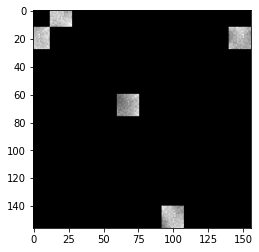

In [ ]:
#pick indices/window
window = 256
x_off = 100
y_off = 100
z_off = 10
plt.imshow(data[noise_name][z_off, y_off:y_off+window, x_off:x_off+window], cmap='gray')

In [42]:
test = data[noise_name]
test
# data['raw']
# sample

<zarr.core.Array '/gaussBlur30_downX8_poissNoise' (8, 250, 275, 275) float32>